In [42]:
# Loading necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# libraries used in clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score
import math

# libraries used in PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.decomposition import PCA

In [43]:
# checking the versions of vaious libraries used
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.24.3
2.0.3
0.12.2


# Problem1 
## Background Information
Ads 24x7, a digital marketing company has raised a funding of $ 10 Million in the seed round using which they are expanding into marketing analytics. For this they have hired a data analyst who has been tasked with a project aimed at categorizing ad types using the features contained in the data gathered by their marketing intelligence team.

## Business Objective
Categorize advertisements into various groups based on ad types, target audiences, and marketing strategies. This insight will aid Ads 24x7 in optimizing their digital marketing campaigns by effectively allocating budgets and deploying customized ad content for specific audience segments.
## Problem Statement 
The aim of this analysis is to efficiently recognize various ad types and marketing strategies tailored to different target audiences, utilizing clustering techniques to generate clusters that can be used by Ads 24x7 in designing their future marketing campaigns.
## Domain
Digital Marketing/ Advertisement
## Dataset Used
Ads_Data.xlsx
## Data Dictionary
* Timestamp: The Timestamp of the particular Advertisement. 
* InventoryType: The Inventory Type of the particular Advertisement. Format 1 to 7. This is a Categorical Variable. 
* Ad-Length: The Length Dimension of the particular Adverstisement.
* Ad-Width: The Width Dimension of the particular Advertisement.
* Ad Size: The Overall Size of the particular Advertisement. Length*Width. 
* Ad Type: The type of the particular Advertisement. This is a Categorical Variable.
* Platform: The platform in which the particular Advertisement is displayed. Web, Video or App. This is a Categorical Variable. 
* Device Type: The type of the device which supports the partciular Advertisement. This is a Categorical Variable.
* Format: The Format in which the Advertisement is displayed. This is a Categorical Variable.
* Available_Impressions: How often the particular Advertisement is shown. An impression is counted each time an Advertisement is shown on a search result page or other site on a Network. 
* Matched_Queries: Matched search queries data is pulled from Advertising Platform and consists of the exact searches typed into the search Engine that generated clicks for the particular Advertisement. 
* Impressions: The impression count of the particular Advertisement out of the total available impressions. 
* Clicks: It is a marketing metric that counts the number of times users have clicked on the particular advertisement to reach an online property.
* Spend: It is the amount of money spent on specific ad variations within a specific campaign or ad set. This metric helps regulate ad performance.
* Fee: The percentage of the Advertising Fees payable by Franchise Entities. 
* Revenue: It is the income that has been earned from the particular advertisement.
* CTR: CTR stands for "Click through rate". CTR is the number of clicks that your ad receives divided by the number of times your ad is shown. Formula used here is CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column and the Total Measured Ad Impressions refers to the 'Impressions' Column. 
* CPM: CPM stands for "cost per 1000 impressions." Formula used here is CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column and the Number of Impressions refers to the 'Impressions' Column. 
* CPC: CPC stands for "Cost-per-click". Cost-per-click (CPC) bidding means that you pay for each click on your ads. The Formula used here is CPC = Total Cost (spend) / Number of Clicks. Note that the Total Cost (spend) refers to the 'Spend' Column and the Number of Clicks refers to the 'Clicks' Column. 
## Loading Data

In [44]:
ads_data = pd.read_excel('D:/Kartik/GL MDS/Study_data/Assingnment_files/Module_3_ML1/Ads_data.xlsx', sheet_name= 'Data')

## Data Overview

In [45]:
def data_overview(df):
    print("a glimpse of the data")
    print("----------------------------------------------------------------------------")
    print("first 5 rows")
    display(df.head())
    print("last 5 rows")
    display(df.tail())
    print("\n")
    
    print("shape of the dataset")
    print("----------------------------------------------------------------------------")
    display(df.shape)
    print("\n")
    
    print("statistical summary")
    print("----------------------------------------------------------------------------")
    display(df.describe().T)
    print("\n")
    
    print("information of features")
    print("----------------------------------------------------------------------------")
    display(df.info())
    print("\n")
    
    print("missing values")
    print("----------------------------------------------------------------------------")
    display(df.isnull().sum())
    print("\n")
    
    print("checking for duplicates")
    print("----------------------------------------------------------------------------")
    print(f"number of dupliacte rows: {df.duplicated().sum()}")
    print("\n")
    
    print("frequency distribution of categorical columns")
    print("----------------------------------------------------------------------------")
    object_columns = df.select_dtypes(include='object').columns #identify columns with object data type
    for column in object_columns:
        print("value counts for " + column)
        print("----------------------------------------------------------------------------")
        print(df[column].value_counts())
        print("\n")

In [46]:
data_overview(ads_data)

a glimpse of the data
----------------------------------------------------------------------------
first 5 rows


Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

last 5 rows


Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type Format  Available_Impressions  Matched_Queries  \
23061      Web      Mobile  Video                      1                1   
23062      Web     Desktop  Video                      3                2   
23063      App      Mobile  Video                      2                1   
23064    Video      Mobile  Video                      7                1   
23065      App      Mobile  Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue  CTR  CPM  CPC  
23061            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23062            2       1   0.04  0.35   0.0260  NaN  NaN  NaN  
23063            1       1   0.05  0.35   0.0325  NaN  NaN  NaN  
23064            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23065            2       1   0.09  0.35   0.0585  NaN  NaN  NaN



shape of the dataset
----------------------------------------------------------------------------


(23066, 19)



statistical summary
----------------------------------------------------------------------------


count          mean           std         min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.0000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.0000   
Ad Size                23066.0  9.667447e+04  6.153833e+04  33600.0000   
Available_Impressions  23066.0  2.432044e+06  4.742888e+06      1.0000   
Matched_Queries        23066.0  1.295099e+06  2.512970e+06      1.0000   
Impressions            23066.0  1.241520e+06  2.429400e+06      1.0000   
Clicks                 23066.0  1.067852e+04  1.735341e+04      1.0000   
Spend                  23066.0  2.706626e+03  4.067927e+03      0.0000   
Fee                    23066.0  3.351231e-01  3.196322e-02      0.2100   
Revenue                23066.0  1.924252e+03  3.105238e+03      0.0000   
CTR                    18330.0  7.366054e-02  7.515992e-02      0.0001   
CPM                    18330.0  7.672045e+00  6.481391e+00      0.0000   
CPC                    18330.0  3.510606e-01  3.433338e-01      0.0000   

                                25%           50%           75%          max  
Ad - Length              120.000000     300.00000  7.200000e+02       728.00  
Ad- Width                250.000000     300.00000  6.000000e+02       600.00  
Ad Size                72000.000000   72000.00000  8.400000e+04    216000.00  
Available_Impressions  33672.250000  483771.00000  2.527712e+06  27592861.00  
Matched_Queries        18282.500000  258087.50000  1.180700e+06  14702025.00  
Impressions             7990.500000  225290.00000  1.112428e+06  14194774.00  
Clicks                   710.000000    4425.00000  1.279375e+04    143049.00  
Spend                     85.180000    1425.12500  3.121400e+03     26931.87  
Fee                        0.330000       0.35000  3.500000e-01         0.35  
Revenue                   55.365375     926.33500  2.091338e+03     21276.18  
CTR                        0.002600       0.08255  1.300000e-01         1.00  
CPM                        1.710000       7.66000  1.251000e+01        81.56  
CPC                        0.090000       0.16000  5.700000e-01         7.26



information of features
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spe

None



missing values
----------------------------------------------------------------------------


Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64



checking for duplicates
----------------------------------------------------------------------------
number of dupliacte rows: 0


frequency distribution of categorical columns
----------------------------------------------------------------------------
value counts for Timestamp
----------------------------------------------------------------------------
Timestamp
2020-11-13-22    13
2020-11-20-9     13
2020-11-14-23    13
2020-10-18-1     13
2020-9-23-15     13
                 ..
2020-9-2-5       10
2020-9-4-19      10
2020-9-2-11      10
2020-9-3-11       9
2020-9-1-16       2
Name: count, Length: 2018, dtype: int64


value counts for InventoryType
----------------------------------------------------------------------------
InventoryType
Format4    7165
Format5    4249
Format1    3814
Format3    3540
Format6    1850
Format2    1789
Format7     659
Name: count, dtype: int64


value counts for Ad Type
----------------------------------------------------------------------------
Ad T

#### Key observations
1. Dataset has 23066 rows and 19 columns.
2. According to the data dictionary, we anticipated the dataframe to comprise 13 numeric columns, 6 categorical/object columns, and 1 datetime datatype column. However, as per the data info dataset has 13 numeric columns and 6 categorical/object column. This discrepency is due to the fact that timestamp column which was expected to have datetime datatype has object datatype.
3. Based on the statistical summary of the data we can observe that there is significantly high variance for the numeric columns and this variance is present both between the features as well as within the features. Due to this we will have to scale the data before we can apply clustering models.
4. There are missing values for columns CTR, CPM and CPC which we will have to impute during pre-processing phase.
5. There are no duplicates in the data.
6. For the columns with datatype as object there is no bad data except for column timestamp which can not be checked completely due to the fact that there are over 2000 uniques values in this column. We will try to check for bad data in this column during pre-processing phase when we will create a new column by extracting the hour from this column as we believe that hour during which the advertisements were displayed can have an significant impact over the advertisements performance and can help improve the findings.

## Data Pre-processing
### Treating missing values
There are 4736 entries missing for each of CTR, CPM and CPC columns which we will impute using formula based technique.

In [47]:
# defining a function with formula for CPM column
def calculate_cpm(x):
    total_campaign_spend = ads_data['Spend']
    number_of_impressions = ads_data['Impressions']
    CPM = (total_campaign_spend/number_of_impressions)*1000
    return CPM

In [48]:
# defining a function with formula for CTR column
def calculate_ctr(y):
    total_measured_clicks = ads_data['Clicks']
    number_of_impressions = ads_data['Impressions']
    CTR = (total_measured_clicks/number_of_impressions)*100
    return CTR

In [49]:
# defining a function with formula for CPC column
def calculate_cpc(z):
    total_campaign_spend = ads_data['Spend']
    number_of_clicks = ads_data['Clicks']
    CPC = (total_campaign_spend/number_of_clicks)
    return CPC

In [50]:
# imputing missing values
ads_data['CPM'] = ads_data[['CPM']].apply(lambda x: calculate_cpm(x))
ads_data['CTR'] = ads_data[['CTR']].apply(lambda y: calculate_ctr(y))
ads_data['CPC'] = ads_data[['CPC']].apply(lambda z: calculate_cpc(z))

In [51]:
# rechecking for missing values
ads_data.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

### Seperating ad hour and dropping Timestamp column

In [52]:
# Convert 'Timestamp' to datetime format
ads_data['Timestamp'] = pd.to_datetime(ads_data['Timestamp'], format='%Y-%m-%d-%H')

In [53]:
# Extract the hour component
ads_data['ads_hour'] = ads_data['Timestamp'].dt.hour

In [54]:
# taking a glimpse of dataset
ads_data.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size  \
0 2020-09-02 17:00:00       Format1          300        250    75000   
1 2020-09-02 10:00:00       Format1          300        250    75000   
2 2020-09-01 22:00:00       Format1          300        250    75000   
3 2020-09-03 20:00:00       Format1          300        250    75000   
4 2020-09-04 15:00:00       Format1          300        250    75000   

    Ad Type Platform Device Type   Format  Available_Impressions  \
0  Inter222    Video     Desktop  Display                   1806   
1  Inter227      App      Mobile    Video                   1780   
2  Inter222    Video     Desktop  Display                   2727   
3  Inter228    Video      Mobile    Video                   2430   
4  Inter217      Web     Desktop    Video                   1218   

   Matched_Queries  Impressions  Clicks  Spend   Fee  Revenue       CTR  CPM  \
0              325          323       1    0.0  0.35      0.0  0.309598  0.0   
1              285          285       1    0.0  0.35      0.0  0.350877  0.0   
2              356          355       1    0.0  0.35      0.0  0.281690  0.0   
3              497          495       1    0.0  0.35      0.0  0.202020  0.0   
4              242          242       1    0.0  0.35      0.0  0.413223  0.0   

   CPC  ads_hour  
0  0.0        17  
1  0.0        10  
2  0.0        22  
3  0.0        20  
4  0.0        15

In [55]:
# checking for datatypes
ads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              23066 non-null  datetime64[ns]
 1   InventoryType          23066 non-null  object        
 2   Ad - Length            23066 non-null  int64         
 3   Ad- Width              23066 non-null  int64         
 4   Ad Size                23066 non-null  int64         
 5   Ad Type                23066 non-null  object        
 6   Platform               23066 non-null  object        
 7   Device Type            23066 non-null  object        
 8   Format                 23066 non-null  object        
 9   Available_Impressions  23066 non-null  int64         
 10  Matched_Queries        23066 non-null  int64         
 11  Impressions            23066 non-null  int64         
 12  Clicks                 23066 non-null  int64         
 13  S

In [56]:
ads_data[['CTR','CPM','CPC']].describe().T

count      mean       std       min       25%       50%        75%  \
CTR  23066.0  8.409941  9.262048  0.010874  0.265107  9.391248  13.470571   
CPM  23066.0  8.396849  9.057760  0.000000  1.749084  8.371566  13.042018   
CPC  23066.0  0.336678  0.341253  0.000000  0.089736  0.139347   0.546242   

         max  
CTR  200.000  
CPM  715.000  
CPC    7.264

We have successfully converted datatype of 'Timestamp' column into datetime and have created a new column named 'ads_hour' by extracting the hour component due to which dimensions of the dataframe has changed from 19 columns to 20 columns. The columns'ads_hour' has numeric datatype.

In [57]:
# checking the 'ads_hour' for bad data
print("value counts for ads_hour column")
print(ads_data['ads_hour'].value_counts())

value counts for ads_hour column
ads_hour
18    985
17    982
21    981
15    980
20    977
19    975
9     974
22    974
23    970
13    967
16    967
10    966
11    964
12    963
7     961
0     961
14    960
8     954
1     954
6     943
3     933
5     929
2     924
4     922
Name: count, dtype: int64


For ads_hour column extracted from Timestamp column there are no bad data and so for our analysis we will consider that Timestamp column also does not has any bad data.

For our analysis we would only be considering the hour component due to which Timestamp column is not of any use, so we will be removing the Timestamp column and storing the result in a new dataframe named ads_data_v1

In [58]:
# droping 'Timestamp' and storing results in a new dataframe.
ads_data_v1 = ads_data.drop('Timestamp', axis=1)
# taking an overview of the new dataframe
ads_data_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   InventoryType          23066 non-null  object 
 1   Ad - Length            23066 non-null  int64  
 2   Ad- Width              23066 non-null  int64  
 3   Ad Size                23066 non-null  int64  
 4   Ad Type                23066 non-null  object 
 5   Platform               23066 non-null  object 
 6   Device Type            23066 non-null  object 
 7   Format                 23066 non-null  object 
 8   Available_Impressions  23066 non-null  int64  
 9   Matched_Queries        23066 non-null  int64  
 10  Impressions            23066 non-null  int64  
 11  Clicks                 23066 non-null  int64  
 12  Spend                  23066 non-null  float64
 13  Fee                    23066 non-null  float64
 14  Revenue                23066 non-null  float64
 15  CT

## Exploratory Data Analysis
### Univariate Analysis
#### For numeric columns

In [59]:
def univariateAnalysis_numeric(df,column):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")

    # Calculate min and max values for the column
    a = round(df[column].min())
    b = round(df[column].max())
    # Plot histogram with annotations
    freq, bins, patches = axs[0].hist(df[column], range=[a, b], edgecolor='pink', color='cyan')
    bin_centers = np.diff(bins) * 0.5 + bins[:-1]
    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
        height = int(freq[n])
        axs[0].annotate("{}".format(height),
                    xy=(x, height),  # top left corner of the histogram bar
                    xytext=(0, 0.2),  # offsetting label position above its bar
                    textcoords="offset points",  # Offset (in points) from the *xy* value
                    ha='center', va='bottom')
        n = n + 1
    axs[0].set_xlabel(column)
    axs[0].tick_params(axis='x', labelrotation=90)
        
    # Plot boxplot
    sns.boxplot(x=column, data=df, ax=axs[1], color = 'pink')
    axs[1].tick_params(axis='x', labelrotation=90)

    # Show the plots
    plt.show()
    

In [60]:
numeric_columns = ads_data_v1.select_dtypes(include='number').columns


Distribution of Ad - Length
----------------------------------------------------------------------------


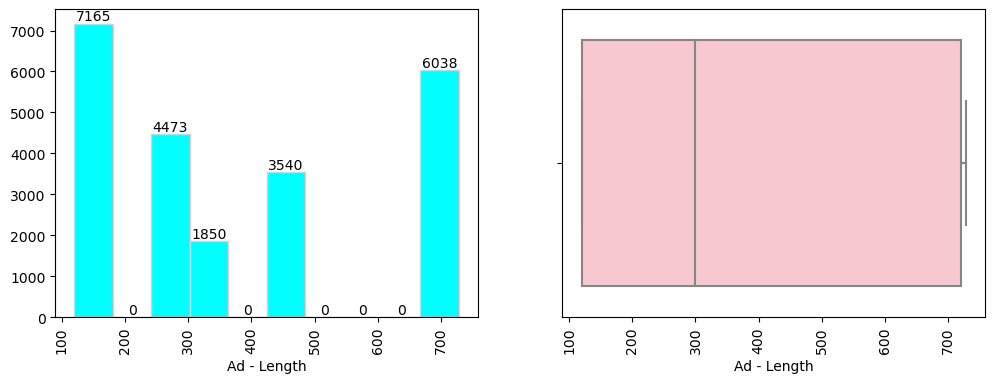

Distribution of Ad- Width
----------------------------------------------------------------------------


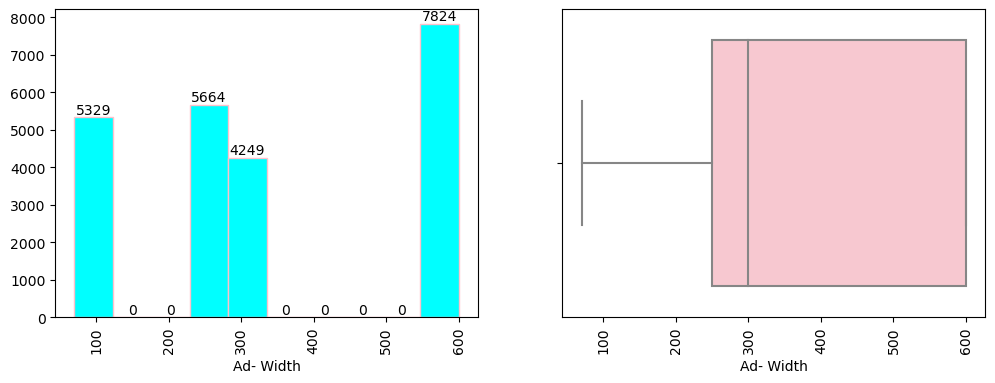

Distribution of Ad Size
----------------------------------------------------------------------------


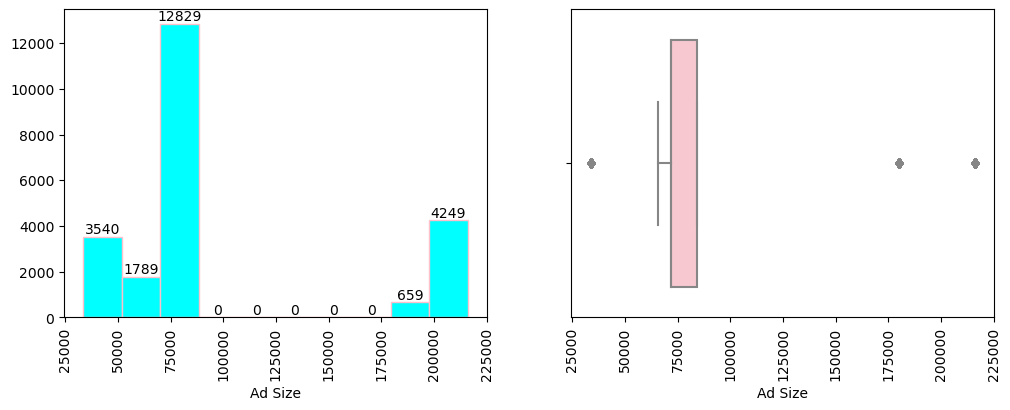

Distribution of Available_Impressions
----------------------------------------------------------------------------


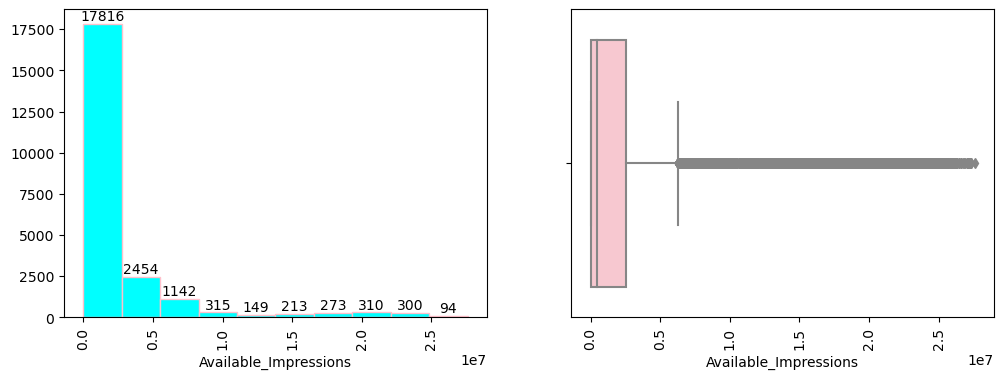

Distribution of Matched_Queries
----------------------------------------------------------------------------


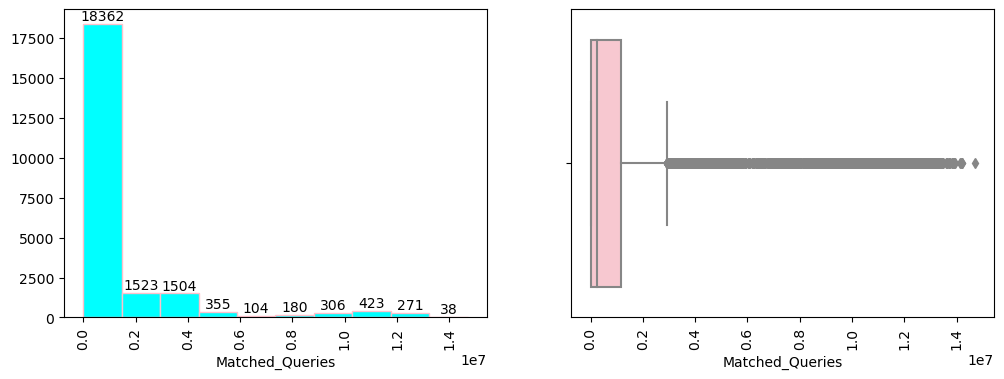

Distribution of Impressions
----------------------------------------------------------------------------


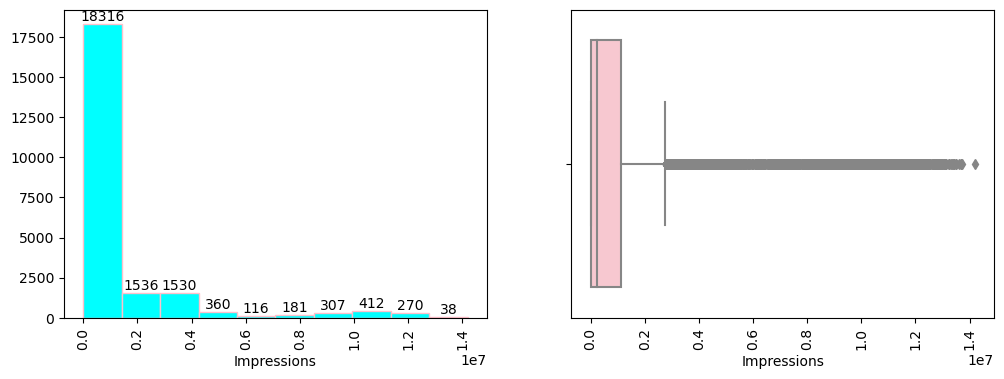

Distribution of Clicks
----------------------------------------------------------------------------


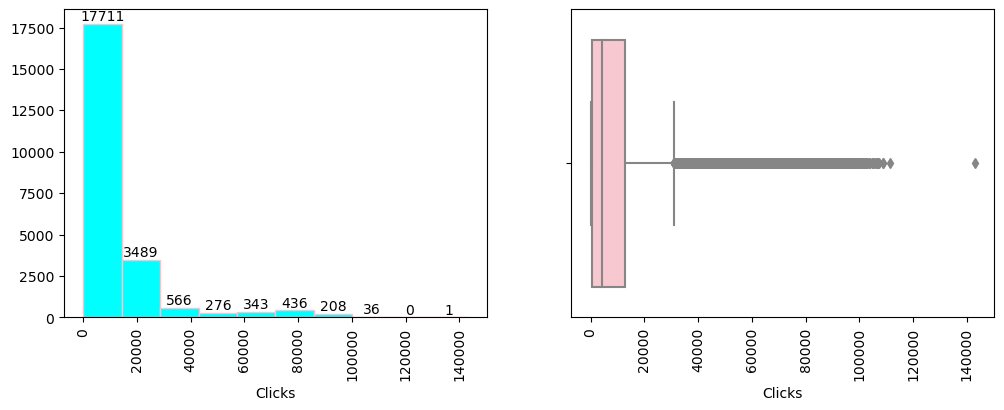

Distribution of Spend
----------------------------------------------------------------------------


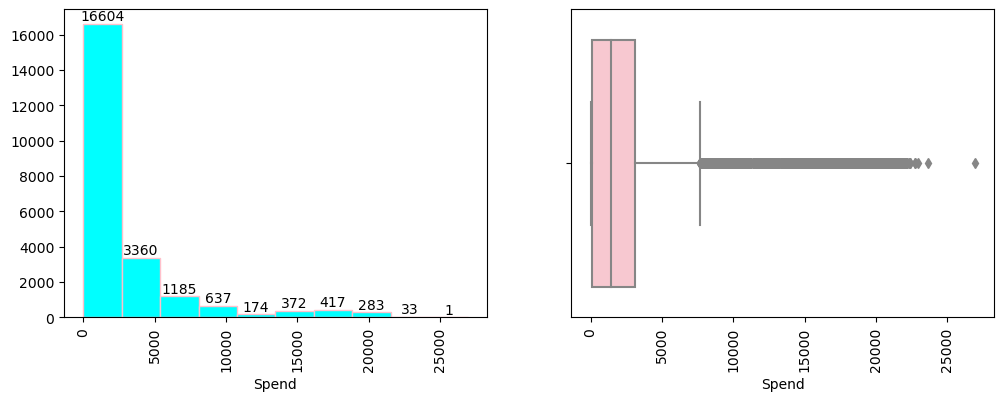

Distribution of Fee
----------------------------------------------------------------------------


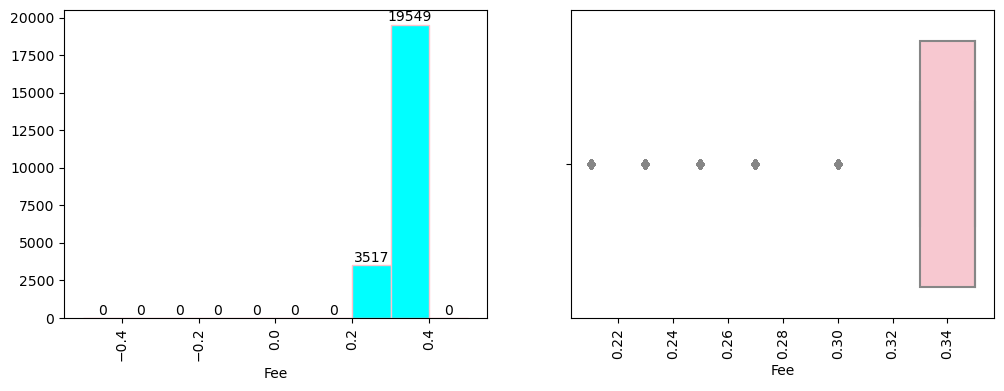

Distribution of Revenue
----------------------------------------------------------------------------


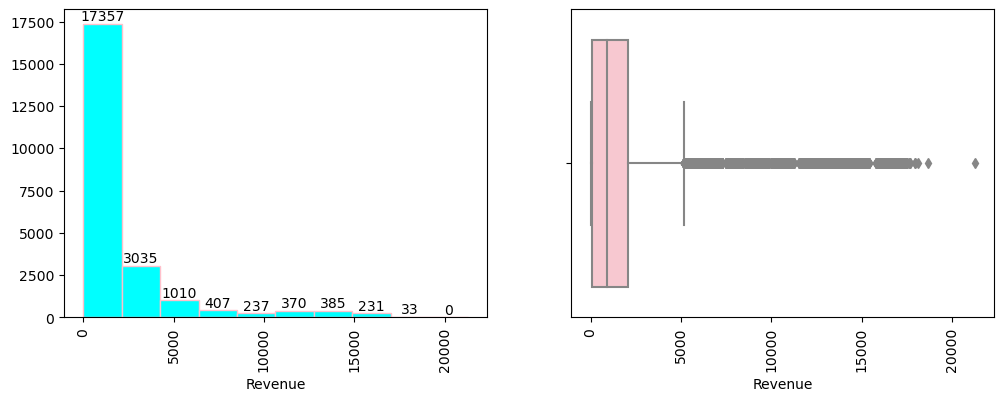

Distribution of CTR
----------------------------------------------------------------------------


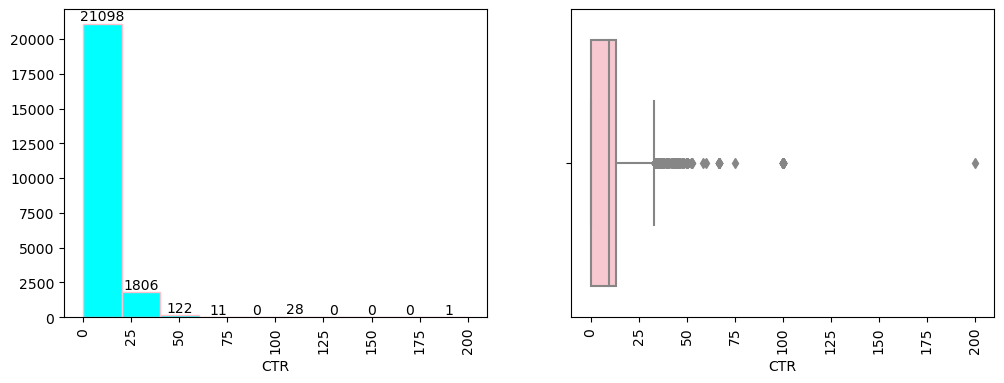

Distribution of CPM
----------------------------------------------------------------------------


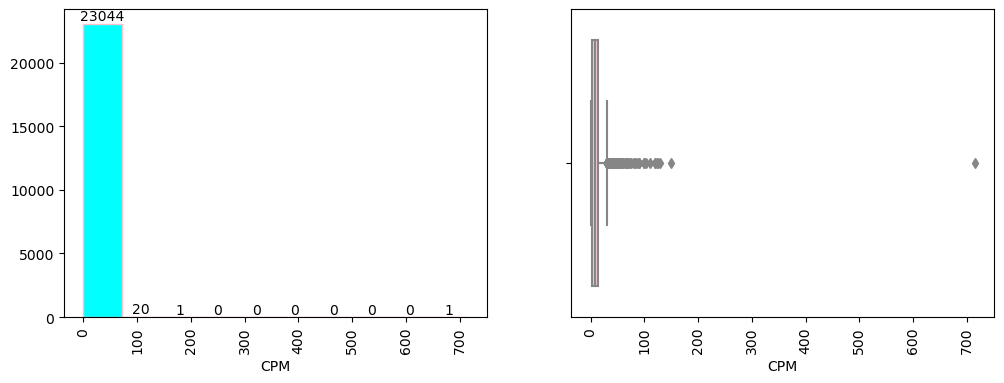

Distribution of CPC
----------------------------------------------------------------------------


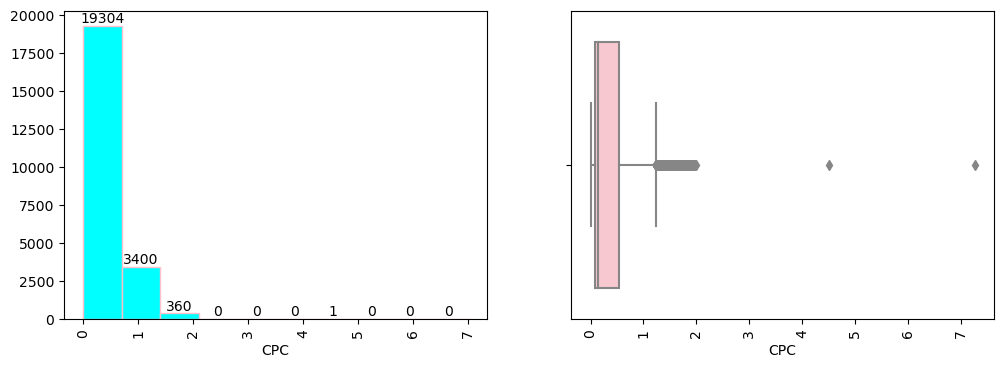

Distribution of ads_hour
----------------------------------------------------------------------------


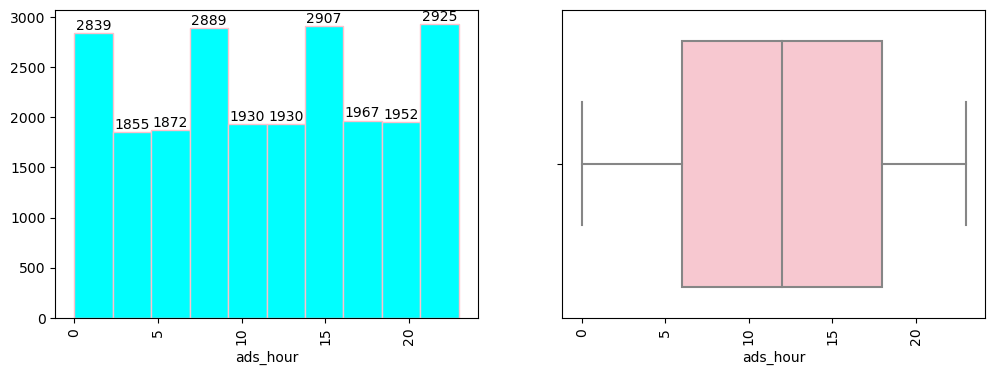

In [61]:
for column in numeric_columns:
    univariateAnalysis_numeric(ads_data_v1, column)

#### Key Takeaways
1. Outliers are present in 11 out of the 14 numeric columns. Given that clustering is sensitive to outliers, particularly for the K-means method, as it relies on centroids to form groups, and these centroids can be substantially influenced by outliers, we will address these outliers.
2. There is skewness in the data except for columns ad-length and ads_hour all the columns are skewed. Ad-length and Fee are left skewed while the others are right skewed.
3. While for both ad length and ad width, the median values are almost similar. However, for ad length the box covers almost the entire range but in case ad width data is left skewed this deviation might be due to the device type on which ads were played. 
4. From the statistical summary and univariate analysis we have observed that the ratio of 'Matched_Queries' that is number of ads run where the keywords used in these ads matched the keywords entered in the search engine and this resulting in a click on the ad against 'Available_Impressions' that is total available advertising slots available on network is almost 1:2 that is for every 2 'Available Impressions' is resulting in a click or an instance of 'Matched_Queries'. However, this ratio in case of Ads 24x7 is 1:10 that for every 10 impressions Ads 24x7 gets only 1 click.

#### For categorical columns

In [62]:
def univariateAnalysis_category(df, cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    plt.figure(figsize=(8, 4))
    plots = df[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    for bar in plots.patches:
        plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=7, xytext=(0, 8),
                   textcoords='offset points')
    plt.show()
    print("       ")

In [63]:
catgorical_columns = ads_data_v1.select_dtypes(include='object').columns

Details of InventoryType
----------------------------------------------------------------


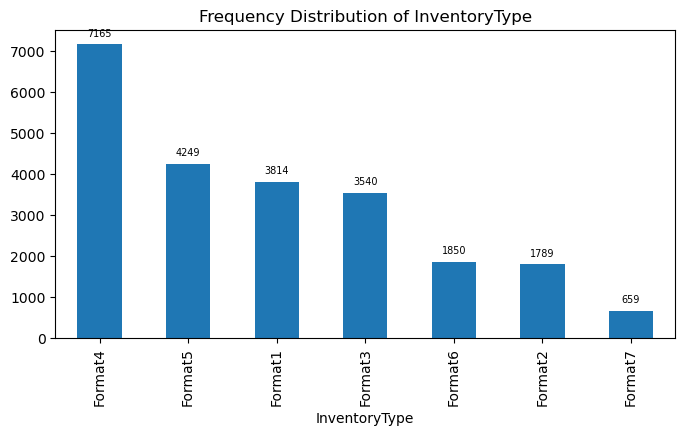

       
Details of Ad Type
----------------------------------------------------------------


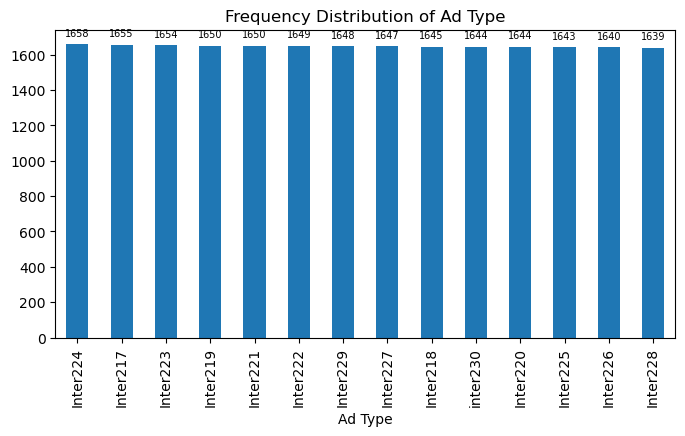

       
Details of Platform
----------------------------------------------------------------


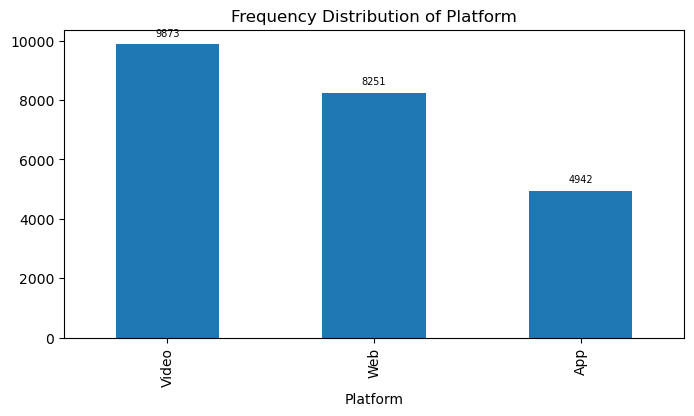

       
Details of Device Type
----------------------------------------------------------------


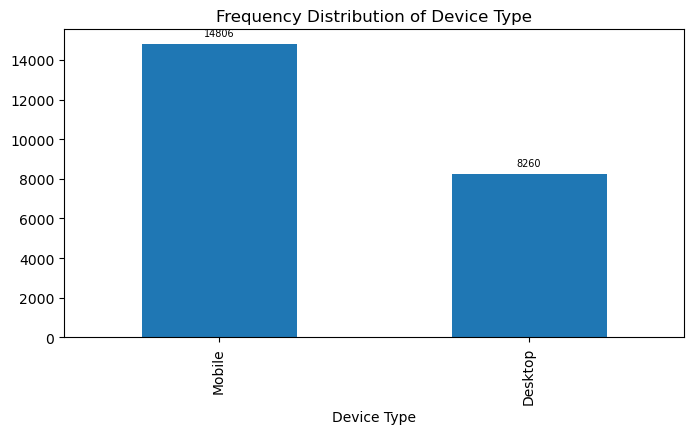

       
Details of Format
----------------------------------------------------------------


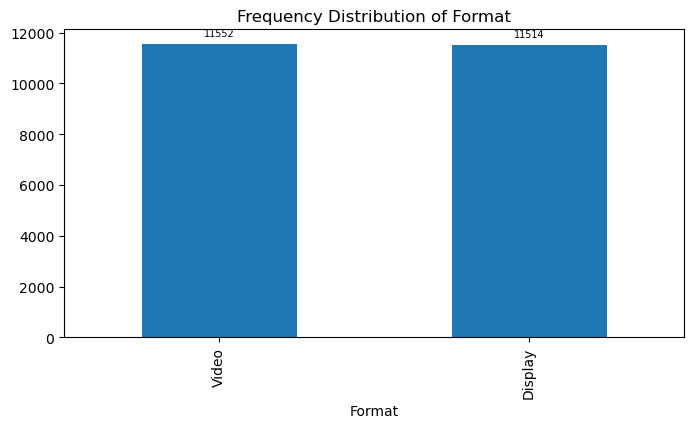

In [64]:
for column in catgorical_columns:
    univariateAnalysis_category(ads_data_v1, column)

#### Key Observations
1. Data distribution for 'Ad Type' and 'Format' is uniform.
2. While ads run on Mobiles are signifantly more than those run on Desktops, however, Video and Web ads are displayed in far greater numbers than those on Apps.
3. Format 4 is the most preffered 'Inventory Type' while Format 7 is the least preferred

### Bivariate Analysis
#### Relation between numeric columns

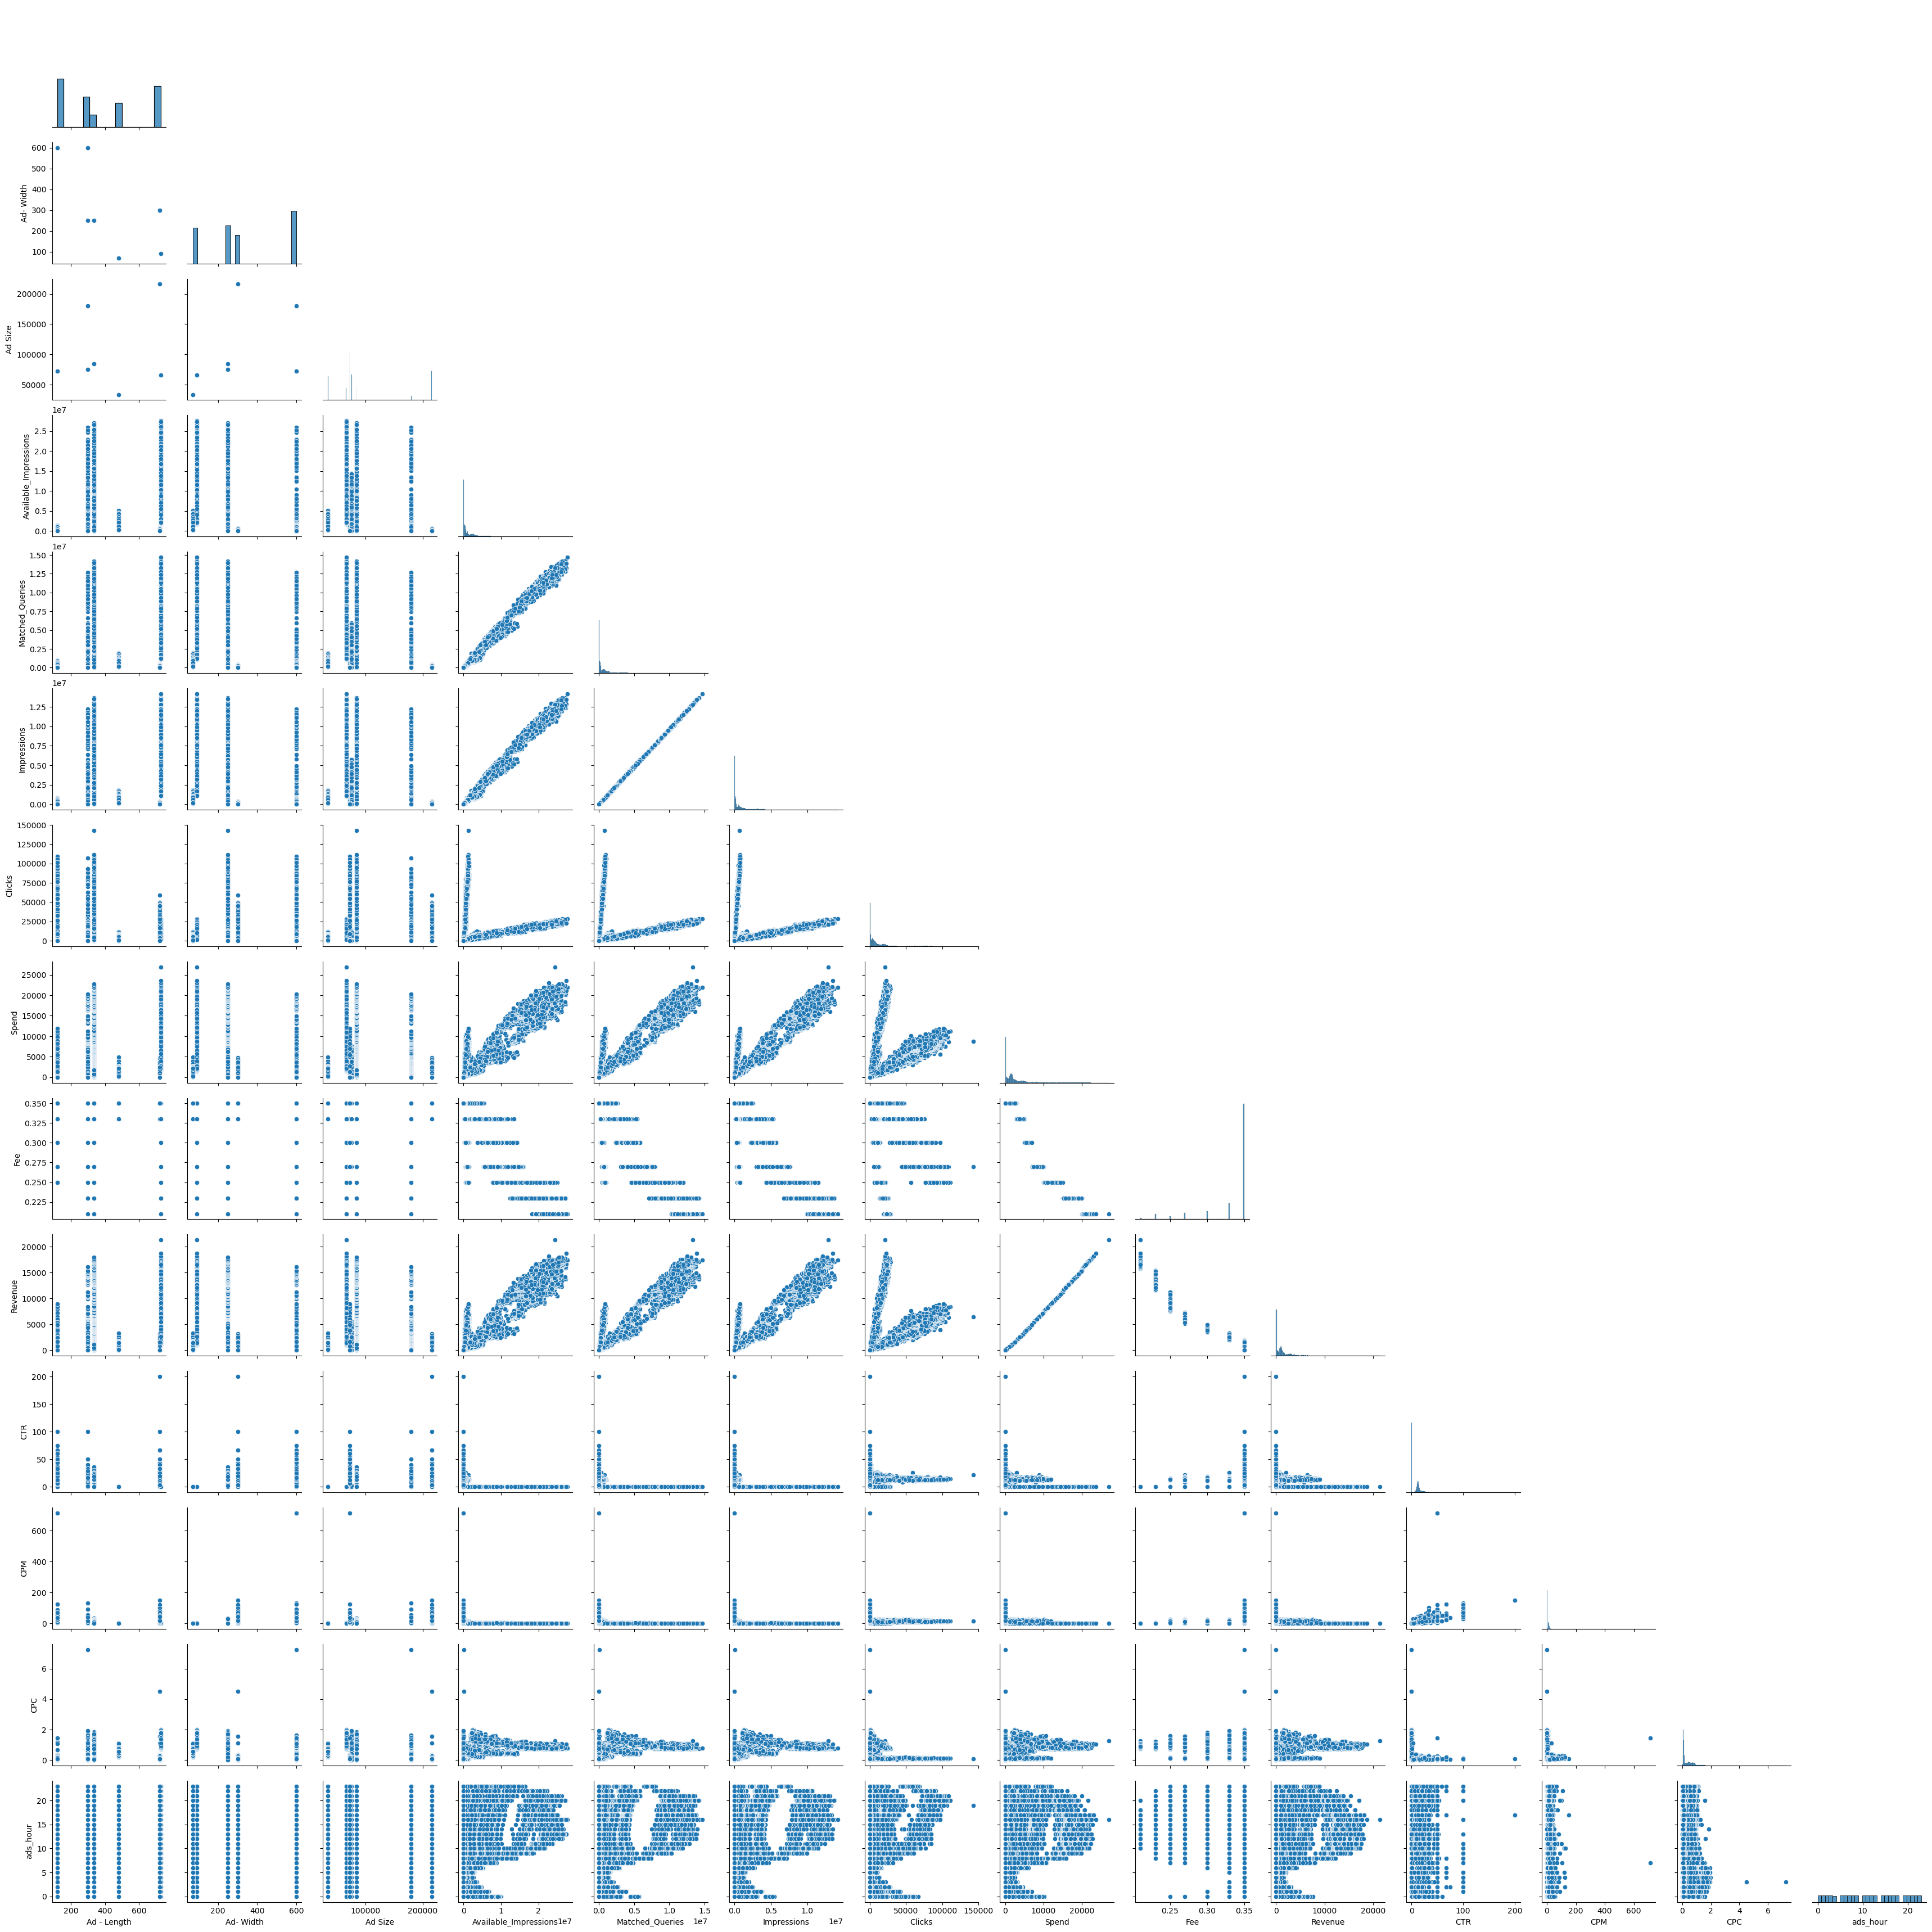

In [65]:
# pairplot
sns.pairplot(data = ads_data_v1, corner = True)
plt.show()

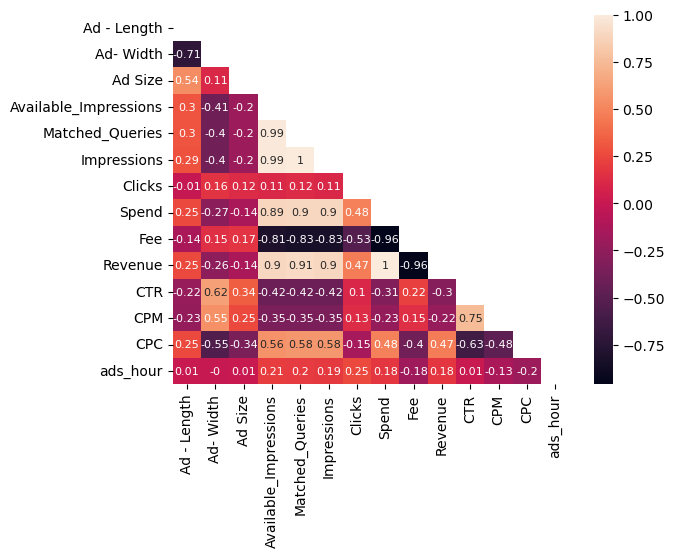

In [66]:
# Heatmap
mask = np.triu(np.ones_like(ads_data_v1.select_dtypes(include=['int32', 'int64', 'float64']).corr(), dtype = 'bool'))
sns.heatmap(data = round(ads_data_v1.select_dtypes(include=['int32', 'int64', 'float64']).corr(),2), 
            annot = True, annot_kws={"size": 8}, mask = mask)
plt.show()

#### Key Observations
1. There is strong positive as well as negative correlation in the data.
2. Ad Length and Ad Width have strong negative correlation and this might be due to the fact that ads are run on Mobile and Desktop, where for mobiles ads might be longer while in desktop the ads will be wider due to device screen dimensions.
3. Ad Width has a strong positive correlation with CTR and CPM, strong negative correlation with CPC. There is some relation that wider ads receive more clicks and due to this CPC goes down.
4. Columns Matched_Queries, Impressions, Spend, Fee and Revenue are showing very strong correlation amongst each other. 

#### Relation between numeric and categorical columns

In [67]:
def num_cat_bivariate(df, cat_col, numeric_columns):
    # Determine the number of rows and columns needed for subplots
    num_plots = len(numeric_columns)
    num_cols = min(3, num_plots)
    num_rows = math.ceil(num_plots / num_cols)

    # Create subplots
    plt.figure(figsize=(15, num_rows * 4))

    # Plot violin plots for each numeric column
    for i, num_col in enumerate(numeric_columns):
        if i < num_plots:  # Check if we haven't exceeded the number of numeric columns
            plt.subplot(num_rows, num_cols, i+1)
            sns.violinplot(x=cat_col, y=num_col, data=df)
            plt.title(f'{num_col} vs {cat_col}')
            plt.xticks(rotation=90)  # Rotate x-axis tick labels

    # Adjust layout
    plt.tight_layout()
    plt.show()

bivariate analysis for InventoryType


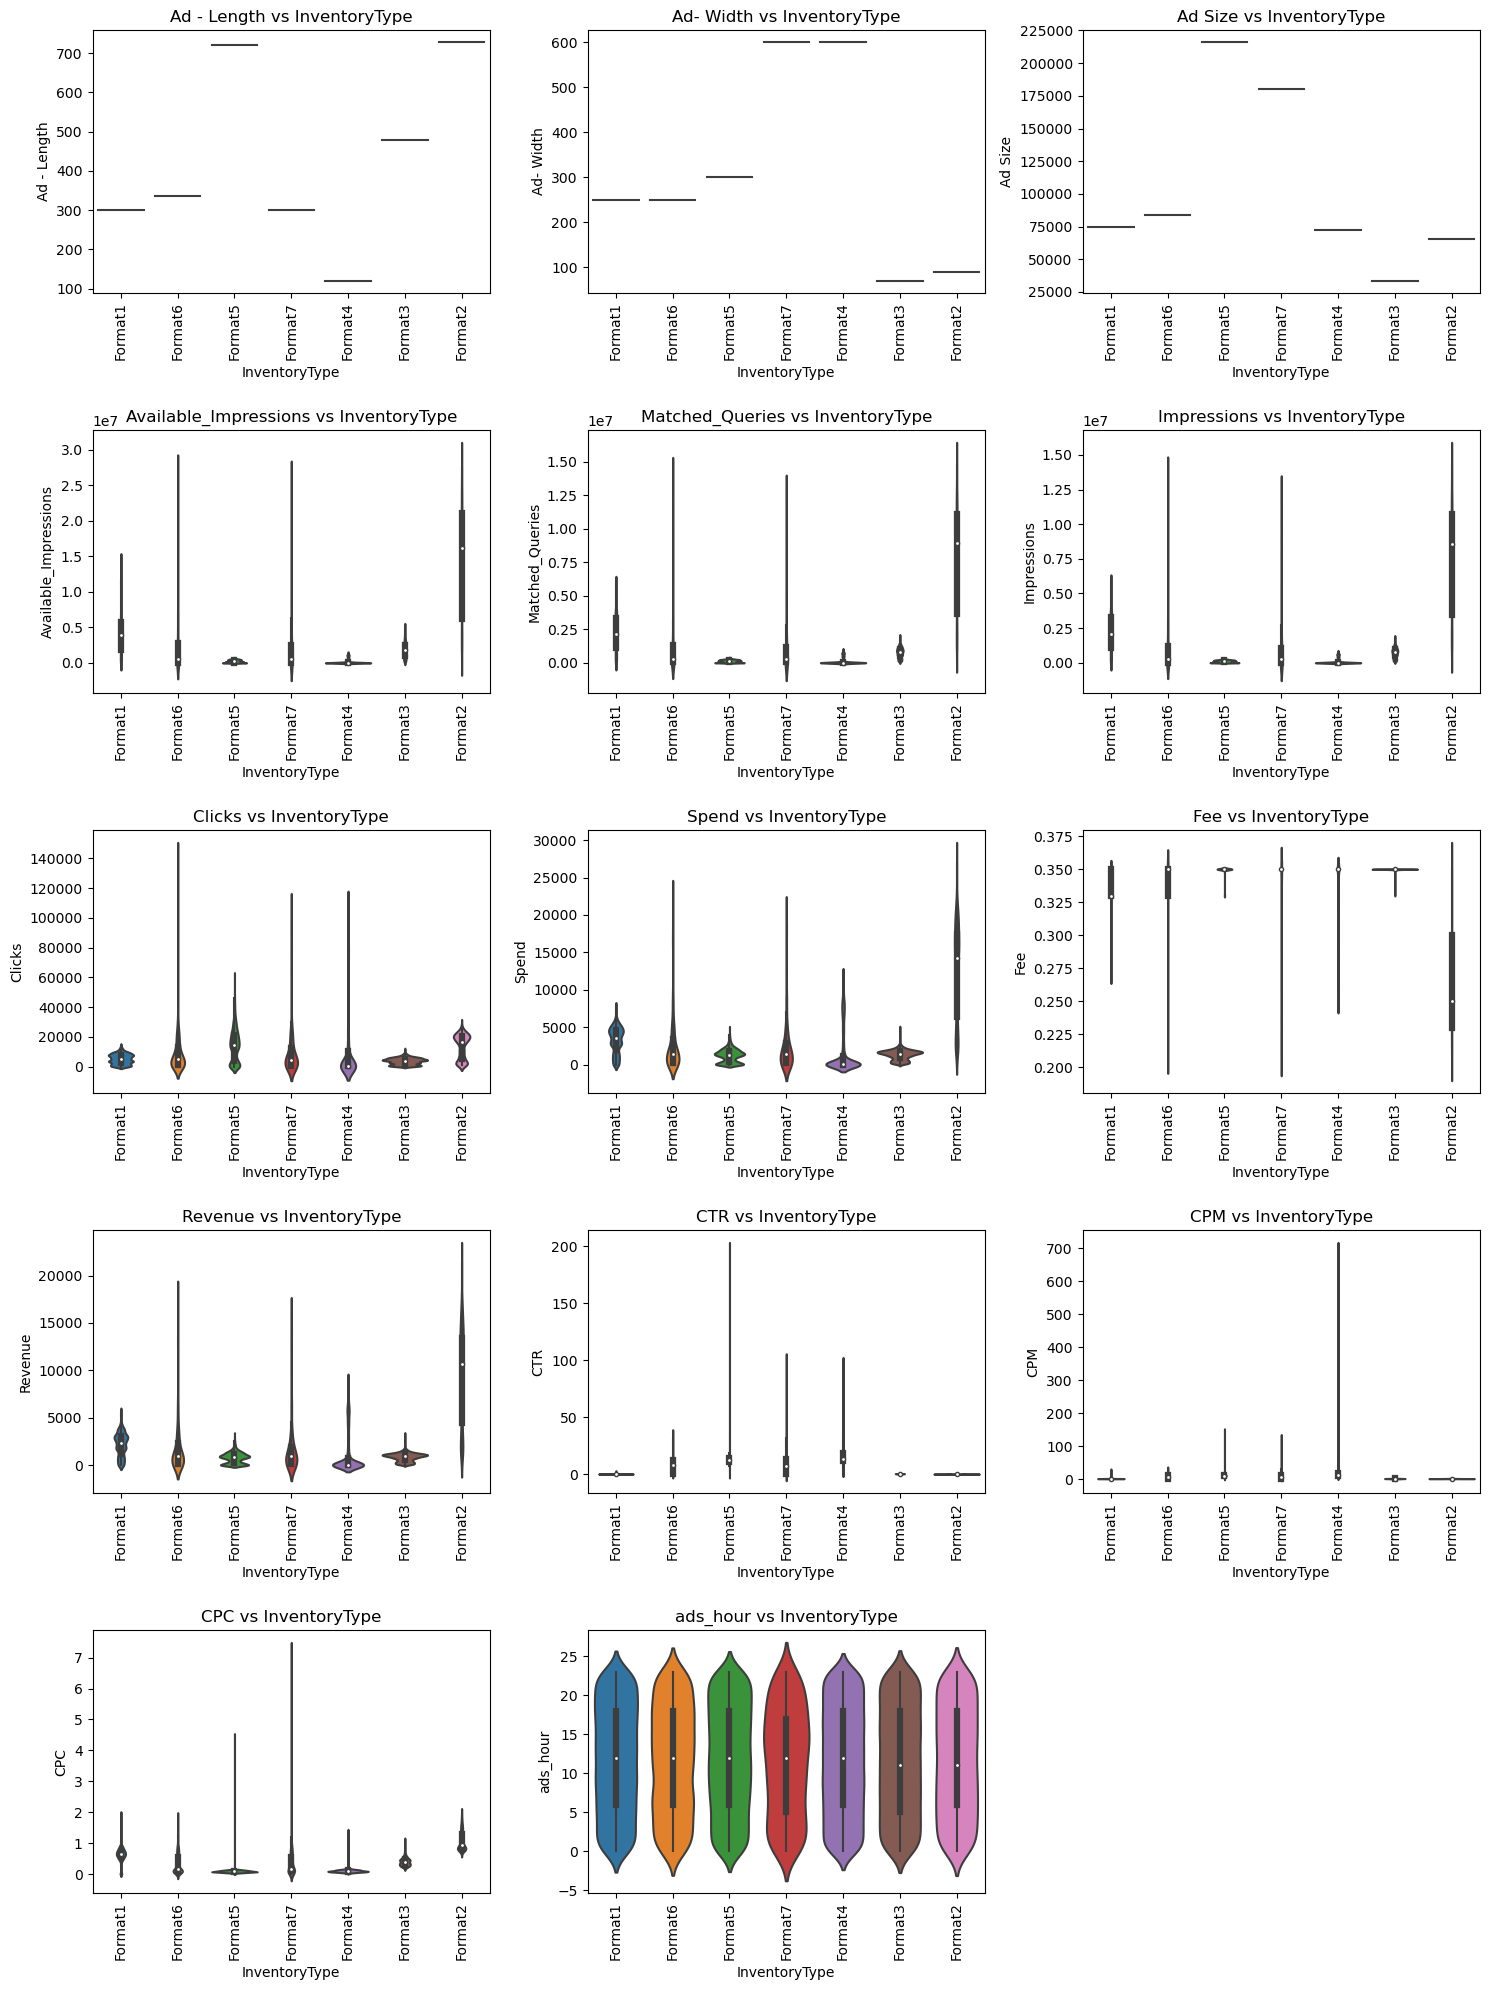



bivariate analysis for Ad Type


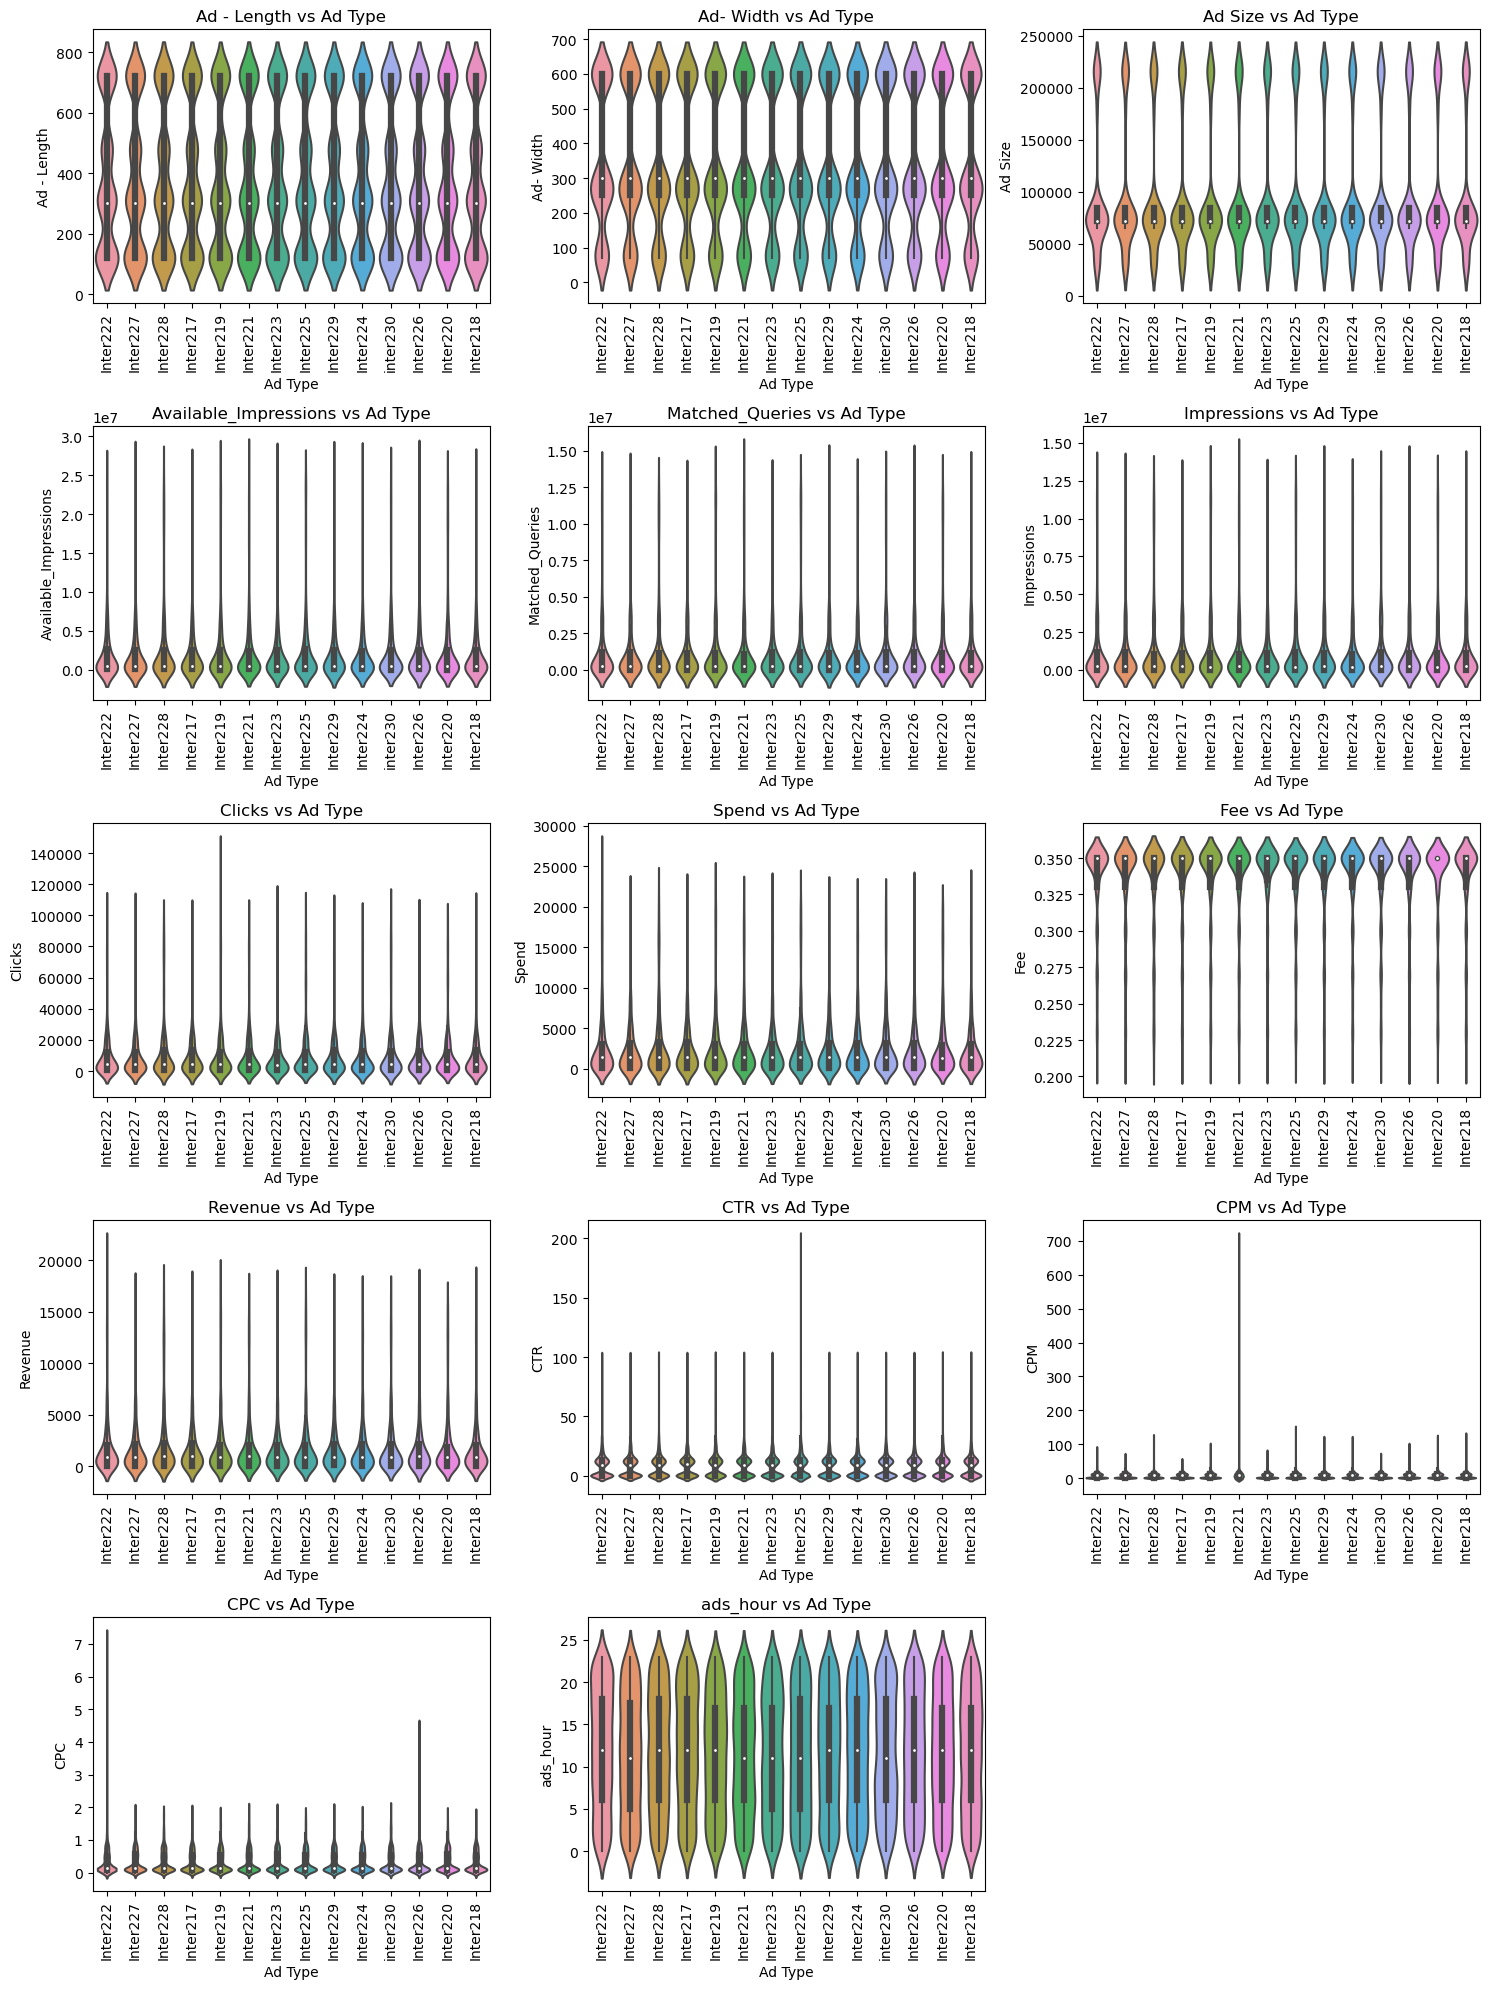



bivariate analysis for Platform


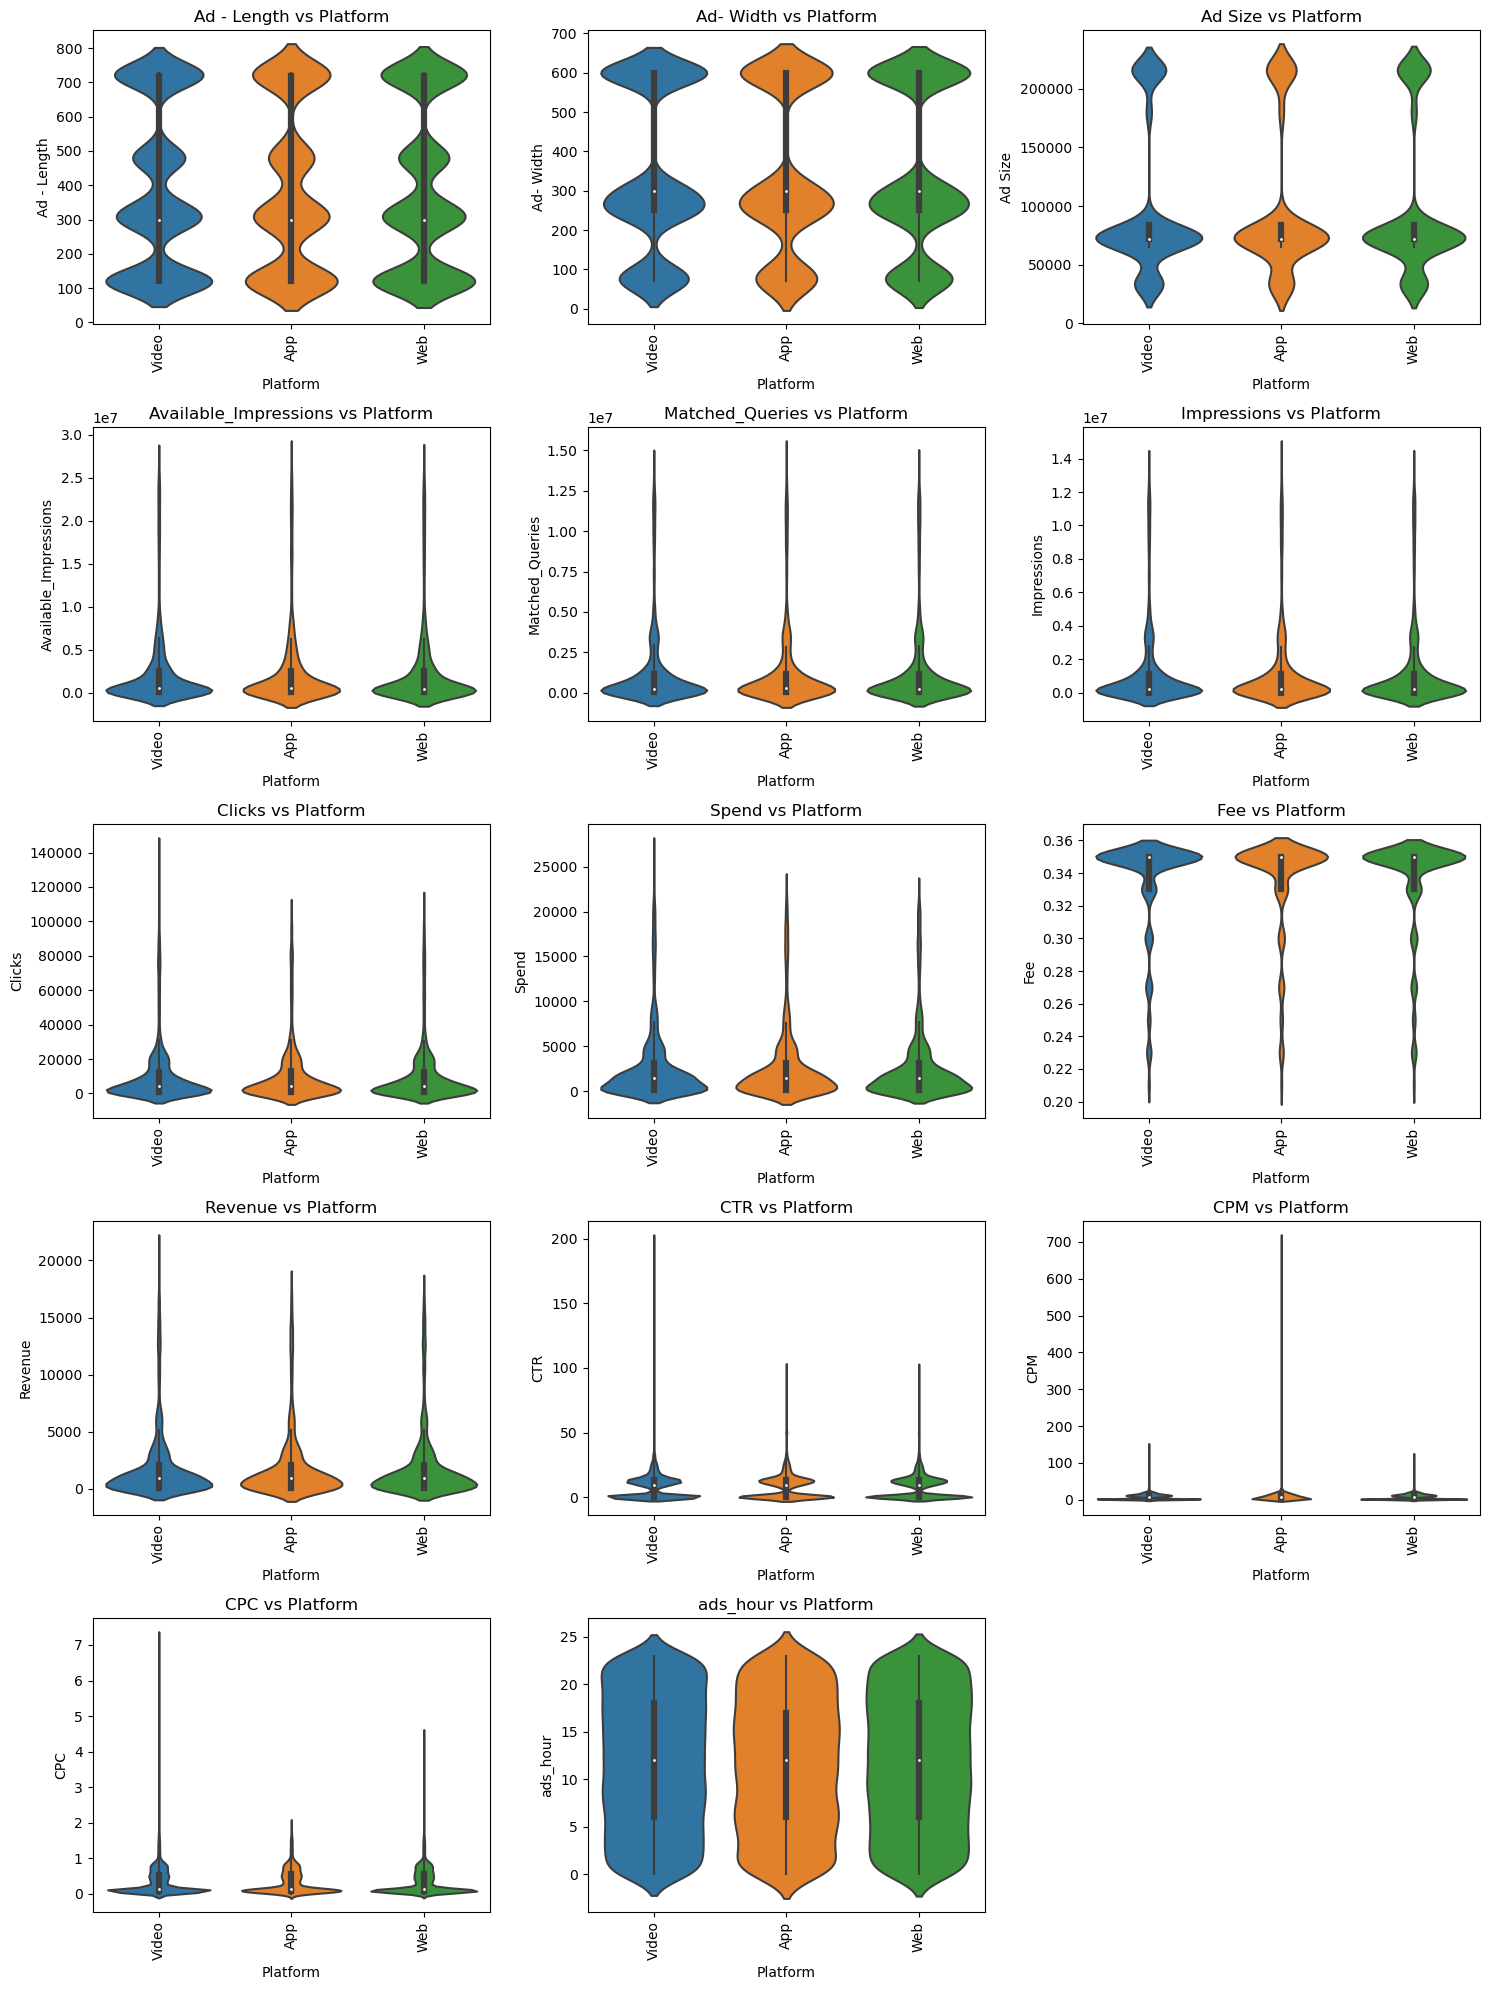



bivariate analysis for Device Type


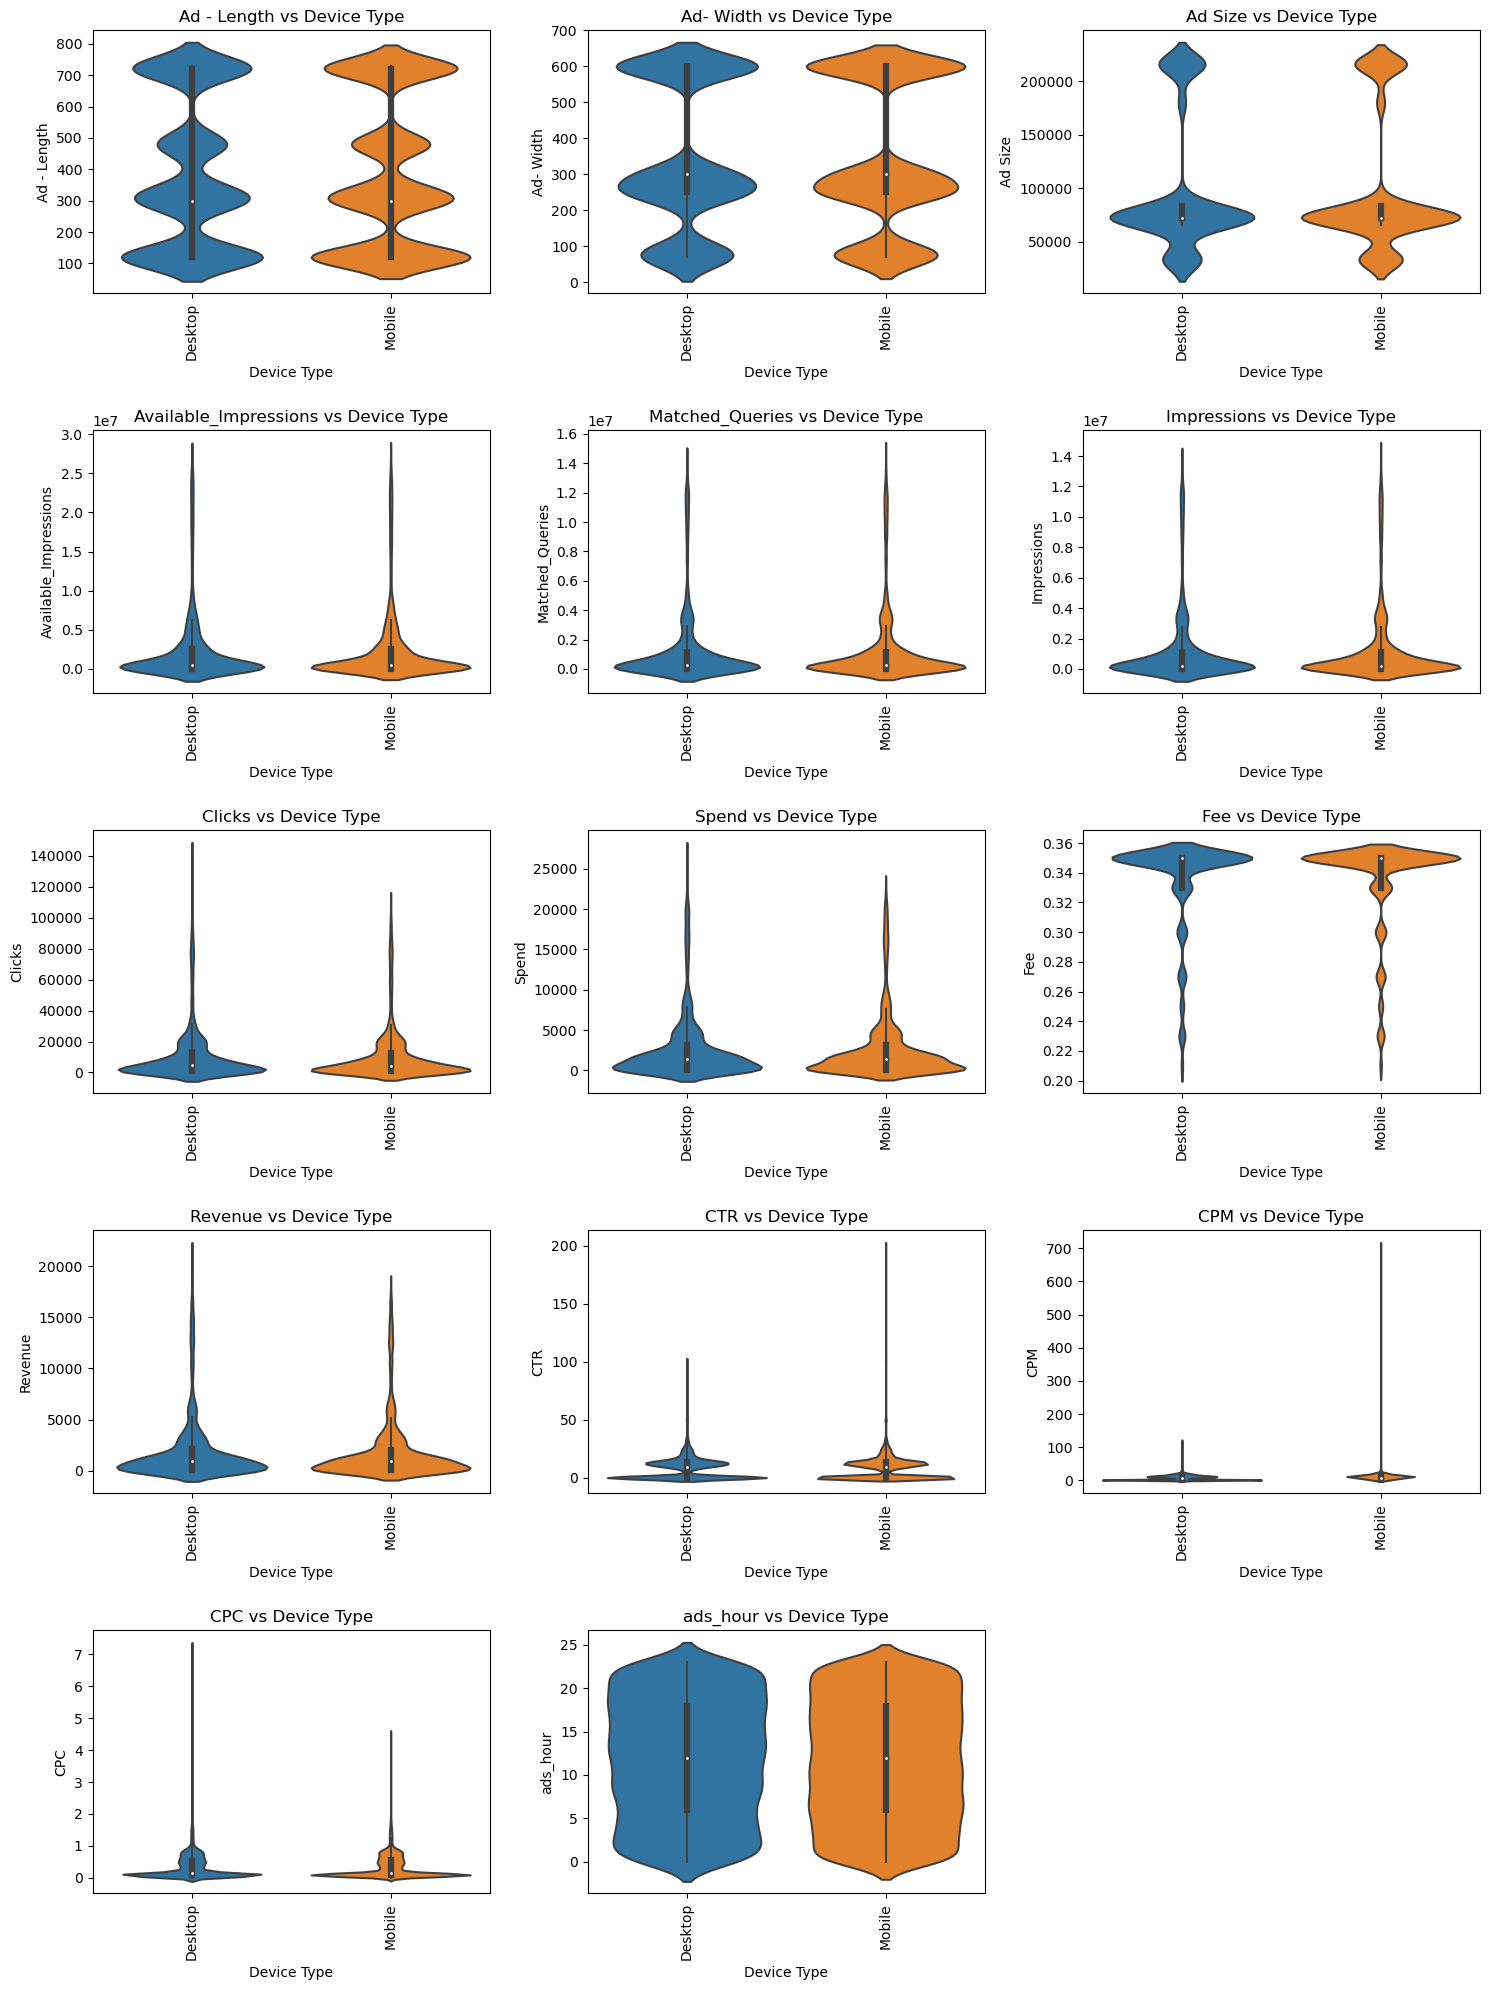



bivariate analysis for Format


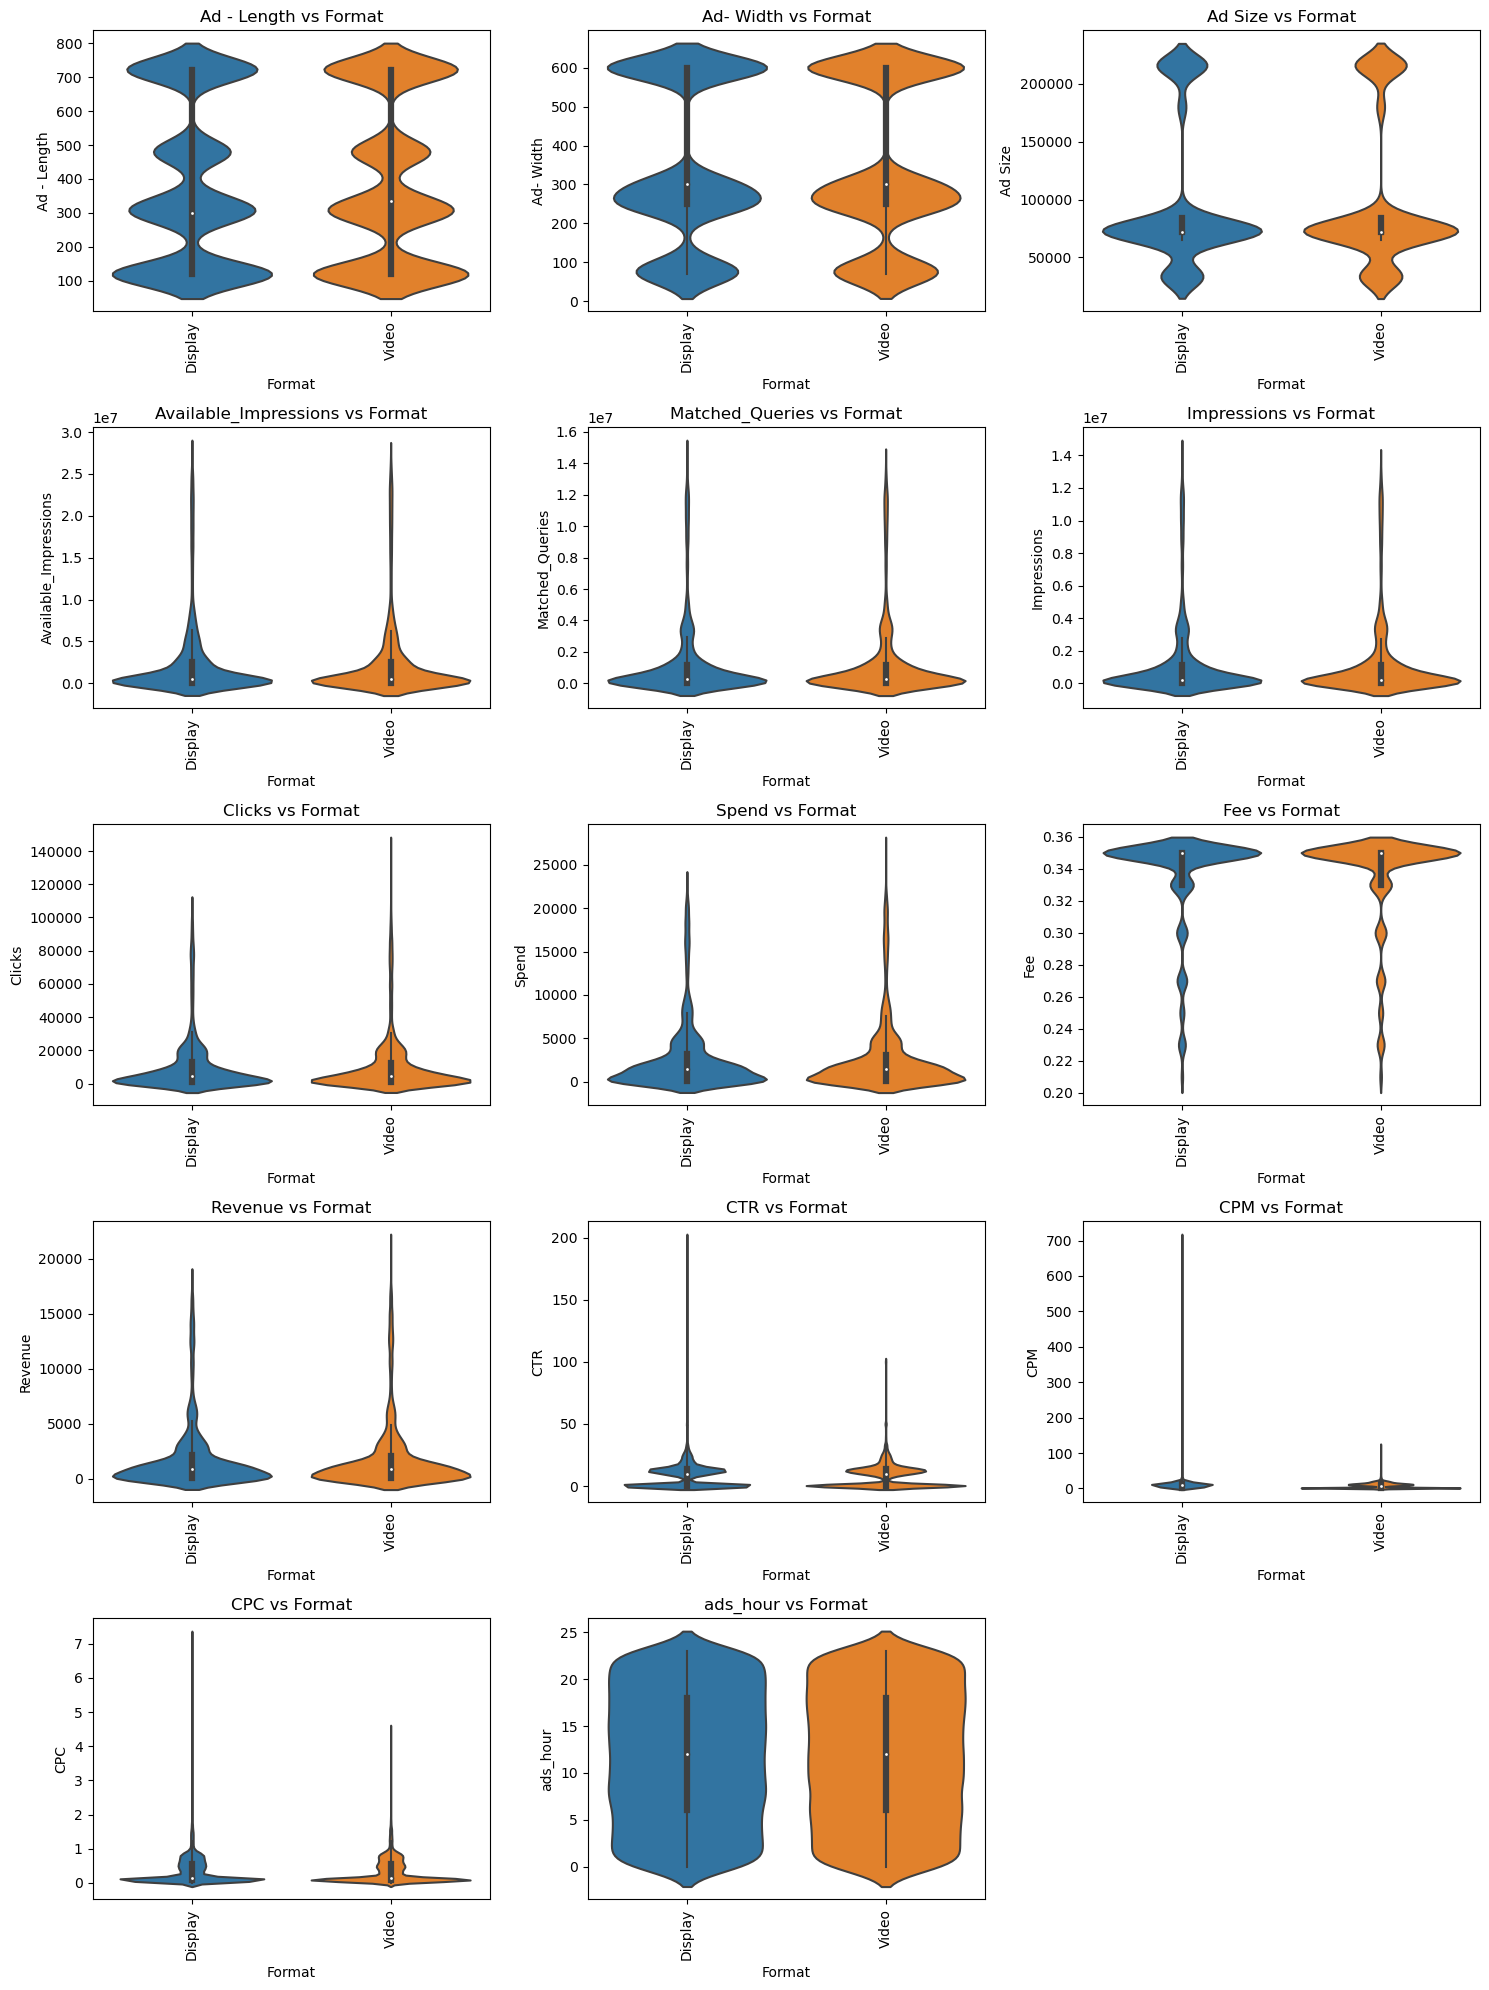

In [68]:
for cat_col in catgorical_columns:
    print(f'bivariate analysis for {cat_col}')
    num_cat_bivariate(ads_data_v1,cat_col, numeric_columns)
    print('\n')

#### Key Observations
1. Each format in Inventory Type has a unique dimension as well as available impressions and these might have been designed keeping in mind the available impressions on the network.
2. Ad-Length for videos is longer than display ads.

#### Relationship between categorical columns

In [69]:
def bivariate_cat(df, categorical_columns):
    for i in range(0,len(categorical_columns)):
        for j in range(i+1, len(categorical_columns)):
            print(f"Cross-tabulation between {categorical_columns[i]} and {categorical_columns[j]}")
            cross_tab = pd.crosstab(df[categorical_columns[i]], df[categorical_columns[j]])
            display(cross_tab)
            print('\n')

In [70]:
bivariate_cat(ads_data_v1, catgorical_columns)

Cross-tabulation between InventoryType and Ad Type


Ad Type        Inter217  Inter218  Inter219  Inter220  Inter221  Inter222  \
InventoryType                                                               
Format1             273       276       276       265       270       268   
Format2             126       127       127       127       127       127   
Format3             253       253       253       253       253       253   
Format4             511       510       514       513       512       514   
Format5             308       304       301       305       309       304   
Format6             136       127       130       135       134       135   
Format7              48        48        49        46        45        48   

Ad Type        Inter223  Inter224  Inter225  Inter226  Inter227  Inter228  \
InventoryType                                                               
Format1             274       278       268       269       278       269   
Format2             127       127       127       127       132       129   
Format3             253       253       253       253       253       253   
Format4             513       513       511       511       510       511   
Format5             307       306       300       299       298       302   
Format6             132       133       135       134       131       130   
Format7              48        48        49        47        45        45   

Ad Type        Inter229  inter230  
InventoryType                      
Format1             279       271  
Format2             129       130  
Format3             252       252  
Format4             509       513  
Format5             304       302  
Format6             129       129  
Format7              46        47



Cross-tabulation between InventoryType and Platform


Platform        App  Video   Web
InventoryType                   
Format1         824   1631  1359
Format2         386    769   634
Format3         759   1516  1265
Format4        1532   3072  2561
Format5         911   1813  1525
Format6         392    788   670
Format7         138    284   237



Cross-tabulation between InventoryType and Device Type


Device Type    Desktop  Mobile
InventoryType                 
Format1           1374    2440
Format2            636    1153
Format3           1264    2276
Format4           2561    4604
Format5           1523    2726
Format6            663    1187
Format7            239     420



Cross-tabulation between InventoryType and Format


Format         Display  Video
InventoryType                
Format1           1926   1888
Format2            896    893
Format3           1746   1794
Format4           3629   3536
Format5           2081   2168
Format6            905    945
Format7            331    328



Cross-tabulation between Ad Type and Platform


Platform   App  Video   Web
Ad Type                    
Inter217     0      0  1655
Inter218  1645      0     0
Inter219     0   1650     0
Inter220     0      0  1644
Inter221  1650      0     0
Inter222     0   1649     0
Inter223     0      0  1654
Inter224     0      0  1658
Inter225     0   1643     0
Inter226     0      0  1640
Inter227  1647      0     0
Inter228     0   1639     0
Inter229     0   1648     0
inter230     0   1644     0



Cross-tabulation between Ad Type and Device Type


Device Type  Desktop  Mobile
Ad Type                     
Inter217        1655       0
Inter218           0    1645
Inter219        1650       0
Inter220           0    1644
Inter221           0    1650
Inter222        1649       0
Inter223           0    1654
Inter224        1658       0
Inter225           0    1643
Inter226           0    1640
Inter227           0    1647
Inter228           0    1639
Inter229        1648       0
inter230           0    1644



Cross-tabulation between Ad Type and Format


Format    Display  Video
Ad Type                 
Inter217      826    829
Inter218      836    809
Inter219      831    819
Inter220      793    851
Inter221      871    779
Inter222      808    841
Inter223      794    860
Inter224      837    821
Inter225      813    830
Inter226      818    822
Inter227      842    805
Inter228      836    803
Inter229      812    836
inter230      797    847



Cross-tabulation between Platform and Device Type


Device Type  Desktop  Mobile
Platform                    
App                0    4942
Video           4947    4926
Web             3313    4938



Cross-tabulation between Platform and Format


Format    Display  Video
Platform                
App          2549   2393
Video        4897   4976
Web          4068   4183



Cross-tabulation between Device Type and Format


Format       Display  Video
Device Type                
Desktop         4114   4146
Mobile          7400   7406

#### Key Observations
1. There are different ad types specifically for different platforms and devices.
2. Ads on app is only done for mobiles.

## Outlier treatment
For outlier treatment we will be using Winsorization method where we will replace the extreme values lying beyond 1.5 times the Inter Quartile Range (IQR) from 75 percentile mark and below 25 percentile mark with 95 percentile value and 5 percentile value respectively. 

In [71]:
# creating a new dataframe to store numeric columns data
ads_num = ads_data_v1.select_dtypes(include=['int64', 'int32', 'float'])
ads_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ad - Length            23066 non-null  int64  
 1   Ad- Width              23066 non-null  int64  
 2   Ad Size                23066 non-null  int64  
 3   Available_Impressions  23066 non-null  int64  
 4   Matched_Queries        23066 non-null  int64  
 5   Impressions            23066 non-null  int64  
 6   Clicks                 23066 non-null  int64  
 7   Spend                  23066 non-null  float64
 8   Fee                    23066 non-null  float64
 9   Revenue                23066 non-null  float64
 10  CTR                    23066 non-null  float64
 11  CPM                    23066 non-null  float64
 12  CPC                    23066 non-null  float64
 13  ads_hour               23066 non-null  int32  
dtypes: float64(6), int32(1), int64(7)
memory usage: 2.4 MB

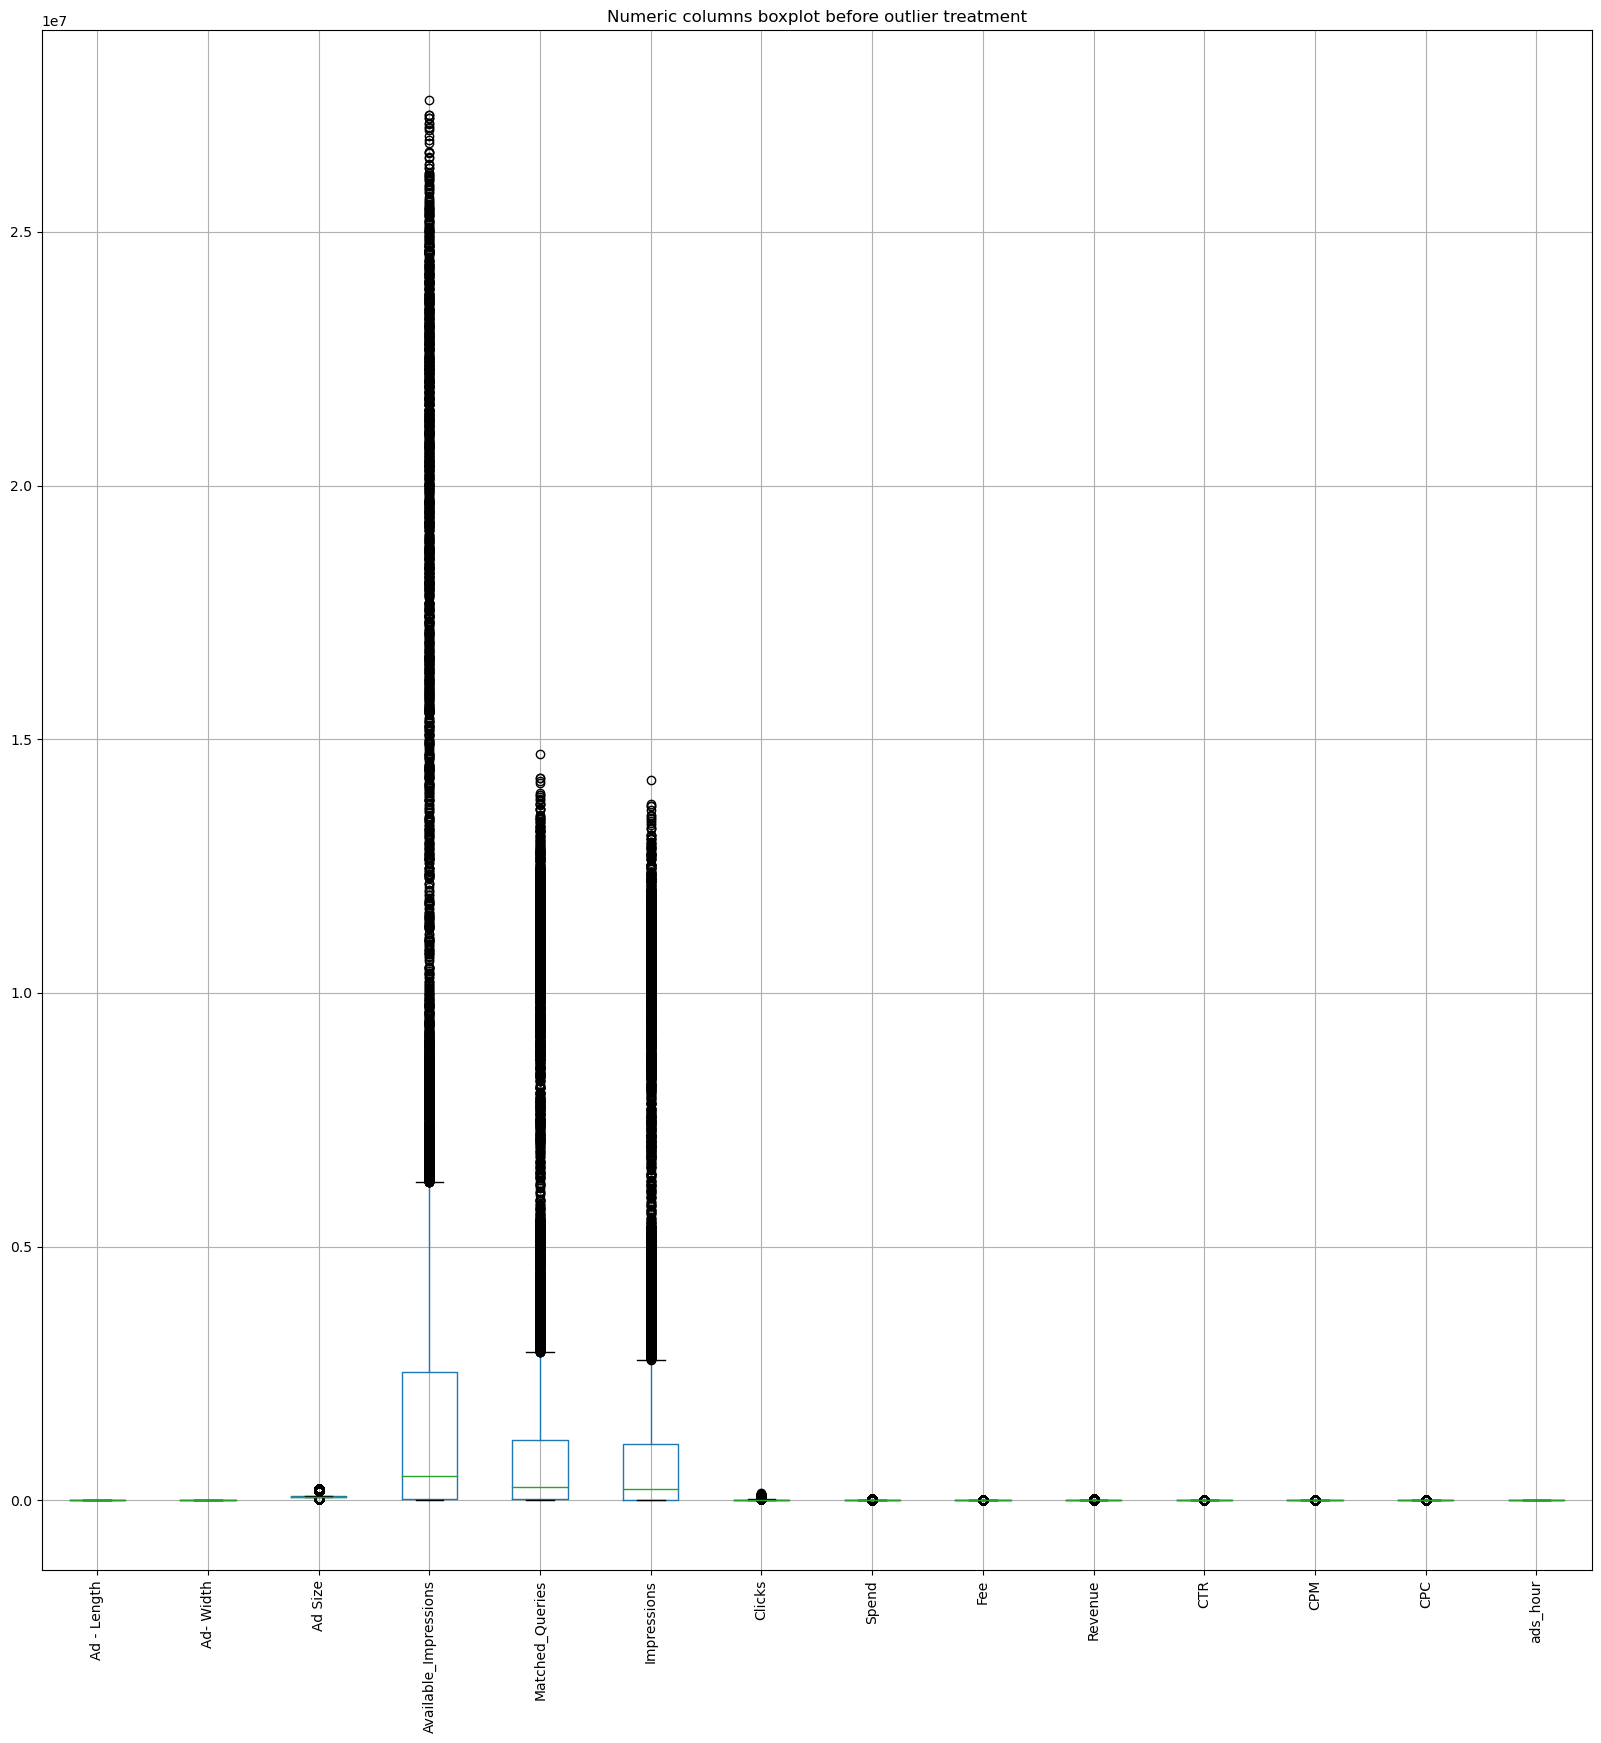

In [72]:
ads_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.title('Numeric columns boxplot before outlier treatment')
plt.show()

In [73]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    q95=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: q95 if y > q95 else y).apply(lambda y: q5 if y < q5 else y)



In [74]:
for i in numeric_columns:    
    ads_num[i]=treat_outlier(ads_num[i])

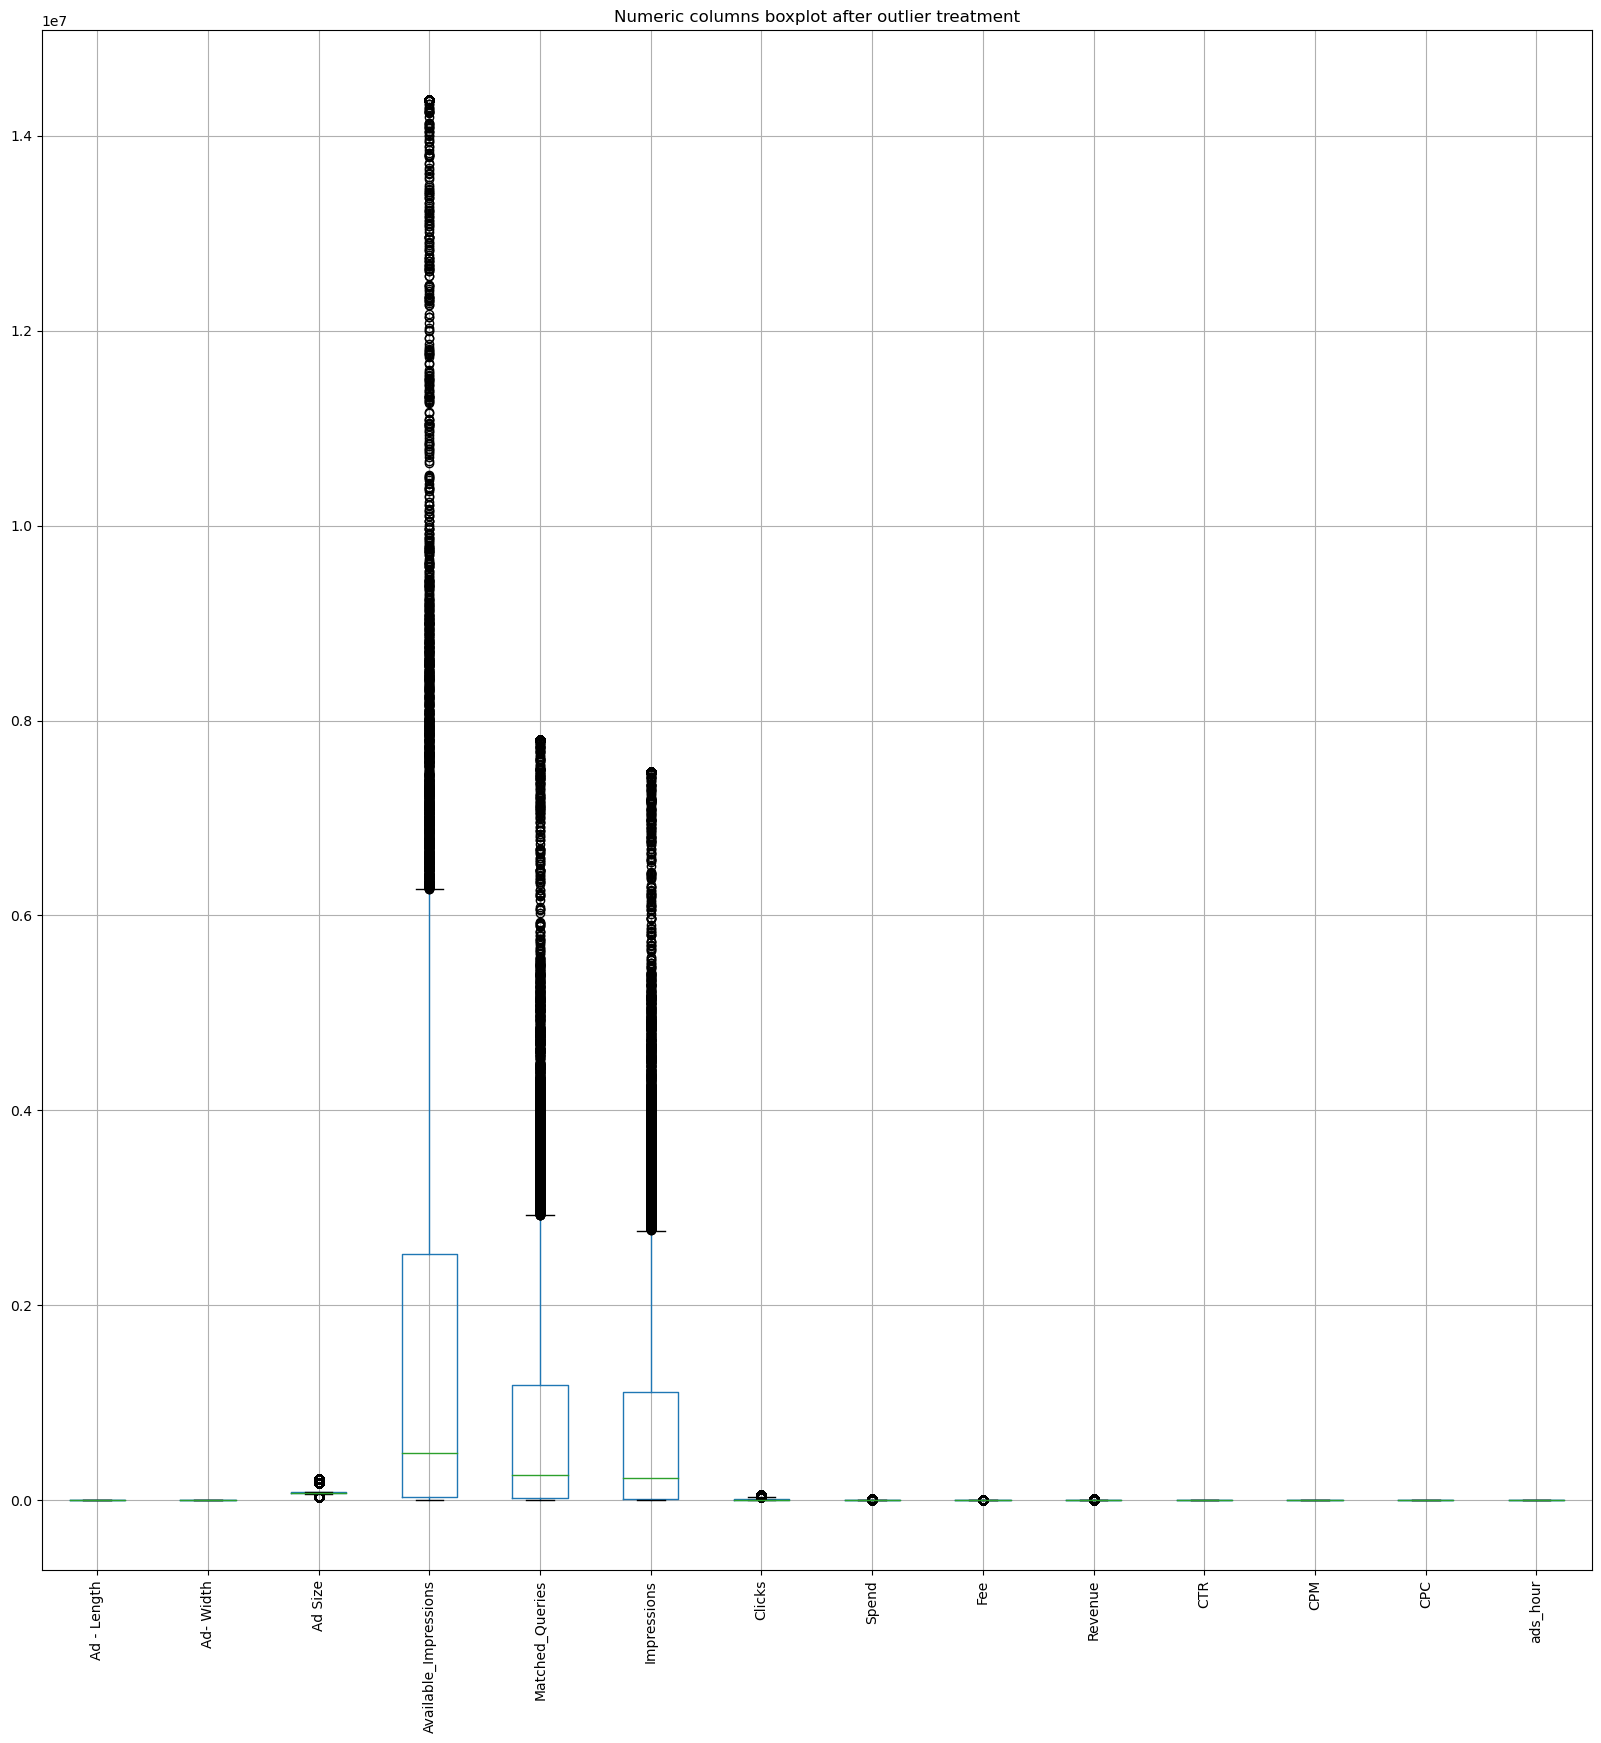

In [75]:
ads_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.title('Numeric columns boxplot after outlier treatment')
plt.show()

## Data scaling
For scaling we will use Z score scaling since data in features are of different scale and Z score method will help reduce this difference bring data on almost similar scales ensuring that all features contribute equally to clustering.

Also, since clustering algorithms use distance based method to measure similarity and dissimilarity between data points, scaling reduces the magnitude of variability between the data point helping in faster convergences, reducing the time taken by the algorithm in clustering drastically.

In [76]:
ads_scaled = ads_num.apply(zscore)

In [77]:
ads_scaled.describe().T

count          mean       std       min       25%  \
Ad - Length            23066.0  1.281478e-16  1.000022 -1.134891 -1.134891   
Ad- Width              23066.0 -1.182903e-16  1.000022 -1.319110 -0.432797   
Ad Size                23066.0  2.464381e-17  1.000022 -1.024985 -0.400970   
Available_Impressions  23066.0  0.000000e+00  1.000022 -0.593128 -0.583891   
Matched_Queries        23066.0  1.971505e-17  1.000022 -0.586173 -0.576910   
Impressions            23066.0 -3.943010e-17  1.000022 -0.581070 -0.576915   
Clicks                 23066.0  3.943010e-17  1.000022 -0.737121 -0.682799   
Spend                  23066.0  0.000000e+00  1.000022 -0.754487 -0.728988   
Fee                    23066.0  0.000000e+00  1.000022 -2.973434 -0.209252   
Revenue                23066.0 -3.943010e-17  1.000022 -0.712603 -0.690262   
CTR                    23066.0  8.871773e-17  1.000022 -1.015889 -1.005333   
CPM                    23066.0  2.217943e-16  1.000022 -1.067315 -0.980968   
CPC                    23066.0  2.168656e-16  1.000022 -0.908581 -0.795531   
ads_hour               23066.0  1.035040e-16  1.000022 -1.563029 -0.825671   

                            50%       75%       max  
Ad - Length           -0.364496  1.433093  1.467332  
Ad- Width             -0.186599  1.290590  1.290590  
Ad Size               -0.400970 -0.205965  1.939086  
Available_Impressions -0.458606  0.110324  3.404928  
Matched_Queries       -0.454345  0.017206  3.402121  
Impressions           -0.461761  0.008361  3.379223  
Clicks                -0.393262  0.258973  3.210313  
Spend                 -0.322959  0.191044  3.154074  
Fee                    0.481794  0.481794  0.481794  
Revenue               -0.334496  0.141374  3.239009  
CTR                    0.182298  0.713161  2.055065  
CPM                    0.050671  0.778227  1.921144  
CPC                   -0.624259  0.780447  2.089664  
ads_hour               0.059159  0.943988  1.533875

## Clustering
### Hierarchical Clustering

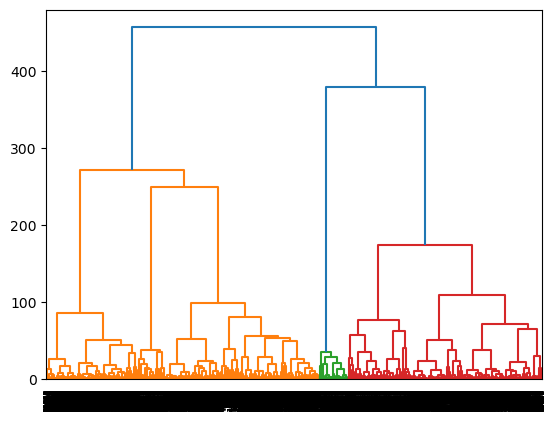

In [78]:
X = linkage(ads_scaled, method='ward', metric='euclidean')
dend = dendrogram(X)

The above dendrogram is very cluttered, however, from it we can conclude that as per hierarchical clustering the optimum number of clusters are 3. Below we will try to understand better by reducing this cluttering.
#### Cutting the Dendrogram with suitable clusters

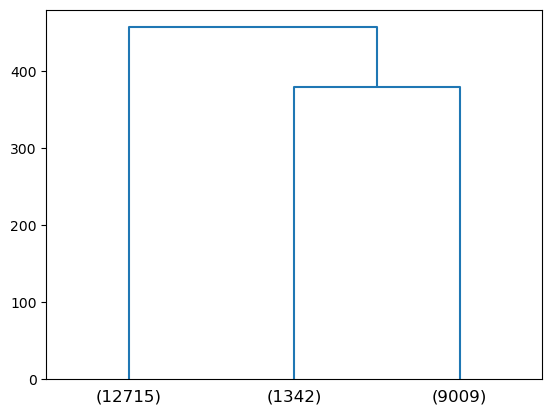

In [79]:
dend = dendrogram(X, truncate_mode= 'lastp', p = 3)

As per the above dendrogram, cluster 1 accounts for 12715 instances covering over 50% of the observations followed by cluster 3 with 9009 instances and cluster 2 account for only 1342 instances. To confirm that we have got correct number of clusters using hierarchical clustering, we will do K-means clustering and try to confirm the optimum number of clusters using silhouette scores.

### K-Means Clustering

In [80]:
# Forming 2 clusters with k = 3
k_means = KMeans(n_clusters= 3)
k_means.fit(ads_scaled)

KMeans(n_clusters=3)

In [81]:
# output of observations
k_means.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [82]:
# within clusters sum of squares
k_means.inertia_

144816.5498088684

#### K-elbow Method
Forming clusters and creating a list which has within sum of squares when K = 1,2,3,4,5,6,7,8,9,10

In [83]:
# Calculating wss values for K-elbow method
wss = []
for i in range(1,11):
    k_means = KMeans(n_clusters= i)
    k_means.fit(ads_scaled)
    wss.append(k_means.inertia_)

In [84]:
wss

[322924.0000000013,
 216850.69609005714,
 144816.54795820327,
 108009.15860896764,
 76394.34707660924,
 61246.71869404553,
 53976.348114304375,
 47649.587952696034,
 43411.09877856516,
 40524.00101545093]

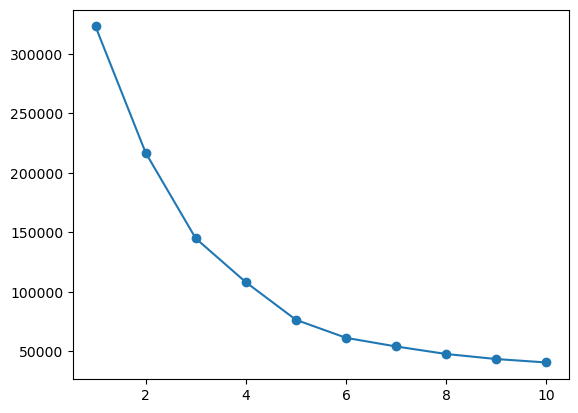

In [85]:
a=[1,2,3,4,5,6,7,8,9,10]
plt.plot(a, wss, marker = 'o')
plt.show()

The elbow chart above does not have a clear breakout in the elbow after K = 3 as there is there is consistent drop in the within sum of squares upto K = 6 before we can see any signs of the plot getting flattening out. So to find the optimum number of clusters we will calculate silhouette score for all values of K taken above.
#### Silhouette Score 

In [86]:
sil_scores = [0]
for i in range(2,11):
    k_means = KMeans(n_clusters= i, init= 'k-means++', random_state= 41)
    k_means.fit(ads_scaled)
    sil_score = silhouette_score(ads_scaled, k_means.labels_)
    sil_scores.append(sil_score)   

In [87]:
sil_scores

[0,
 0.41181623530209543,
 0.3754094805243497,
 0.4377220196016539,
 0.49100853847118037,
 0.4719034489866097,
 0.4582803970483659,
 0.412056607368535,
 0.3858431012378277,
 0.38619507109354423]

In [88]:
max_element = sil_scores.index(max(sil_scores))+1

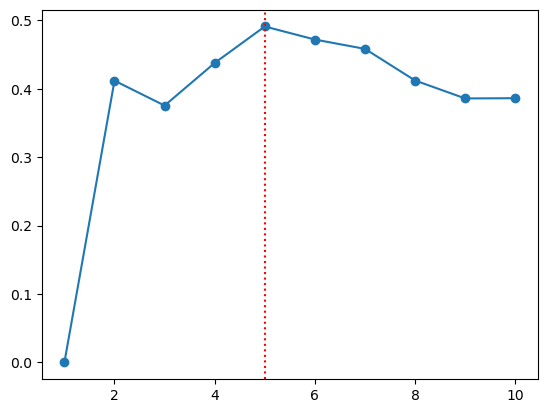

In [89]:
b=[1,2,3,4,5,6,7,8,9,10]
plt.plot(b, sil_scores, marker = 'o')
plt.axvline(max_element, color = 'red', linestyle = 'dotted')
plt.show()

In the above plot red dotted line is used to mark the K value for which Silhouette score is highest for K = 5, at 0.48 which is considered the optimum number of clusters for this data, as far as K = 3 is concerned which we got from hierarchical clustering it has the second lowest value at 0.37 so we reject hierarchical clustering finding of 3 clusters and will continue with K = 5.

#### K-means with K = 5

In [90]:
k_means = KMeans(n_clusters= 5, init= 'k-means++', random_state= 41)
k_means.fit(ads_scaled)
labels = k_means.labels_

In [91]:
silhouette_score(ads_scaled, labels, random_state=41)

0.49100853847118037

Applying cluster to the ads_data_v1

In [92]:
ads_num['Clus_kmeans5'] = labels
display(ads_num.head())
display(ads_num.tail())

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0          300        250    75000                 1806.0            325.0   
1          300        250    75000                 1780.0            285.0   
2          300        250    75000                 2727.0            356.0   
3          300        250    75000                 2430.0            497.0   
4          300        250    75000                 1218.0            242.0   

   Impressions  Clicks  Spend   Fee  Revenue       CTR       CPM       CPC  \
0        323.0    13.0   1.03  0.35   0.6695  0.309598  1.194793  0.056989   
1        285.0    13.0   1.03  0.35   0.6695  0.350877  1.194793  0.056989   
2        355.0    13.0   1.03  0.35   0.6695  0.281690  1.194793  0.056989   
3        495.0    13.0   1.03  0.35   0.6695  0.202020  1.194793  0.056989   
4        242.0    13.0   1.03  0.35   0.6695  0.413223  1.194793  0.056989   

   ads_hour  Clus_kmeans5  
0      17.0             2  
1      10.0             2  
2      22.0             2  
3      20.0             2  
4      15.0             2

Ad - Length  Ad- Width  Ad Size  Available_Impressions  \
23061          720        300   216000                 486.25   
23062          720        300   216000                 486.25   
23063          720        300   216000                 486.25   
23064          120        600    72000                 486.25   
23065          720        300   216000                 486.25   

       Matched_Queries  Impressions  Clicks  Spend   Fee  Revenue        CTR  \
23061           160.25       149.25    13.0   1.03  0.35   0.6695  23.782197   
23062           160.25       149.25    13.0   1.03  0.35   0.6695  23.782197   
23063           160.25       149.25    13.0   1.03  0.35   0.6695  23.782197   
23064           160.25       149.25    13.0   1.03  0.35   0.6695  23.782197   
23065           160.25       149.25    13.0   1.03  0.35   0.6695  23.782197   

             CPM       CPC  ads_hour  Clus_kmeans5  
23061  20.378835  0.070000       7.0             3  
23062  20.000000  0.056989       7.0             3  
23063  20.378835  0.056989      22.0             3  
23064  20.378835  0.070000       2.0             1  
23065  20.378835  0.090000       1.0             3

#### Cluster Profiling

In [93]:
ads_num.Clus_kmeans5.value_counts().sort_index()

Clus_kmeans5
0    1529
1    6977
2    8820
3    4294
4    1446
Name: count, dtype: int64

In [94]:
clust_profile=ads_num.groupby('Clus_kmeans5').mean()
clust_profile['freq']=ads_num.Clus_kmeans5.value_counts().sort_index()
clust_profile.T

Clus_kmeans5                      0             1             2  \
Ad - Length            6.754506e+02    152.780278  3.976939e+02   
Ad- Width              1.199804e+02    558.212699  1.801995e+02   
Ad Size                7.028947e+04  77627.633653  6.190121e+04   
Available_Impressions  1.339262e+07  48493.492081  2.956154e+06   
Matched_Queries        7.320533e+06  29658.611115  1.545106e+06   
Impressions            7.015764e+06  22108.002508  1.497152e+06   
Clicks                 1.748777e+04   3047.977641  4.462684e+03   
Spend                  1.209195e+04    326.782750  2.382393e+03   
Fee                    2.537083e-01      0.349693  3.412324e-01   
Revenue                9.039052e+03    213.485554  1.590548e+03   
CTR                    1.952174e-01     15.044317  3.598913e-01   
CPM                    1.697421e+00     13.838584  1.748668e+00   
CPC                    8.489766e-01      0.102967  5.468139e-01   
ads_hour               1.435971e+01     10.936936  1.109649e+01   
freq                   1.529000e+03   6977.000000  8.820000e+03   

Clus_kmeans5                       3              4  
Ad - Length               715.346996     142.531120  
Ad- Width                 302.945971     570.954357  
Ad Size                215485.794131   75759.336100  
Available_Impressions  246421.787087  840171.217842  
Matched_Queries        134714.179145  588656.074689  
Impressions            114349.264264  496622.592669  
Clicks                  14162.820913   48599.696404  
Spend                    1223.867068    7205.564668  
Fee                         0.349544       0.285705  
Revenue                   797.055839    5182.665433  
CTR                        13.032602      13.767551  
CPM                        11.485962      15.010082  
CPC                         0.090070       0.109943  
ads_hour                   11.821379      14.276625  
freq                     4294.000000    1446.000000

The above tables shows average valuesfor all numeric columns based on clusters.

In [95]:
# adding a column calculating the Click through ratio for advertising platform
clust_profile['CTR_platform'] = (clust_profile['Matched_Queries']*100)/clust_profile['Available_Impressions']
clust_profile

Ad - Length   Ad- Width        Ad Size  Available_Impressions  \
Clus_kmeans5                                                                  
0              675.450621  119.980379   70289.470242           1.339262e+07   
1              152.780278  558.212699   77627.633653           4.849349e+04   
2              397.693878  180.199546   61901.210884           2.956154e+06   
3              715.346996  302.945971  215485.794131           2.464218e+05   
4              142.531120  570.954357   75759.336100           8.401712e+05   

              Matched_Queries   Impressions        Clicks         Spend  \
Clus_kmeans5                                                              
0                7.320533e+06  7.015764e+06  17487.773054  12091.952976   
1                2.965861e+04  2.210800e+04   3047.977641    326.782750   
2                1.545106e+06  1.497152e+06   4462.684014   2382.393325   
3                1.347142e+05  1.143493e+05  14162.820913   1223.867068   
4                5.886561e+05  4.966226e+05  48599.696404   7205.564668   

                   Fee      Revenue        CTR        CPM       CPC  \
Clus_kmeans5                                                          
0             0.253708  9039.052377   0.195217   1.697421  0.848977   
1             0.349693   213.485554  15.044317  13.838584  0.102967   
2             0.341232  1590.548113   0.359891   1.748668  0.546814   
3             0.349544   797.055839  13.032602  11.485962  0.090070   
4             0.285705  5182.665433  13.767551  15.010082  0.109943   

               ads_hour  freq  CTR_platform  
Clus_kmeans5                                 
0             14.359712  1529     54.660945  
1             10.936936  6977     61.159982  
2             11.096485  8820     52.267448  
3             11.821379  4294     54.668128  
4             14.276625  1446     70.063823

#### Cluster Naming
Based on the clusters we can name them as following:
* Cluster 0: Skyscraper being tall and sleek
* Cluster 1: Long Rectangle being rectangle  with dimensions 153x558
* Cluster 2: Horizontal Rectangle being rectangle whose length is more than its width
* Cluster 3: Wide Skyscraper being more wider than skyscraper
* Cluster 4: Wide Rectangle having slightly lower length and higher width than long rectangle

We will replace the numeric values of the clusters with the above names given for further analysis.

In [96]:
# assigning above mentioned name to each cluster
cluster_naming = {0: 'Skyscraper', 1:'Long Rectangle', 2: 'Horizontal Rectangle', 3: 'Wide Skyscraper', 4: 'Wide Rectangle'}
ads_num['Clus_kmeans5'] = ads_num['Clus_kmeans5'].replace(cluster_naming)

for further analysis we will require categorical columns also so we will extract the categorial columns from ads_data_v1 data frame and then merge it with ads_num dataframe.

In [97]:
# extracting categorical columns and saving them in another data frame
ads_cat = ads_data_v1.select_dtypes(include=['object'])

In [98]:
# merging categorical dataframe with numeric dataframe
ads_cluster_data = pd.concat([ads_cat, ads_num], axis = 1)

In [99]:
ads_cluster_data.head()

InventoryType   Ad Type Platform Device Type   Format  Ad - Length  \
0       Format1  Inter222    Video     Desktop  Display          300   
1       Format1  Inter227      App      Mobile    Video          300   
2       Format1  Inter222    Video     Desktop  Display          300   
3       Format1  Inter228    Video      Mobile    Video          300   
4       Format1  Inter217      Web     Desktop    Video          300   

   Ad- Width  Ad Size  Available_Impressions  Matched_Queries  Impressions  \
0        250    75000                 1806.0            325.0        323.0   
1        250    75000                 1780.0            285.0        285.0   
2        250    75000                 2727.0            356.0        355.0   
3        250    75000                 2430.0            497.0        495.0   
4        250    75000                 1218.0            242.0        242.0   

   Clicks  Spend   Fee  Revenue       CTR       CPM       CPC  ads_hour  \
0    13.0   1.03  0.35   0.6695  0.309598  1.194793  0.056989      17.0   
1    13.0   1.03  0.35   0.6695  0.350877  1.194793  0.056989      10.0   
2    13.0   1.03  0.35   0.6695  0.281690  1.194793  0.056989      22.0   
3    13.0   1.03  0.35   0.6695  0.202020  1.194793  0.056989      20.0   
4    13.0   1.03  0.35   0.6695  0.413223  1.194793  0.056989      15.0   

           Clus_kmeans5  
0  Horizontal Rectangle  
1  Horizontal Rectangle  
2  Horizontal Rectangle  
3  Horizontal Rectangle  
4  Horizontal Rectangle

## Data Analysis by clusters

In [100]:
metrics = ['Impressions','Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC']

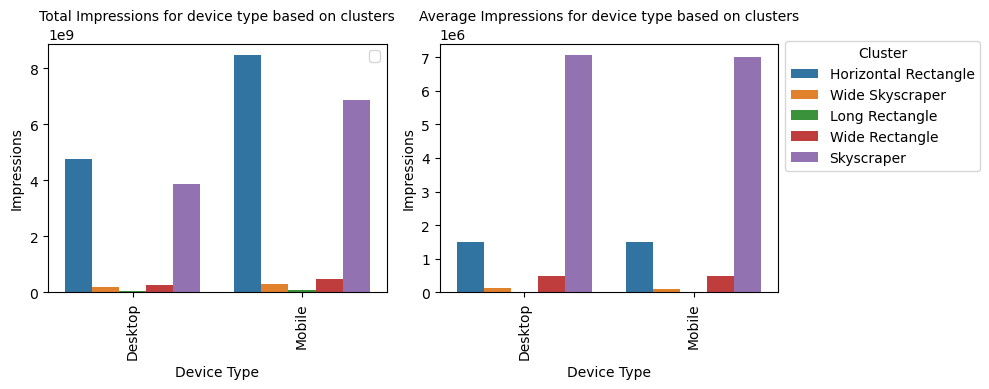

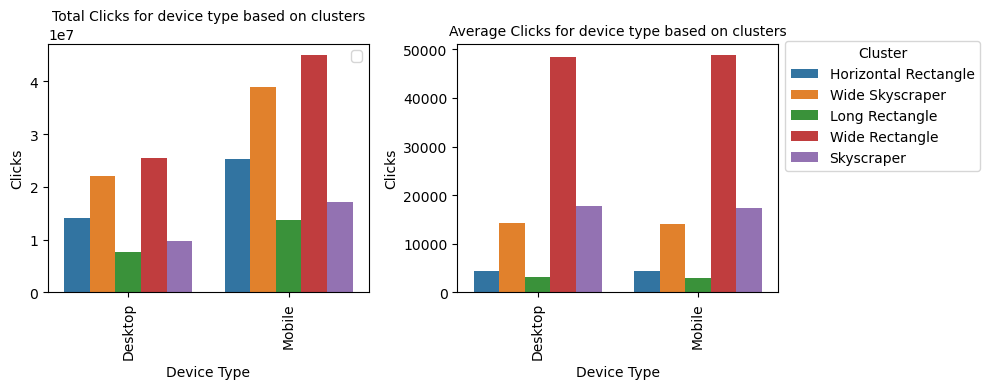

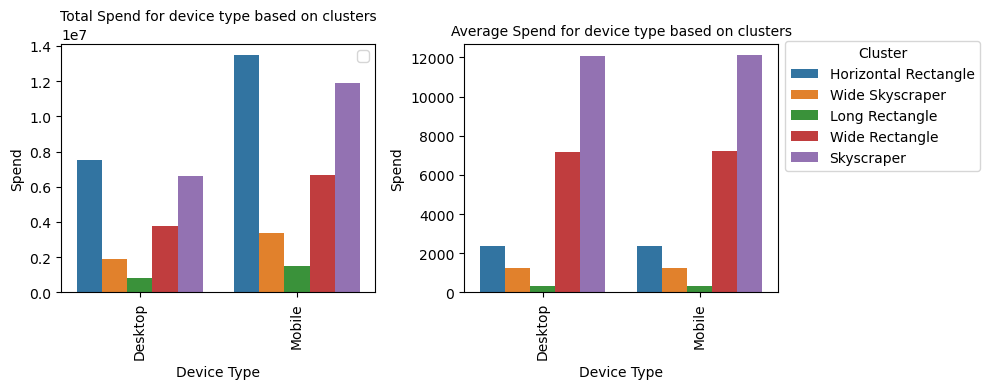

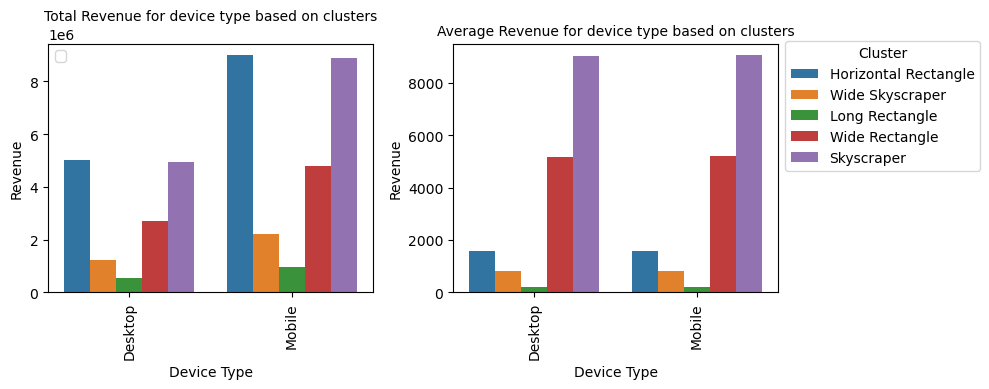

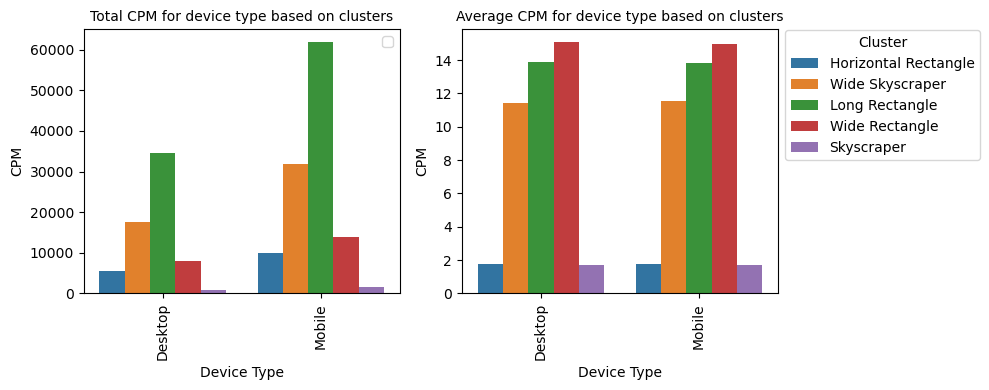

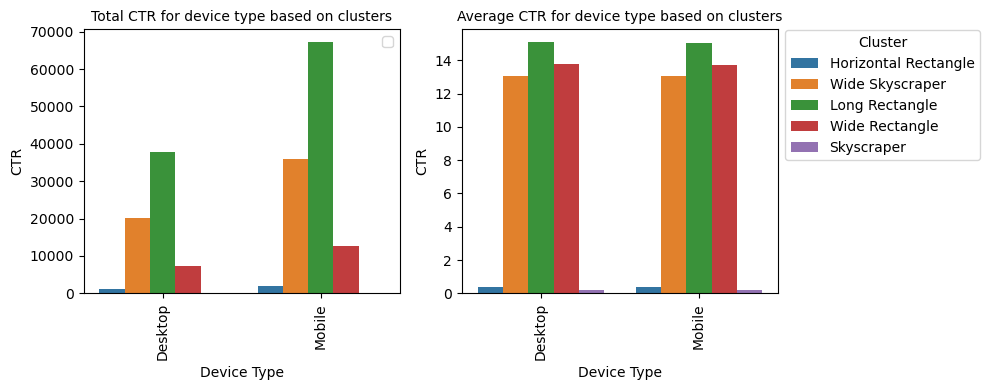

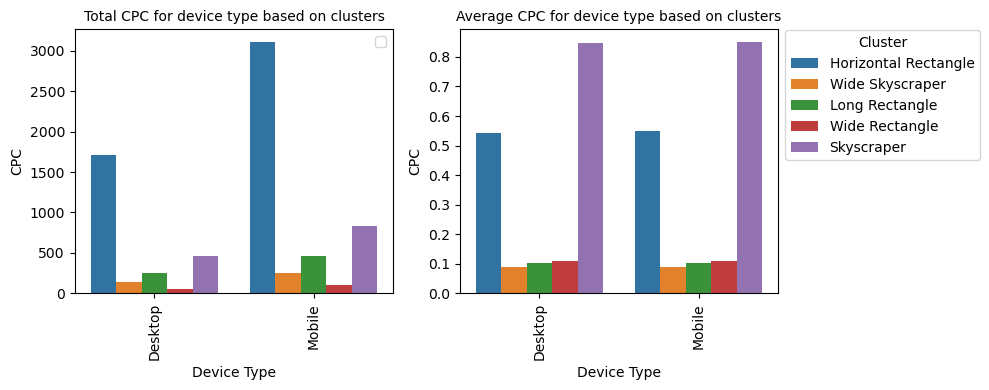

In [101]:
for metric in metrics:
    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
    sns.barplot(data = ads_cluster_data, x= 'Device Type', y= metric, hue= ads_cluster_data['Clus_kmeans5'],
                ci = False, estimator = 'sum', ax = axs[0])
    axs[0].tick_params(axis='x', rotation=90)
    axs[0].legend([])
    axs[0].set_title(f'Total {metric} for device type based on clusters', fontsize = 10)
    
    sns.barplot(data = ads_cluster_data, x= 'Device Type', y= metric, hue= ads_cluster_data['Clus_kmeans5'],
                ci = False, estimator = 'mean', ax = axs[1])
    axs[1].set_title(f'Average {metric} for device type based on clusters', fontsize = 10)
    axs[1].tick_params(axis='x', rotation=90)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.75), title='Cluster', ncol=1)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()



#### Key Observations
1. First thing that we can take from the above plot on an overall basis is that trends for both device type is very similar both in terms of totals and average. 
2. While total impressions count for Horizontal Rectangle clusters in highest followed by Skyscraper for both mobile and desktop, in average terms impressions count for Skyscraper is substatially larger than all the others which means for Skyscraper these impressions are much more concentrated.
3. While in impressions terms there is a huge difference in count for Horizontal Rectangle and Skyscraper with other three cluster types in terms of clicks in totality Wide Rectangle and Wide Skyscraper are performing much better in fact even in average terms Wide Rectangle types are providing highest returns in terms of clicks.
4. Since most impressions are of Horizontal Rectangle and Skyscrapers, ads spents are also in line with this as these clusters have the highest spent in totality and also on average terms most is spent on skyscrapers which means unit economics for Skyscrapers is not very efficient.
5. Revenue contribution from different clusters of ads is similar in proportion terms to ads spent with Horizontal Rectangle and Skyscrapers contributing the most in totality and skyscrapers providing the highest revenue on average terms.
6. The revenue generated by various ad clusters is approximately 30% lower than the expenditure incurred on these ads, which is not an ideal business scenario.
7. Since impression count for Horizontal Rectangle and Skyscrapers are most thus they have lowest cost per 1000 impressions (CPM) and other 3 cluster have significantly higher CPM with Long Rectangle having the highest in total terms while Wide Rectangle having the highest in average terms.
8. Click through ratio (CTR) for the two clusters with most impressions is minimal which means that though Horizontal Rectangle and Skyscrapers types of ads are used a lot but they are not receiving clicks on the contrary Long Rectangle ads are performing very well both in totality and average terms, Wide Rectangle and Wide Skyscraper types are also performing well in average CTR terms.
9. Given the low click-through rate (CTR) for Horizontal Rectangle and Skyscraper ads, their cost per click (CPC) is high. Conversely, Long Rectangle, Wide Rectangle, and Wide Skyscraper ads, which boast high CTR, exhibit low CPC.

## Conclusions
After analyzing the above data, Ads 24x7 needs to implement substantial changes to its business model. It not only falls short in financial terms, with ad spending nearly 50% higher than revenue, but also in terms of costs and meeting key sector metrics like CTR.

For improvement purposes the following recommendation are made
#### Recommendation
1. Based on the data provided by advertising platform, the CTR for them based on Matched_Queries where keywords searched matched keywords in the ads resulting in click to Available_Impressions is between the range of 50 and 70, while for Ads 24x7 the maximum CTR achieved is only 15, in fact for Horizontal Rectangle and Skyscraper which have most impressions this value is below 0.4. Thus, it is highly recommended for Ads 24x7 that a detail Keyword analysis project is carried out to study and extract the keywords which can be used to improve the ad content.

2. Ads 24x7 needs to look at the ads spent, as per the principle of unit economics per unit cost comes down as the number of units goes up, based on this principle for ad type which have high impressions their CPM should be low, however, clusters like Wide Rectangle, Wide Skyscraper and Long Rectangle have very high CPM. On the other hand, Horizontal Rectangle and Skyscraper have very poor CTR and CPC. The cost part and budgetary allocation should be relooked at to get better returns.

3. Amongst the clusters Long Rectangle, Wide Rectangle, and Wide Skyscraper are performing much better than Horizontal Rectangle and Skyscraper in terms of CTR and CPC, for the time being it is highly recommended that Ads 24x7 should use these ad types more until the above mentioned studies are carried out and changes are made, and though they have high CPM, we expect as the number of impressions for these clusters goes up the CPM would come down like in case of Horizontal Rectangle and Skyscraper which could help improve revenue while reducing spendings.

# Problem 2
## Background Information
Population census is held in India every ten years, a tradition dating back over a century. These censuses gather extensive data on various aspects of the population, which is then compiled and presented on state and district-wise basis. However, due to the multitude of characteristics covered in the census, the compiled data contains numerous variables, making it challenging to extract useful insights.
## Problem Statement
The objective of this analysis is to utilize PCA technique to determine the optimal number of principal components that capture most variance in the abstract of population census data, specifically focusing on female-headed households excluding institutional households. This process aims to reduce the dimensionality of the data.
## Domain
Social sciences
## Dataset Used
Census_data_india.xlsx
## Data Dictionary
* Name: Description
* State:	State Code
* District: District Code
* Name:	Name
* TRU1:	Area Name
* No_HH:	No of Household
* TOT_M:	Total population Male
* TOT_F:	Total population Female
* M_06:	Population in the age group 0-6 Male
* F_06:	Population in the age group 0-6 Female
* M_SC:	Scheduled Castes population Male
* F_SC:	Scheduled Castes population Female
* M_ST:	Scheduled Tribes population Male
* F_ST:	Scheduled Tribes population Female
* M_LIT:	Literates population Male
* F_LIT:	Literates population Female
* M_ILL:	Illiterate Male
* F_ILL:	Illiterate Female
* TOT_WORK_M:	Total Worker Population Male
* TOT_WORK_F:	Total Worker Population Female
* MAINWORK_M: Main Working Population Male
* MAINWORK_F:	Main Working Population Female
* MAIN_CL_M:	Main Cultivator Population Male
* MAIN_CL_F:	Main Cultivator Population Female
* MAIN_AL_M:	Main Agricultural Labourers Population Male
* MAIN_AL_F:	Main Agricultural Labourers Population Female
* MAIN_HH_M:	Main Household Industries Population Male
* MAIN_HH_F:	Main Household Industries Population Female
* MAIN_OT_M:	Main Other Workers Population Male
* MAIN_OT_F:	Main Other Workers Population Female
* MARGWORK_M:	Marginal Worker Population Male
* MARGWORK_F: Marginal Worker Population Female
* MARG_CL_M:	Marginal Cultivator Population Male
* MARG_CL_F:	Marginal Cultivator Population Female
* MARG_AL_M:	Marginal Agriculture Labourers Population Male
* MARG_AL_F:	Marginal Agriculture Labourers Population Female
* MARG_HH_M:	Marginal Household Industries Population Male
* MARG_HH_F:	Marginal Household Industries Population Female
* MARG_OT_M:	Marginal Other Workers Population Male
* MARG_OT_F:	Marginal Other Workers Population Female
* MARGWORK_3_6_M:	Marginal Worker Population 3-6 Male
* MARGWORK_3_6_F:	Marginal Worker Population 3-6 Female
* MARG_CL_3_6_M:	Marginal Cultivator Population 3-6 Male
* MARG_CL_3_6_F:	Marginal Cultivator Population 3-6 Female
* MARG_AL_3_6_M:	Marginal Agriculture Labourers Population 3-6 Male
* MARG_AL_3_6_F:	Marginal Agriculture Labourers Population 3-6 Female
* MARG_HH_3_6_M:	Marginal Household Industries Population 3-6 Male
* MARG_HH_3_6_F:	Marginal Household Industries Population 3-6 Female
* MARG_OT_3_6_M:	Marginal Other Workers Population Person 3-6 Male
* MARG_OT_3_6_F:	Marginal Other Workers Population Person 3-6 Female
* MARGWORK_0_3_M:	Marginal Worker Population 0-3 Male
* MARGWORK_0_3_F:	Marginal Worker Population 0-3 Female
* MARG_CL_0_3_M:	Marginal Cultivator Population 0-3 Male
* MARG_CL_0_3_F:	Marginal Cultivator Population 0-3 Female
* MARG_AL_0_3_M:	Marginal Agriculture Labourers Population 0-3 Male
* MARG_AL_0_3_F:	Marginal Agriculture Labourers Population 0-3 Female
* MARG_HH_0_3_M:	Marginal Household Industries Population 0-3 Male
* MARG_HH_0_3_F:	Marginal Household Industries Population 0-3 Female
* MARG_OT_0_3_M:	Marginal Other Workers Population 0-3 Male
* MARG_OT_0_3_F:	Marginal Other Workers Population 0-3 Female
* NON_WORK_M: Non Working Population Male
* NON_WORK_F:	Non Working Population Female
## Uploading Data

In [102]:
fh_census_data = pd.read_excel('D:/Kartik/GL MDS/Study_data/Assingnment_files/Module_3_ML1/Census_data_india.xlsx')

## Data Overview

In [103]:
data_overview(fh_census_data)

a glimpse of the data
----------------------------------------------------------------------------
first 5 rows


State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

last 5 rows


State Code  Dist.Code                     State                Area Name  \
635          34        636                Puducherry                     Mahe   
636          34        637                Puducherry                 Karaikal   
637          35        638  Andaman & Nicobar Island                 Nicobars   
638          35        639  Andaman & Nicobar Island  North  & Middle Andaman   
639          35        640  Andaman & Nicobar Island            South Andaman   

     No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
635   3333   8154  11781  1146  1203    21  ...             32             47   
636  10612  12346  21691  1544  1533  2234  ...            155            337   
637   1275   1549   2630   227   225     0  ...            104            134   
638   3762   5200   8012   723   664     0  ...            136            172   
639   7975  11977  18049  1470  1358     0  ...            173            122   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
635              0              0              0              0   
636              3             14             38            130   
637              9              4              2              6   
638             24             44             11             21   
639              6              2             17             17   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
635              0              0          32          47  
636              4             23         110         170  
637             17             47          76          77  
638              1              4         100         103  
639              2              4         148          99  

[5 rows x 61 columns]



shape of the dataset
----------------------------------------------------------------------------


(640, 61)



statistical summary
----------------------------------------------------------------------------


count           mean            std    min       25%      50%  \
State Code      640.0      17.114062       9.426486    1.0      9.00     18.0   
Dist.Code       640.0     320.500000     184.896367    1.0    160.75    320.5   
No_HH           640.0   51222.871875   48135.405475  350.0  19484.00  35837.0   
TOT_M           640.0   79940.576563   73384.511114  391.0  30228.00  58339.0   
TOT_F           640.0  122372.084375  113600.717282  698.0  46517.75  87724.5   
M_06            640.0   12309.098438   11500.906881   56.0   4733.75   9159.0   
F_06            640.0   11942.300000   11326.294567   56.0   4672.25   8663.0   
M_SC            640.0   13820.946875   14426.373130    0.0   3466.25   9591.5   
F_SC            640.0   20778.392188   21727.887713    0.0   5603.25  13709.0   
M_ST            640.0    6191.807813    9912.668948    0.0    293.75   2333.5   
F_ST            640.0   10155.640625   15875.701488    0.0    429.50   3834.5   
M_LIT           640.0   57967.979688   55910.282466  286.0  21298.00  42693.5   
F_LIT           640.0   66359.565625   75037.860207  371.0  20932.00  43796.5   
M_ILL           640.0   21972.596875   19825.605268  105.0   8590.00  15767.5   
F_ILL           640.0   56012.518750   47116.693769  327.0  22367.00  42386.0   
TOT_WORK_M      640.0   37992.407813   36419.537491  100.0  13753.50  27936.5   
TOT_WORK_F      640.0   41295.760938   37192.360943  357.0  16097.75  30588.5   
MAINWORK_M      640.0   30204.446875   31480.915680   65.0   9787.00  21250.5   
MAINWORK_F      640.0   28198.846875   29998.262689  240.0   9502.25  18484.0   
MAIN_CL_M       640.0    5424.342188    4739.161969    0.0   2023.50   4160.5   
MAIN_CL_F       640.0    5486.042188    5326.362728    0.0   1920.25   3908.5   
MAIN_AL_M       640.0    5849.109375    6399.507966    0.0   1070.25   3936.5   
MAIN_AL_F       640.0    8925.995312   12864.287584    0.0   1408.75   3933.5   
MAIN_HH_M       640.0     883.893750    1278.642345    0.0    187.50    498.5   
MAIN_HH_F       640.0    1380.773438    3179.414449    0.0    248.75    540.5   
MAIN_OT_M       640.0   18047.101562   26068.480886   36.0   3997.50   9598.0   
MAIN_OT_F       640.0   12406.035938   18972.202369  153.0   3142.50   6380.5   
MARGWORK_M      640.0    7787.960938    7410.791691   35.0   2937.50   5627.0   
MARGWORK_F      640.0   13096.914062   10996.474528  117.0   5424.50  10175.0   
MARG_CL_M       640.0    1040.737500    1311.546847    0.0    311.75    606.5   
MARG_CL_F       640.0    2307.682813    3564.626095    0.0    630.25   1226.0   
MARG_AL_M       640.0    3304.326562    3781.555707    0.0    873.50   2062.0   
MARG_AL_F       640.0    6463.281250    6773.876298    0.0   1402.50   4020.5   
MARG_HH_M       640.0     316.742188     462.661891    0.0     71.75    166.0   
MARG_HH_F       640.0     786.626562    1198.718213    0.0    171.75    429.0   
MARG_OT_M       640.0    3126.154687    3609.391821    7.0    935.50   2036.0   
MARG_OT_F       640.0    3539.323438    4115.191314   19.0   1071.75   2349.5   
MARGWORK_3_6_M  640.0   41948.168750   39045.316918  291.0  16208.25  30315.0   
MARGWORK_3_6_F  640.0   81076.323438   82970.406216  341.0  26619.50  56793.0   
MARG_CL_3_6_M   640.0    6394.987500    6019.806644   27.0   2372.00   4630.0   
MARG_CL_3_6_F   640.0   10339.864063    8467.473429   85.0   4351.50   8295.0   
MARG_AL_3_6_M   640.0     789.848438     905.639279    0.0    235.50    480.5   
MARG_AL_3_6_F   640.0    1749.584375    2496.541514    0.0    497.25    985.5   
MARG_HH_3_6_M   640.0    2743.635938    3059.586387    0.0    718.75   1714.5   
MARG_HH_3_6_F   640.0    5169.850000    5335.640960    0.0   1113.75   3294.0   
MARG_OT_3_6_M   640.0     245.362500     358.728567    0.0     58.00    129.5   
MARG_OT_3_6_F   640.0     585.884375     900.025817    0.0    127.75    320.5   
MARGWORK_0_3_M  640.0    2616.140625    3036.964381    7.0    755.00   1681.5   
MARGWORK_0_3_F  640.0    2834.545312    3327.83



information of features
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 


None



missing values
----------------------------------------------------------------------------


State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64



checking for duplicates
----------------------------------------------------------------------------
number of dupliacte rows: 0


frequency distribution of categorical columns
----------------------------------------------------------------------------
value counts for State
----------------------------------------------------------------------------
State
Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh  

In [104]:
# number of unique enteries in states column
no_states = fh_census_data['State'].nunique()
print(f'Number of states in dataset {no_states}')

Number of states in dataset 35


#### Key Observations
1. Dataset has 640 rows and 61 columns
2. Dataset has 59 numeric and 2 object type columns
3. In all the numeric columns the minimum value is greater than or equal to 1, there doesn't seems to be any bad data.
4. For missing values output is showing only for first five and last columns so we will have to check of it again.
5. There are no duplicates in the data.
6. There are 2 object type columns one represents the Area Name and another State, as per the census of 2011 there were 35 states and union territories in India comprising of total 640 districts represented by Area Name for our analysis we will be using term District as it adds more context. States column has 35 uniques states and 640 rows each representing a district, however, for some districts we can see that the value counts is more than one this is due to the fact that in some cases district with same name is present in multiple states like district named Bilaspur is present in 2 states namely Chattisgarh and Himachal Pradesh.
7. Columns State code and Dist.Code are irrelevant for our analysis so we will drop the in Pre-processing phase.

In [105]:
for i in range(0, len(fh_census_data.columns)):
    n = fh_census_data[fh_census_data.columns[i]].isnull().sum()
    if n > 0:
        display(n)
    else:
        print(f'{i+1}. No missing values for column {fh_census_data.columns[i]}')

1. No missing values for column State Code
2. No missing values for column Dist.Code
3. No missing values for column State
4. No missing values for column Area Name
5. No missing values for column No_HH
6. No missing values for column TOT_M
7. No missing values for column TOT_F
8. No missing values for column M_06
9. No missing values for column F_06
10. No missing values for column M_SC
11. No missing values for column F_SC
12. No missing values for column M_ST
13. No missing values for column F_ST
14. No missing values for column M_LIT
15. No missing values for column F_LIT
16. No missing values for column M_ILL
17. No missing values for column F_ILL
18. No missing values for column TOT_WORK_M
19. No missing values for column TOT_WORK_F
20. No missing values for column MAINWORK_M
21. No missing values for column MAINWORK_F
22. No missing values for column MAIN_CL_M
23. No missing values for column MAIN_CL_F
24. No missing values for column MAIN_AL_M
25. No missing values for column M

There are no missing values for all 61 columns
## Pre-processing Data
### Droping State Code and Dist.Code columns

In [106]:
# saving a copy of original data
fh_census_data1 = fh_census_data.copy()

In [107]:
# deleting irrelavent columns
fh_census_data.drop(['State Code', 'Dist.Code'], axis = 1, inplace= True)
fh_census_data.shape

(640, 59)

## Exploratory Data Analysis(EDA)
For EDA we will select only 5 columns namely No_HH, TOT_M, TOT_F, TOT_WORK_M and TOT_WORK_F along with State and Area Name columns. 

In [108]:
# creating a new df for EDA
eda_columns = ['State', 'Area Name', 'No_HH', 'TOT_M', 'TOT_F', 'TOT_WORK_M', 'TOT_WORK_F']
eda_fh = fh_census_data.loc[:,eda_columns]

In [109]:
eda_fh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State       640 non-null    object
 1   Area Name   640 non-null    object
 2   No_HH       640 non-null    int64 
 3   TOT_M       640 non-null    int64 
 4   TOT_F       640 non-null    int64 
 5   TOT_WORK_M  640 non-null    int64 
 6   TOT_WORK_F  640 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 35.1+ KB


### Univariate Analysis

Distribution of No_HH
----------------------------------------------------------------------------


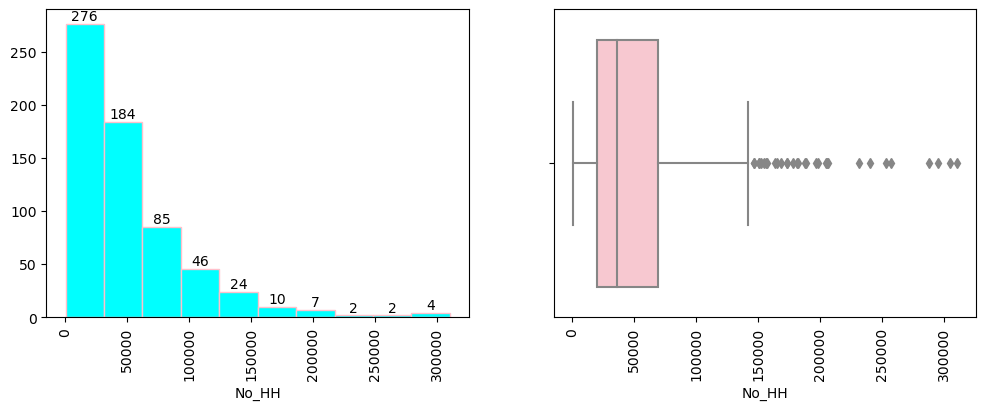

Distribution of TOT_M
----------------------------------------------------------------------------


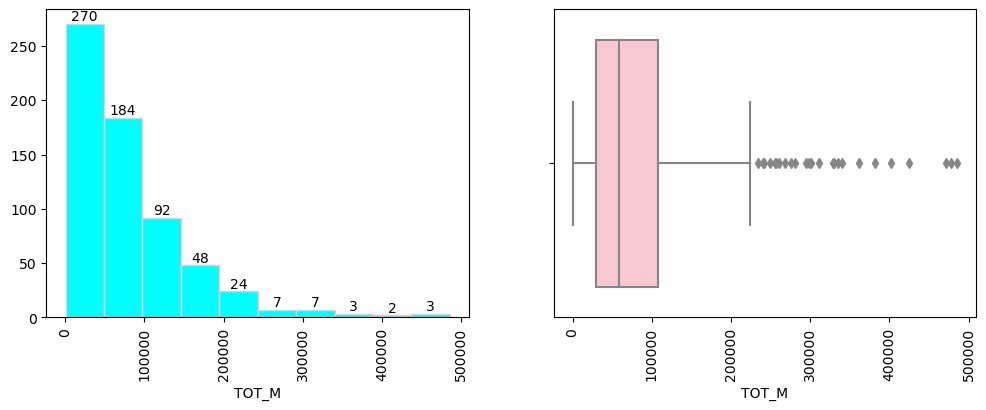

Distribution of TOT_F
----------------------------------------------------------------------------


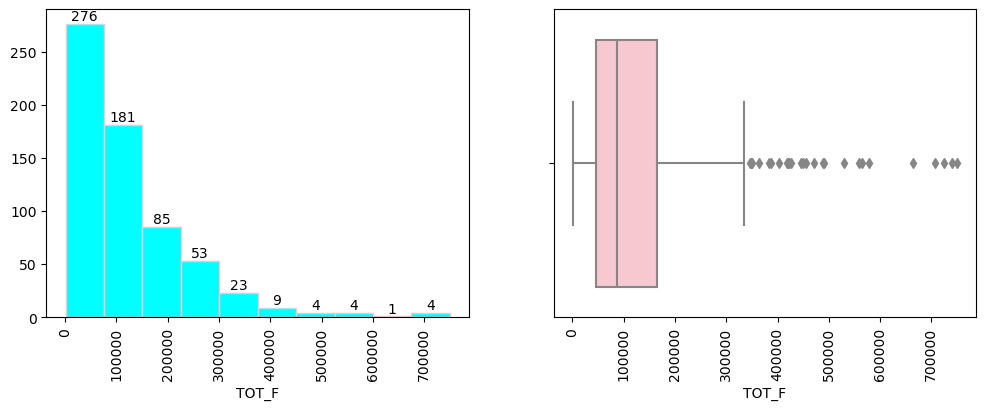

Distribution of TOT_WORK_M
----------------------------------------------------------------------------


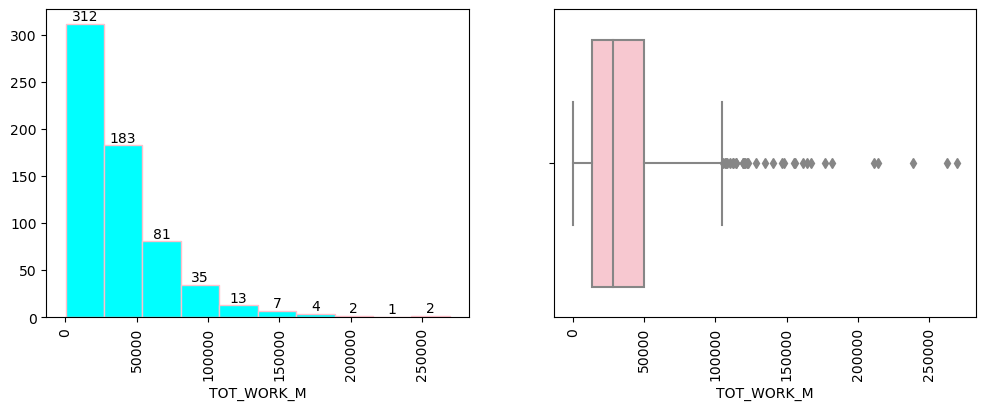

Distribution of TOT_WORK_F
----------------------------------------------------------------------------


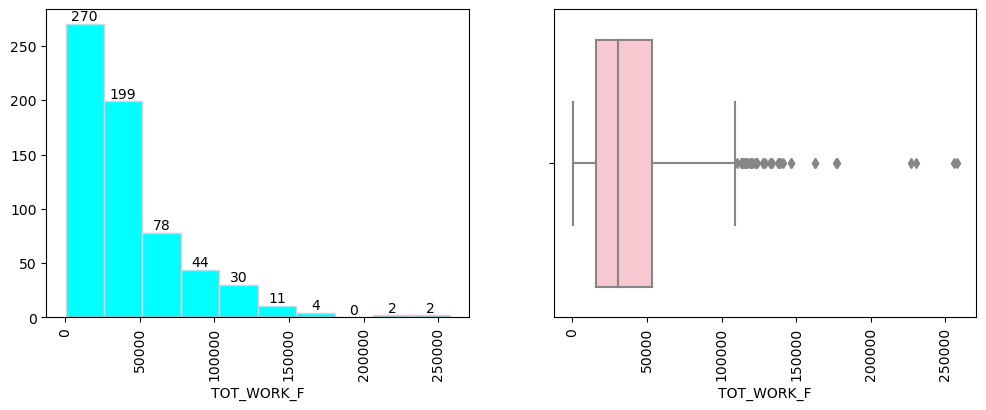

In [110]:
# analysis of numeric columns
numeric_columns = eda_fh.select_dtypes(include='number').columns
for column in numeric_columns:
    univariateAnalysis_numeric(eda_fh, column)

#### Key Takeaways
1. Based on the univariate analysis we can conclude that all the five numeric columns are right skewed and have outliers.
2. In PCA, though the outliers have an impact on principal components, we will refrain from addressing outliers, as one of the fundamental objectives of the census is to capture the variance within the population. This variance is invaluable for both governmental and private organizations in understanding the population and make informed decisions. 

Details of State
----------------------------------------------------------------


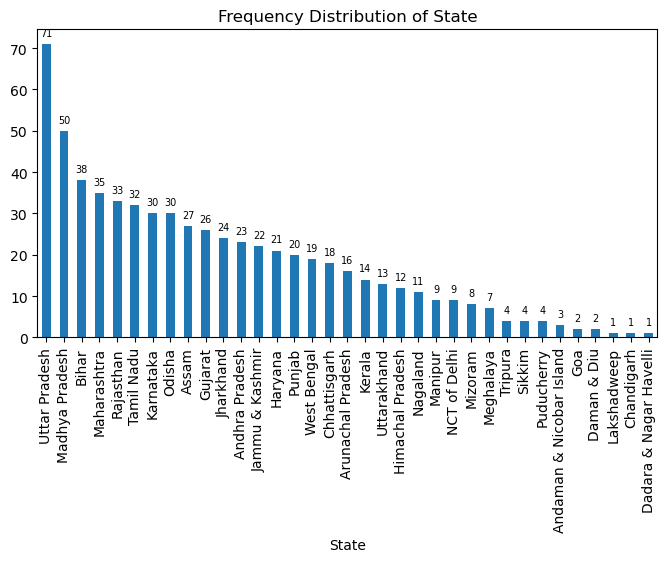

In [111]:
# analysis of state column
univariateAnalysis_category(eda_fh,'State')

#### Key Takeaways
1. In categorical columns we have done the univariate analysis for States column only, since for district column there are 640 districts and visualizing it will not be helpful as the plot would be very cluttered due to presence of large number of elements
2. Amongst the states Uttar Pradesh has most number of districts at 70 while Lakshadweep, Chandigarh and Dadar & Nagar Haveli have least number of districts at one each. 

### Bivariate Analysis
#### Relation between numeric variables

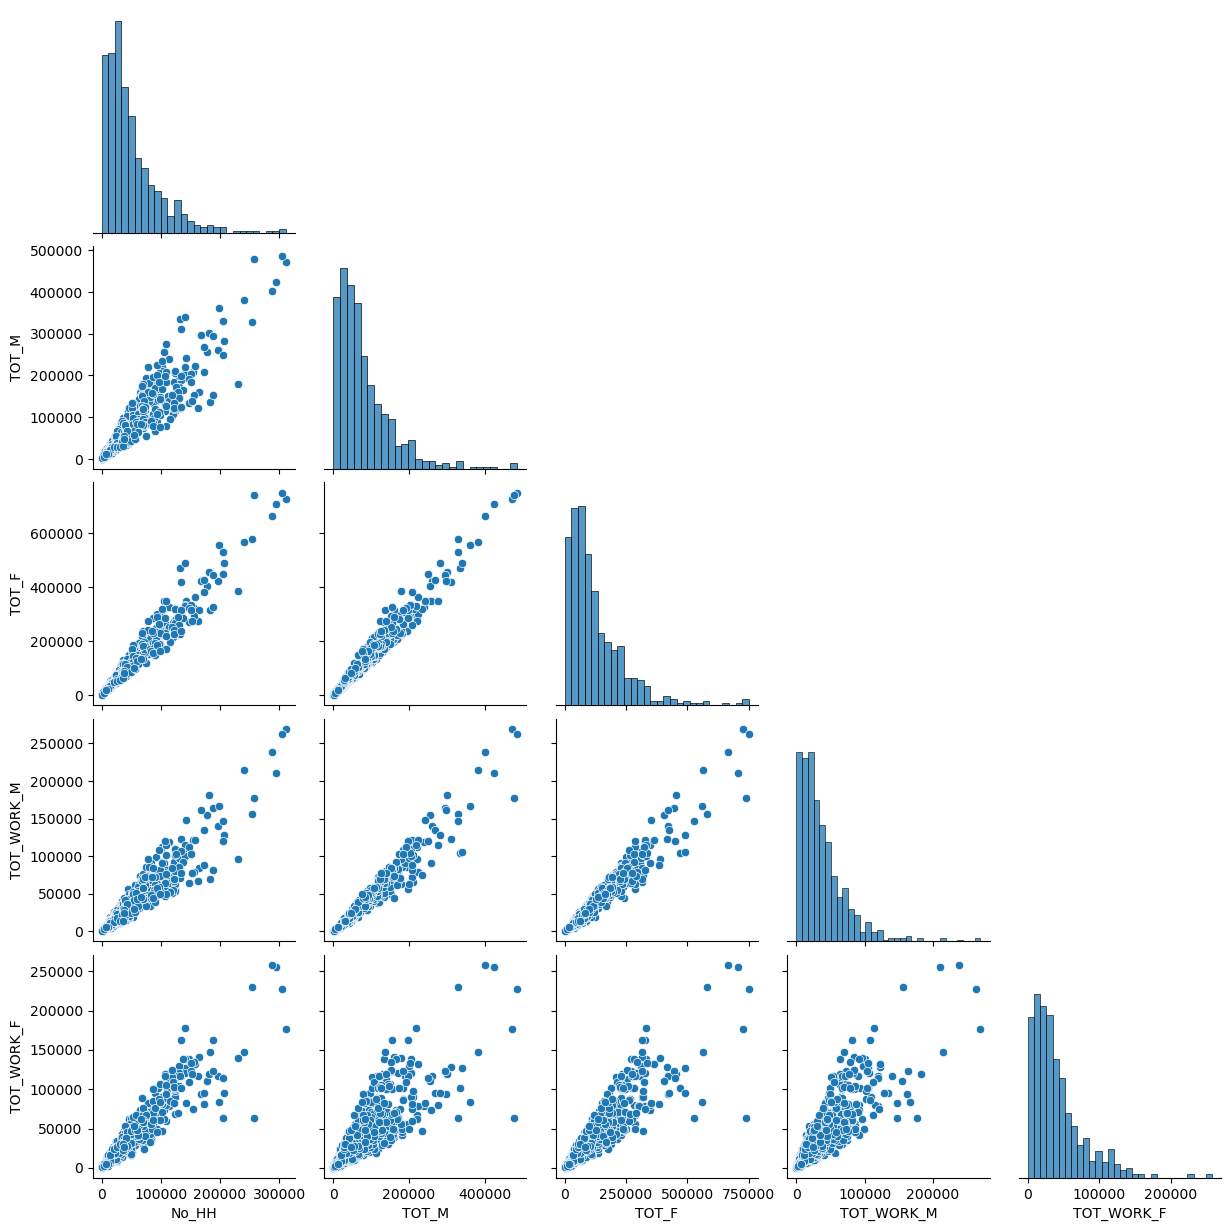

In [112]:
# pairplot
sns.pairplot(data = eda_fh, corner = True)
plt.show()

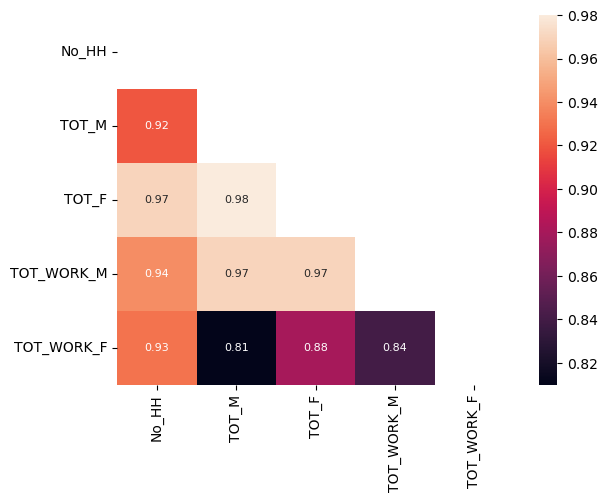

In [113]:
# Heatmap
mask = np.triu(np.ones_like(eda_fh.select_dtypes(include=['number']).corr(), dtype = 'bool'))
sns.heatmap(data = round(eda_fh.select_dtypes(include=['number']).corr(),2), 
            annot = True, annot_kws={"size": 8}, mask = mask)
plt.show()

#### Key Takeaways
1. There is strong positive correlation between the numeric variables.
2. Applying PCA to this dataset could be beneficial as we might see significant dimension reduction.

#### Relation between categorical and numeric variables

In [114]:
def num_cat_bivar(df, cat_col, numeric_columns):
    # Determine the number of rows and columns needed for subplots
    num_plots = len(numeric_columns)
    num_cols = min(3, num_plots)
    num_rows = math.ceil(num_plots / num_cols)

    # Create subplots
    plt.figure(figsize=(15, num_rows * 4))

    # Plot violin plots for each numeric column
    for i, num_col in enumerate(numeric_columns):
        if i < num_plots:  # Check if we haven't exceeded the number of numeric columns
            order = df.groupby(cat_col)[num_col].sum().sort_values(ascending= False)
            plt.subplot(num_rows, num_cols, i+1)
            sns.barplot(x=order.index, y=order, ci = False)
            plt.title(f'{num_col} vs {cat_col}')
            plt.xticks(rotation=90)  # Rotate x-axis tick labels

    # Adjust layout
    plt.tight_layout()
    plt.show()

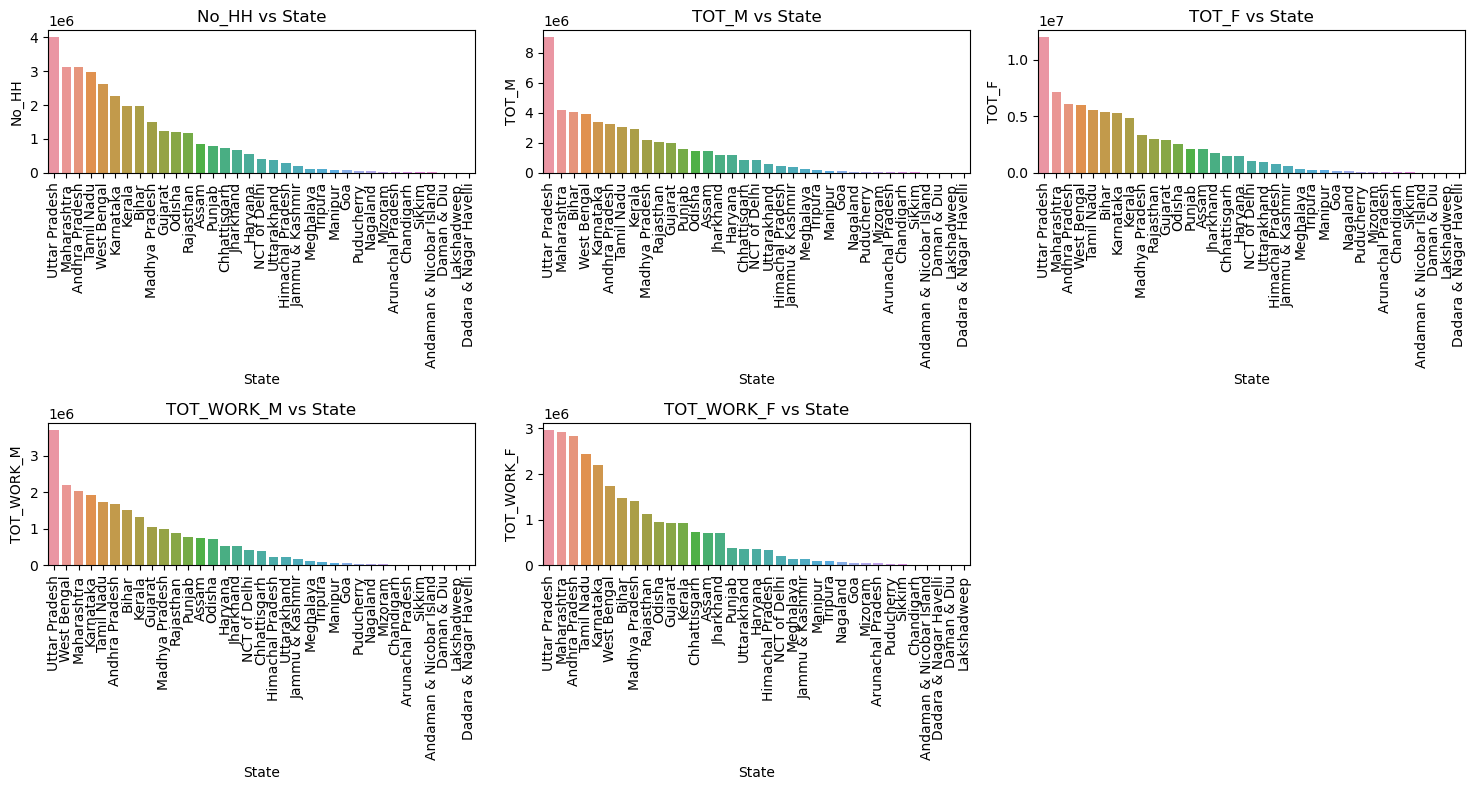

In [115]:
num_cat_bivar(eda_fh, 'State', numeric_columns)

In [116]:
for num_col in numeric_columns:
    print(f'top 3 areas with highest {num_col}')
    print("----------------------------------------------------------------------------")
    display(eda_fh.groupby(['State','Area Name'])[num_col].sum().sort_values(ascending= False).head(3))
    print(f'bottom 3 areas with lowest {num_col}')
    print("----------------------------------------------------------------------------")
    display(eda_fh.groupby(['State','Area Name'])[num_col].sum().sort_values(ascending= False).tail(3))
    print('\n')

top 3 areas with highest No_HH
----------------------------------------------------------------------------


State        Area Name                 
West Bengal  North Twenty Four Parganas    310450
Maharashtra  Mumbai Suburban               304502
             Thane                         294698
Name: No_HH, dtype: int64

bottom 3 areas with lowest No_HH
----------------------------------------------------------------------------


State              Area Name    
Arunachal Pradesh  Upper Siang      929
                   Anjaw            783
                   Dibang Valley    350
Name: No_HH, dtype: int64



top 3 areas with highest TOT_M
----------------------------------------------------------------------------


State        Area Name                 
Maharashtra  Mumbai Suburban               485417
Kerala       Malappuram                    477790
West Bengal  North Twenty Four Parganas    471482
Name: TOT_M, dtype: int64

bottom 3 areas with lowest TOT_M
----------------------------------------------------------------------------


State              Area Name    
Arunachal Pradesh  Upper Siang      1187
                   Anjaw             853
                   Dibang Valley     391
Name: TOT_M, dtype: int64



top 3 areas with highest TOT_F
----------------------------------------------------------------------------


State        Area Name                 
Maharashtra  Mumbai Suburban               750392
Kerala       Malappuram                    739441
West Bengal  North Twenty Four Parganas    725514
Name: TOT_F, dtype: int64

bottom 3 areas with lowest TOT_F
----------------------------------------------------------------------------


State              Area Name    
Arunachal Pradesh  Upper Siang      2117
                   Anjaw            1688
                   Dibang Valley     698
Name: TOT_F, dtype: int64



top 3 areas with highest TOT_WORK_M
----------------------------------------------------------------------------


State        Area Name                 
West Bengal  North Twenty Four Parganas    269422
Maharashtra  Mumbai Suburban               262638
Karnataka    Bangalore                     238323
Name: TOT_WORK_M, dtype: int64

bottom 3 areas with lowest TOT_WORK_M
----------------------------------------------------------------------------


State              Area Name    
Arunachal Pradesh  Upper Siang      460
                   Anjaw            257
                   Dibang Valley    100
Name: TOT_WORK_M, dtype: int64



top 3 areas with highest TOT_WORK_F
----------------------------------------------------------------------------


State        Area Name
Karnataka    Bangalore    257848
Maharashtra  Thane        255770
             Pune         230024
Name: TOT_WORK_F, dtype: int64

bottom 3 areas with lowest TOT_WORK_F
----------------------------------------------------------------------------


State                     Area Name    
Andaman & Nicobar Island  Nicobars         1031
Arunachal Pradesh         Anjaw            1002
                          Dibang Valley     357
Name: TOT_WORK_F, dtype: int64

#### Key Takeaways
1. Uttar Pradesh leads in all the metrics like number of households, Total Male and Female population as well as Total Worker Population Male and Female on other side Lakshadweep and Dadar & Nagar Haveli are at the bottom.
2. In district terms, North Twenty Four Parganas from West Bengal has highest number of holdhold while Dibang Valley from Arunachal Pradesh have least number of households.
3. Mumbai Suburban in Maharashtra has highest population for both Male and Female, Dibang Valley from Arunachal Pradesh has lowest population for both Male and Female.
4. North Twenty Four Parganas from West Bengal has highest Total Worker Population Male while Banglore, Karnataka has highest Total Worker Population Female. While here again Dibang Valley from Arunachal Pradesh has the lowest numbers.

#### Extracting Key Proportions

In [117]:
# creating a new data frame from eda_fh with only states based data
state_eda = eda_fh.drop('Area Name', axis = 1)
state_eda.head()

State  No_HH  TOT_M  TOT_F  TOT_WORK_M  TOT_WORK_F
0  Jammu & Kashmir   7707  23388  29796        6723        3752
1  Jammu & Kashmir   6218  19585  23102        6982        4200
2  Jammu & Kashmir   4452   6546  10964        2775        4800
3  Jammu & Kashmir   1320   2784   4206        1002        1118
4  Jammu & Kashmir  11654  20591  29981        5717        7692

In [118]:
# grouping data by states
state_eda = state_eda.groupby('State').sum()

In [119]:
state_eda = state_eda.reset_index()
state_eda.head()

State    No_HH    TOT_M    TOT_F  TOT_WORK_M  TOT_WORK_F
0  Andaman & Nicobar Island    13012    18726    28691        9767        8483
1            Andhra Pradesh  3127287  3274363  6097235     1674517     2833719
2         Arunachal Pradesh    35114    50582    88066       15841       41394
3                     Assam   853374  1437268  2093432      744397      705299
4                     Bihar  1974627  4025198  5405883     1524553     1464147

In [120]:
# creating new columns that has data in proportion terms
state_eda['mem_hh'] = round((state_eda['TOT_M']+state_eda['TOT_F'])/state_eda['No_HH'],2) # represents number of members per household
state_eda['sex_ratio'] = round(state_eda['TOT_F']/state_eda['TOT_M'],3) # represents number of female per male
state_eda['work_rat_M'] = round(state_eda['TOT_WORK_M']/state_eda['TOT_M'],3) # represents ratio of working male population in total male population
state_eda['work_rat_F'] = round(state_eda['TOT_WORK_F']/state_eda['TOT_F'],3) # represents ratio of working female population in total female population
state_eda['work_sex_ratio'] = round(state_eda['TOT_WORK_F']/state_eda['TOT_WORK_M'],3) # represents number of working female for every working male 

In [121]:
eda_ratio_cols = ['mem_hh', 'sex_ratio', 'work_rat_M', 'work_rat_F', 'work_sex_ratio']

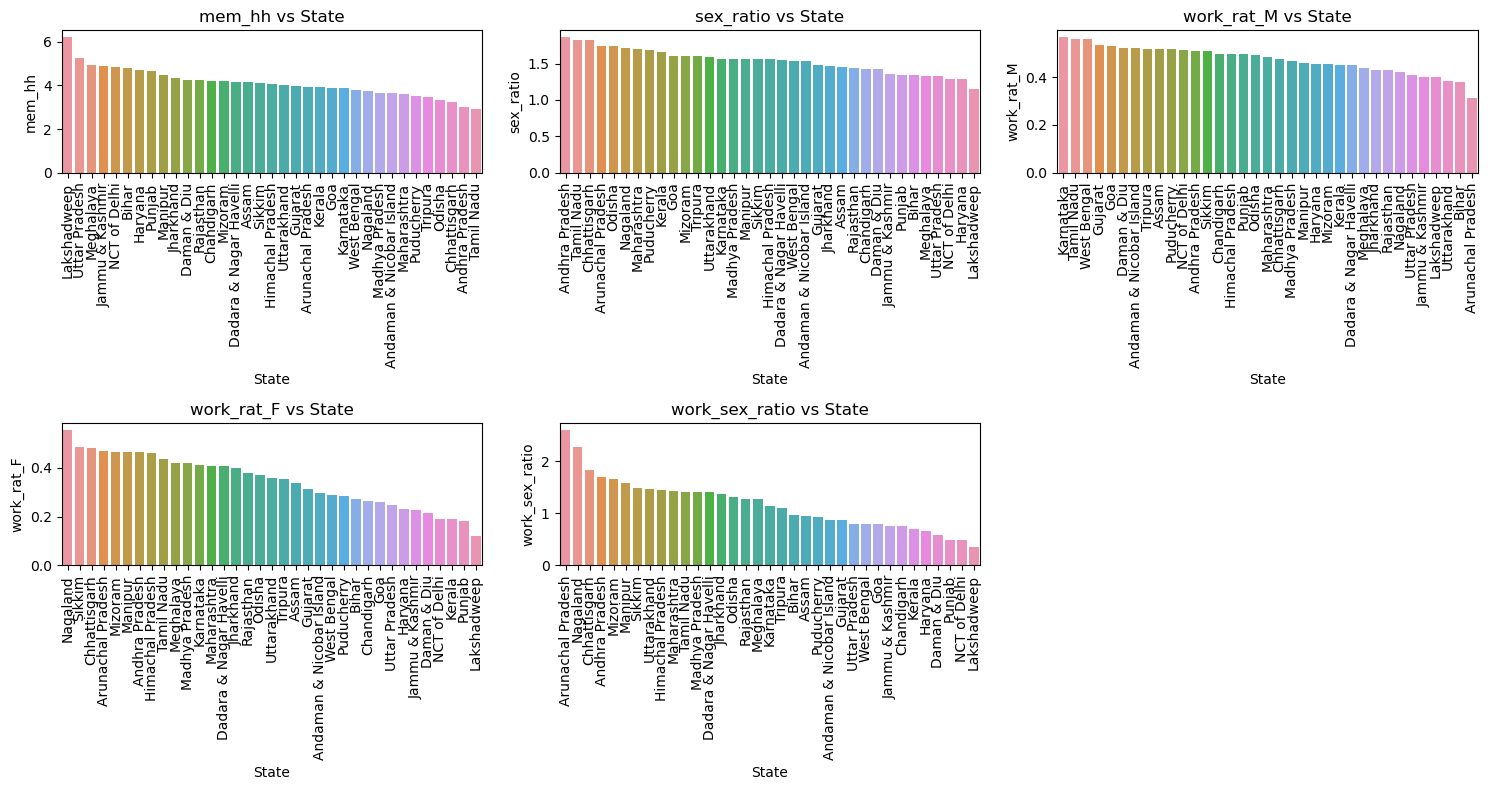

In [122]:
num_cat_bivar(state_eda,'State', eda_ratio_cols)

#### Key Takeaways
1. While in absolute terms for all features Uttar Pradesh had highest numbers and Lakshadweep and Dadar & Nagar Haveli had lowest number, as we dissect deeper we can find some interesting trends as other states take lead here.
2. Lakshadweep has highest number of people per household while state of Tamil Nadu has lowest number of people per household.
3. In sex ration Andra Pradesh has highest number of female per male at almost 2.5 female for every male, while Lakshadweep this value is lowest at almost 1.25 female for every male. Though from this we can conclude that for households with female head number of female is higher than male.
4. In Karnataka, approximately 60% of the male population is engaged in work, whereas in Arunachal Pradesh, this figure is at its lowest, standing at 35%. Conversely, Nagaland boasts the highest proportion of working females, accounting for nearly 60%, while Lakshadweep records the lowest, at around 15%. Additionally, the plot depicting the ratio of working males to the ratio of working females indicates that the percentage of working males compared to the total male population is higher than the percentage of working females compared to the total female population.
5. While for total population in all the states we found that there were atleast 1.25 female for every male in all the states but when we compared the sex ratio for working population there are many states working female are less than working male with ratio being as low as below 1:2 for states like Lakshadweep. 

In [123]:
# creating new columns that has data in proportion terms
eda_fh['mem_hh'] = round((eda_fh['TOT_M']+eda_fh['TOT_F'])/eda_fh['No_HH'],2) # represents number of members per household
eda_fh['sex_ratio'] = round(eda_fh['TOT_F']/eda_fh['TOT_M'],3) # represents number of female per male
eda_fh['work_rat_M'] = round(eda_fh['TOT_WORK_M']/eda_fh['TOT_M'],3) # represents ratio of working male population in total male population
eda_fh['work_rat_F'] = round(eda_fh['TOT_WORK_F']/eda_fh['TOT_F'],3) # represents ratio of working female population in total female population
eda_fh['work_sex_ratio'] = round(eda_fh['TOT_WORK_F']/eda_fh['TOT_WORK_M'],3) # represents number of working female for every working male 

In [124]:
for num_col in eda_ratio_cols:
    print(f'top 3 areas with highest {num_col}')
    print("----------------------------------------------------------------------------")
    display(eda_fh.groupby(['State','Area Name'])[num_col].sum().sort_values(ascending= False).head(3))
    print(f'bottom 3 areas with lowest {num_col}')
    print("----------------------------------------------------------------------------")
    display(eda_fh.groupby(['State','Area Name'])[num_col].sum().sort_values(ascending= False).tail(3))
    print('\n')

top 3 areas with highest mem_hh
----------------------------------------------------------------------------


State            Area Name
Jammu & Kashmir  Kupwara      6.90
                 Badgam       6.87
                 Anantnag     6.54
Name: mem_hh, dtype: float64

bottom 3 areas with lowest mem_hh
----------------------------------------------------------------------------


State       Area Name   
Tamil Nadu  Virudhunagar    2.38
            Namakkal        2.35
            Erode           2.30
Name: mem_hh, dtype: float64



top 3 areas with highest sex_ratio
----------------------------------------------------------------------------


State           Area Name   
Andhra Pradesh  Krishna         2.283
Odisha          Koraput         2.269
Tamil Nadu      Virudhunagar    2.225
Name: sex_ratio, dtype: float64

bottom 3 areas with lowest sex_ratio
----------------------------------------------------------------------------


State            Area Name     
Jammu & Kashmir  Badgam            1.180
Uttar Pradesh    Mahamaya Nagar    1.180
Lakshadweep      Lakshadweep       1.152
Name: sex_ratio, dtype: float64



top 3 areas with highest work_rat_M
----------------------------------------------------------------------------


State       Area Name
Tamil Nadu  Tiruppur     0.648
            Erode        0.631
Nagaland    Peren        0.628
Name: work_rat_M, dtype: float64

bottom 3 areas with lowest work_rat_M
----------------------------------------------------------------------------


State              Area Name      
Nagaland           Kiphire            0.243
Arunachal Pradesh  Kurung Kumey       0.240
                   Upper Subansiri    0.233
Name: work_rat_M, dtype: float64



top 3 areas with highest work_rat_F
----------------------------------------------------------------------------


State     Area Name
Nagaland  Peren        0.760
          Longleng     0.707
          Zunheboto    0.677
Name: work_rat_F, dtype: float64

bottom 3 areas with lowest work_rat_F
----------------------------------------------------------------------------


State            Area Name 
Puducherry       Mahe          0.113
Jammu & Kashmir  Samba         0.106
Kerala           Malappuram    0.085
Name: work_rat_F, dtype: float64



top 3 areas with highest work_sex_ratio
----------------------------------------------------------------------------


State              Area Name    
Arunachal Pradesh  Anjaw            3.899
Nagaland           Kiphire          3.772
Arunachal Pradesh  Dibang Valley    3.570
Name: work_sex_ratio, dtype: float64

bottom 3 areas with lowest work_sex_ratio
----------------------------------------------------------------------------


State         Area Name  
Puducherry    Mahe           0.349
Lakshadweep   Lakshadweep    0.348
NCT of Delhi  North East     0.341
Name: work_sex_ratio, dtype: float64

#### Key Takeaways
1. Kupwara district of Jammu and Kashmir at 6.9 has most members per household while Virudhunagar district of Tamil Nadu at 2.38 has least member per household.
2. Krishna district in Andhra Pradesh has the highest female sex ratio at 2.283 female for every male, Lakshadweep in Lakshadweep has lowest female sex ratio at 1.152 female for every male.
3. In Tiruppur, Tamil Nadu 64.8 male work for every 100 male which is highest in India, while the lowest is Upper Subansiri, Arunachal Pradesh where 23.3 male work for every 100 male.
4. In Peren, Nagaland 76 female work in every 100 female which is highest in India, while in Malapurram, Kerala only 8.5 female work in every 100 female.
5. Amongst the working population, Anjaw, Arunachal Pradesh has highest sex ratio that is for every working male here 3.899 female work while this ratio is lowest for North East of NCT of Delhi where for every working male there is only 0.341 female working.

## Data Scaling 
Before scaling we will create a dataframe with only numeric values since PCA technique is applied only to numeric variables.

For scaling we will use Z score scaling since data in features are of different scale and Z score method will help reduce this difference bring data on almost similar scales where mean for all the features is almost 0 and standard deviation is 1, ensuring that all features contribute equally to PCA.

Also, since PCA model gives more weightage to bigger values so if we do not treat the data then due to difference in scales features with larger values will have more weightage making the outcome biased, scaling reduces this variability between features resulting in equal weightage to all features.


In [125]:
numeric_fh_data = fh_census_data.select_dtypes(include= 'number')

In [126]:
numeric_fh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   No_HH           640 non-null    int64
 1   TOT_M           640 non-null    int64
 2   TOT_F           640 non-null    int64
 3   M_06            640 non-null    int64
 4   F_06            640 non-null    int64
 5   M_SC            640 non-null    int64
 6   F_SC            640 non-null    int64
 7   M_ST            640 non-null    int64
 8   F_ST            640 non-null    int64
 9   M_LIT           640 non-null    int64
 10  F_LIT           640 non-null    int64
 11  M_ILL           640 non-null    int64
 12  F_ILL           640 non-null    int64
 13  TOT_WORK_M      640 non-null    int64
 14  TOT_WORK_F      640 non-null    int64
 15  MAINWORK_M      640 non-null    int64
 16  MAINWORK_F      640 non-null    int64
 17  MAIN_CL_M       640 non-null    int64
 18  MAIN_CL_F       640 non-null  

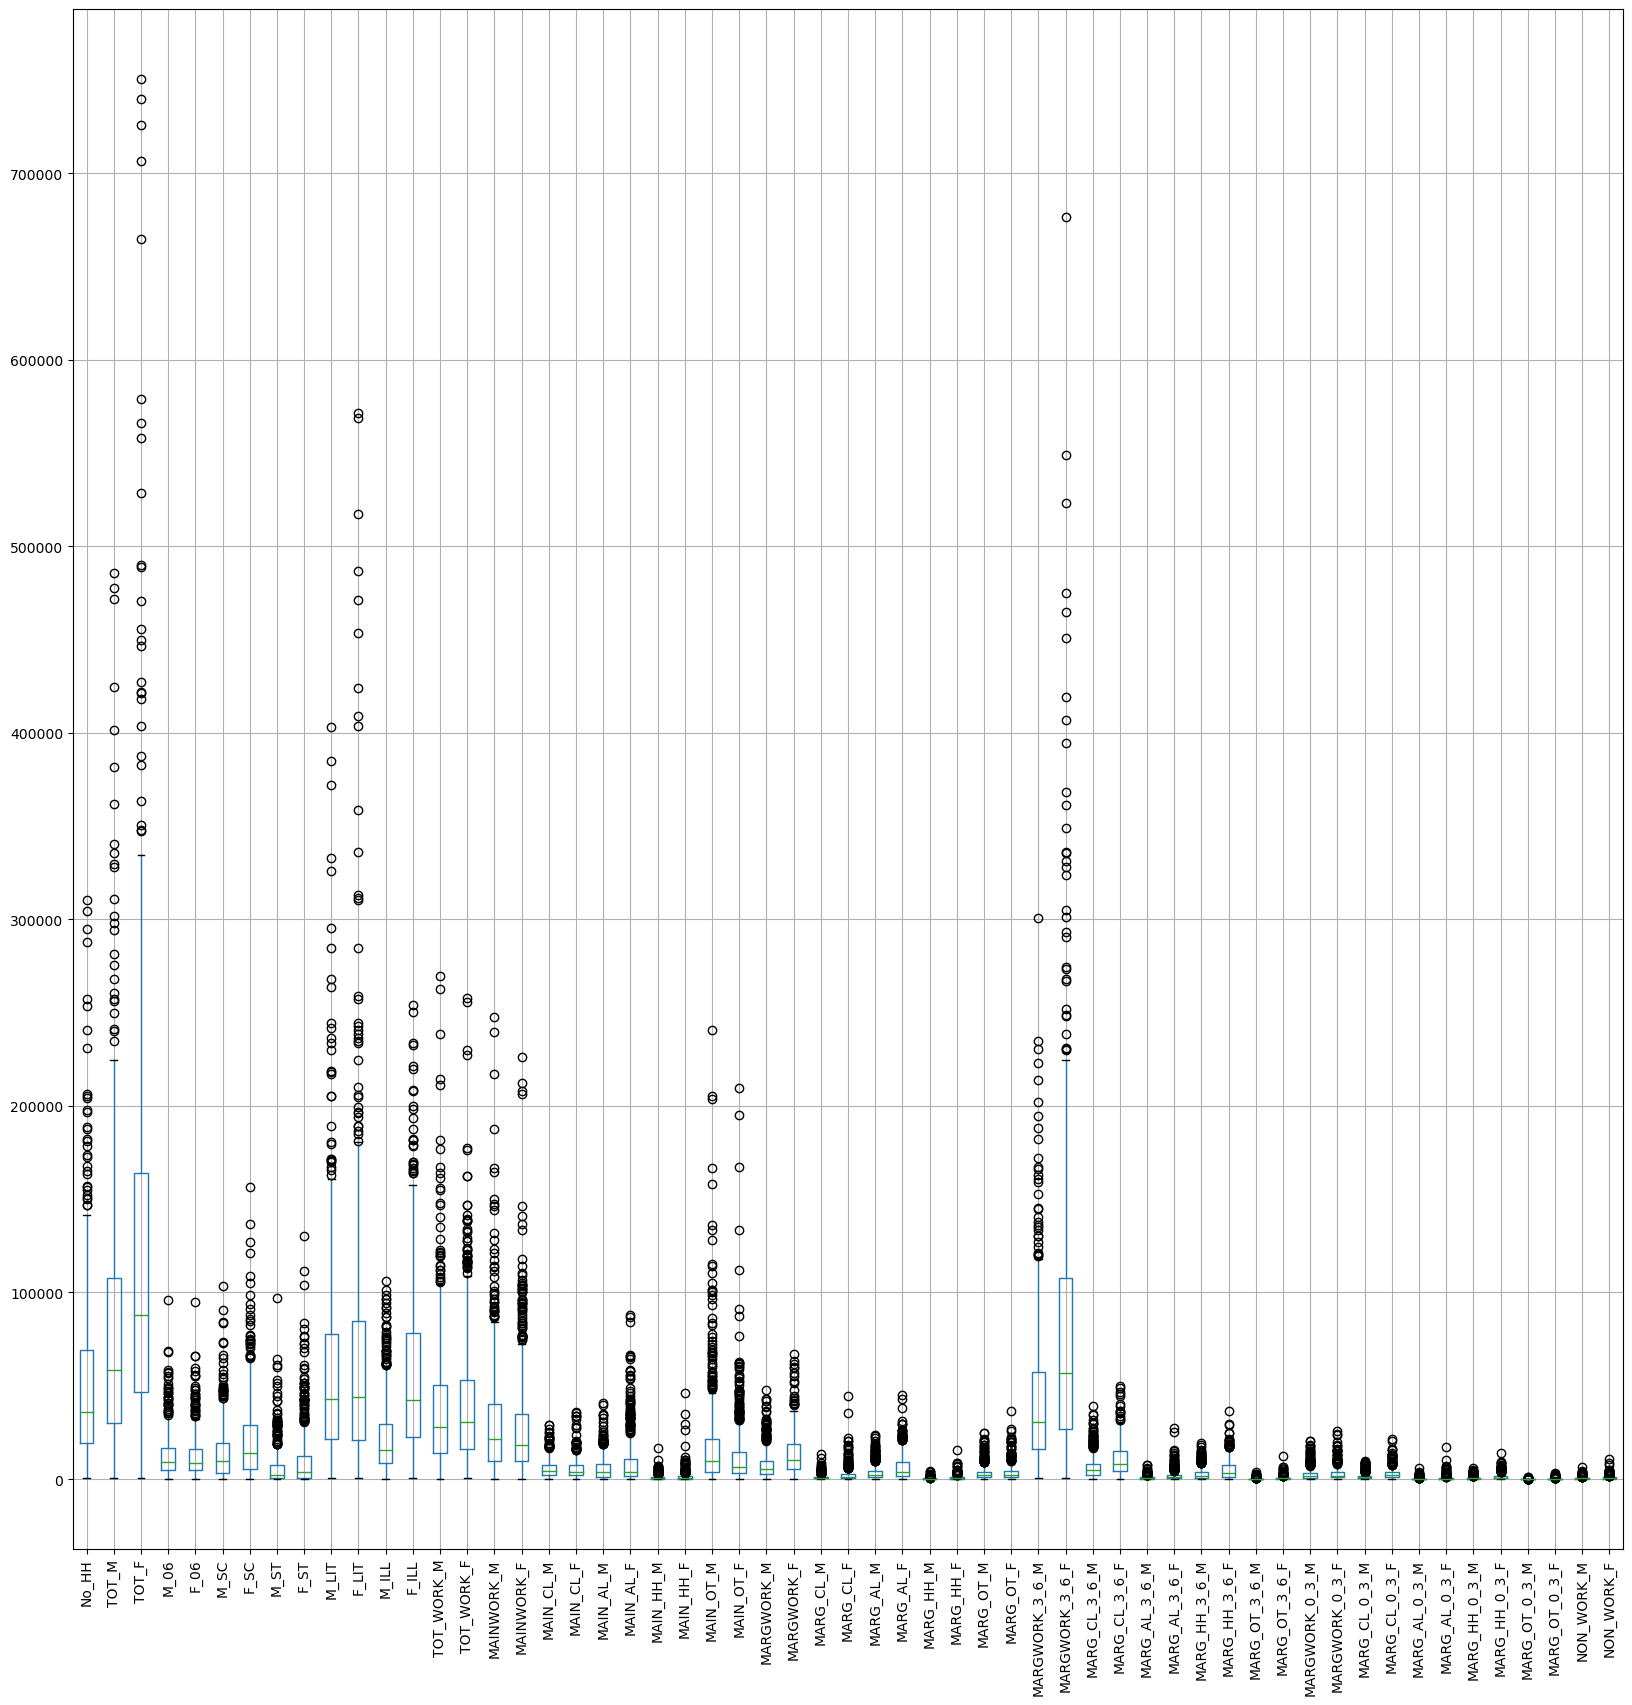

In [127]:
numeric_fh_data.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In unscaled data the range for different variables is different where TOT_F column has the highest range and this mismatch in range could make the model biased and adversely affect the PC's, to minimize this effect we will use Z scaling.


In [128]:
scaler = StandardScaler().fit(numeric_fh_data)
scaled_data = scaler.transform(numeric_fh_data)
scaled_fh_data = pd.DataFrame(scaled_data, columns= numeric_fh_data.columns)

In [129]:
scaled_fh_data.head()

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0 -0.904738 -0.771236 -0.815563 -0.561012 -0.507738 -0.958575 -0.957049   
1 -0.935695 -0.823100 -0.874534 -0.681096 -0.725367 -0.958297 -0.956772   
2 -0.972412 -1.000919 -0.981466 -0.976956 -0.965262 -0.958575 -0.956772   
3 -1.037530 -1.052224 -1.041001 -1.022118 -0.995393 -0.958783 -0.957049   
4 -0.822676 -0.809381 -0.813933 -0.622359 -0.649908 -0.957395 -0.955529   

       M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0 -0.423306 -0.476423 -0.798097  ...      -0.163229      -0.720610   
1 -0.582014 -0.607607 -0.849434  ...      -0.583103      -0.732811   
2 -0.038951 -0.027273 -0.956457  ...      -0.859212      -0.921931   
3 -0.355965 -0.390060 -1.004643  ...      -0.805468      -0.900758   
4  0.149238  0.043330 -0.800568  ...      -0.348645      -0.297513   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0      -0.156494      -0.287524       0.156577      -0.657412      -0.365258   
1      -0.282327      -0.294688      -0.491731      -0.723062       0.042855   
2      -0.456727      -0.420050      -0.731894      -0.795026      -0.662068   
3      -0.419198      -0.385127      -0.718770      -0.784926      -0.624966   
4       0.472670       0.434200      -0.466796      -0.625849      -0.439461   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0      -0.499977   -0.413053   -0.539614  
1      -0.073481   -0.606455   -0.598988  
2      -0.635680   -0.726103   -0.707839  
3      -0.616294   -0.645791   -0.710038  
4      -0.309346   -0.540895   -0.249344  

[5 rows x 57 columns]

In [130]:
scaled_fh_data.describe().T

count          mean       std       min       25%       50%  \
No_HH           640.0  4.440892e-17  1.000782 -1.057697 -0.659882 -0.319887   
TOT_M           640.0 -8.881784e-17  1.000782 -1.084858 -0.677956 -0.294592   
TOT_F           640.0 -4.440892e-17  1.000782 -1.071906 -0.668250 -0.305233   
M_06            640.0 -5.551115e-17  1.000782 -1.066236 -0.659189 -0.274114   
F_06            640.0  6.661338e-17  1.000782 -1.050264 -0.642376 -0.289756   
M_SC            640.0  5.551115e-18  1.000782 -0.958783 -0.718323 -0.293404   
F_SC            640.0 -5.551115e-17  1.000782 -0.957049 -0.698964 -0.325615   
M_ST            640.0 -4.440892e-17  1.000782 -0.625124 -0.595467 -0.389534   
F_ST            640.0 -2.220446e-17  1.000782 -0.640197 -0.613122 -0.398476   
M_LIT           640.0 -4.440892e-17  1.000782 -1.032495 -0.656385 -0.273410   
F_LIT           640.0  0.000000e+00  1.000782 -0.880091 -0.605869 -0.300924   
M_ILL           640.0  3.885781e-17  1.000782 -1.103860 -0.675544 -0.313229   
F_ILL           640.0 -4.440892e-17  1.000782 -1.182788 -0.714648 -0.289434   
TOT_WORK_M      640.0 -4.440892e-17  1.000782 -1.041256 -0.666067 -0.276329   
TOT_WORK_F      640.0 -8.881784e-17  1.000782 -1.101591 -0.678035 -0.288114   
MAINWORK_M      640.0 -2.220446e-17  1.000782 -0.958137 -0.649073 -0.284647   
MAINWORK_F      640.0  4.440892e-17  1.000782 -0.932745 -0.623743 -0.324100   
MAIN_CL_M       640.0 -8.881784e-17  1.000782 -1.145474 -0.718165 -0.266889   
MAIN_CL_F       640.0 -1.110223e-17  1.000782 -1.030785 -0.669985 -0.296408   
MAIN_AL_M       640.0  0.000000e+00  1.000782 -0.914709 -0.747338 -0.299102   
MAIN_AL_F       640.0  4.440892e-17  1.000782 -0.694401 -0.584807 -0.388393   
MAIN_HH_M       640.0  1.665335e-17  1.000782 -0.691816 -0.545061 -0.301644   
MAIN_HH_F       640.0  0.000000e+00  1.000782 -0.434625 -0.356326 -0.264492   
MAIN_OT_M       640.0  0.000000e+00  1.000782 -0.691455 -0.539371 -0.324365   
MAIN_OT_F       640.0 -4.440892e-17  1.000782 -0.646347 -0.488651 -0.317847   
MARGWORK_M      640.0 -1.665335e-17  1.000782 -1.046990 -0.655025 -0.291825   
MARGWORK_F      640.0  2.220446e-17  1.000782 -1.181294 -0.698262 -0.265922   
MARG_CL_M       640.0  0.000000e+00  1.000782 -0.794140 -0.556257 -0.331347   
MARG_CL_F       640.0 -5.551115e-17  1.000782 -0.647891 -0.470946 -0.303687   
MARG_AL_M       640.0  1.110223e-17  1.000782 -0.874484 -0.643314 -0.328780   
MARG_AL_F       640.0  2.220446e-17  1.000782 -0.954894 -0.747687 -0.360900   
MARG_HH_M       640.0 -5.551115e-18  1.000782 -0.685144 -0.529942 -0.326070   
MARG_HH_F       640.0  1.110223e-17  1.000782 -0.656736 -0.513346 -0.298574   
MARG_OT_M       640.0  1.110223e-17  1.000782 -0.864853 -0.607407 -0.302269   
MARG_OT_F       640.0 -4.440892e-17  1.000782 -0.856115 -0.600094 -0.289356   
MARGWORK_3_6_M  640.0  7.216450e-17  1.000782 -1.067727 -0.659748 -0.298173   
MARGWORK_3_6_F  640.0 -2.220446e-17  1.000782 -0.973823 -0.656854 -0.292903   
MARG_CL_3_6_M   640.0 -2.220446e-17  1.000782 -1.058667 -0.668815 -0.293426   
MARG_CL_3_6_F   640.0 -8.881784e-17  1.000782 -1.212036 -0.707773 -0.241685   
MARG_AL_3_6_M   640.0 -4.440892e-17  1.000782 -0.872827 -0.612586 -0.341847   
MARG_AL_3_6_F   640.0  4.440892e-17  1.000782 -0.701351 -0.502020 -0.306297   
MARG_HH_3_6_M   640.0 -7.216450e-17  1.000782 -0.897436 -0.662335 -0.336627   
MARG_HH_3_6_F   640.0 -6.661338e-17  1.000782 -0.969686 -0.760784 -0.351845   
MARG_OT_3_6_M   640.0 -5.551115e-18  1.000782 -0.684513 -0.522705 -0.323234   
MARG_OT_3_6_F   640.0  3.330669e-17  1.000782 -0.651473 -0.509422 -0.295094   
MARGWORK_0_3_M  640.0  0.000000e+00  1.000782 -0.859800 -0.613309 -0.307996   
MARGWORK_0_3_F  640.0  0.000000e+00  1.000782 -0.848224 -0.601775 -0.300744   
MARG_CL_0_3_M   640.0 -2.775558e-17  1.000782 -0.933110 -0.606952 -0.298260   
MARG_CL_0_3_F   640.0 -5.551115e-17  1.000782 -0.978631 -0.645877 -0.297513   
MARG_AL_0_3_M   640.0  2.220446e-17  1.000782 -0.553861 -0.450104 

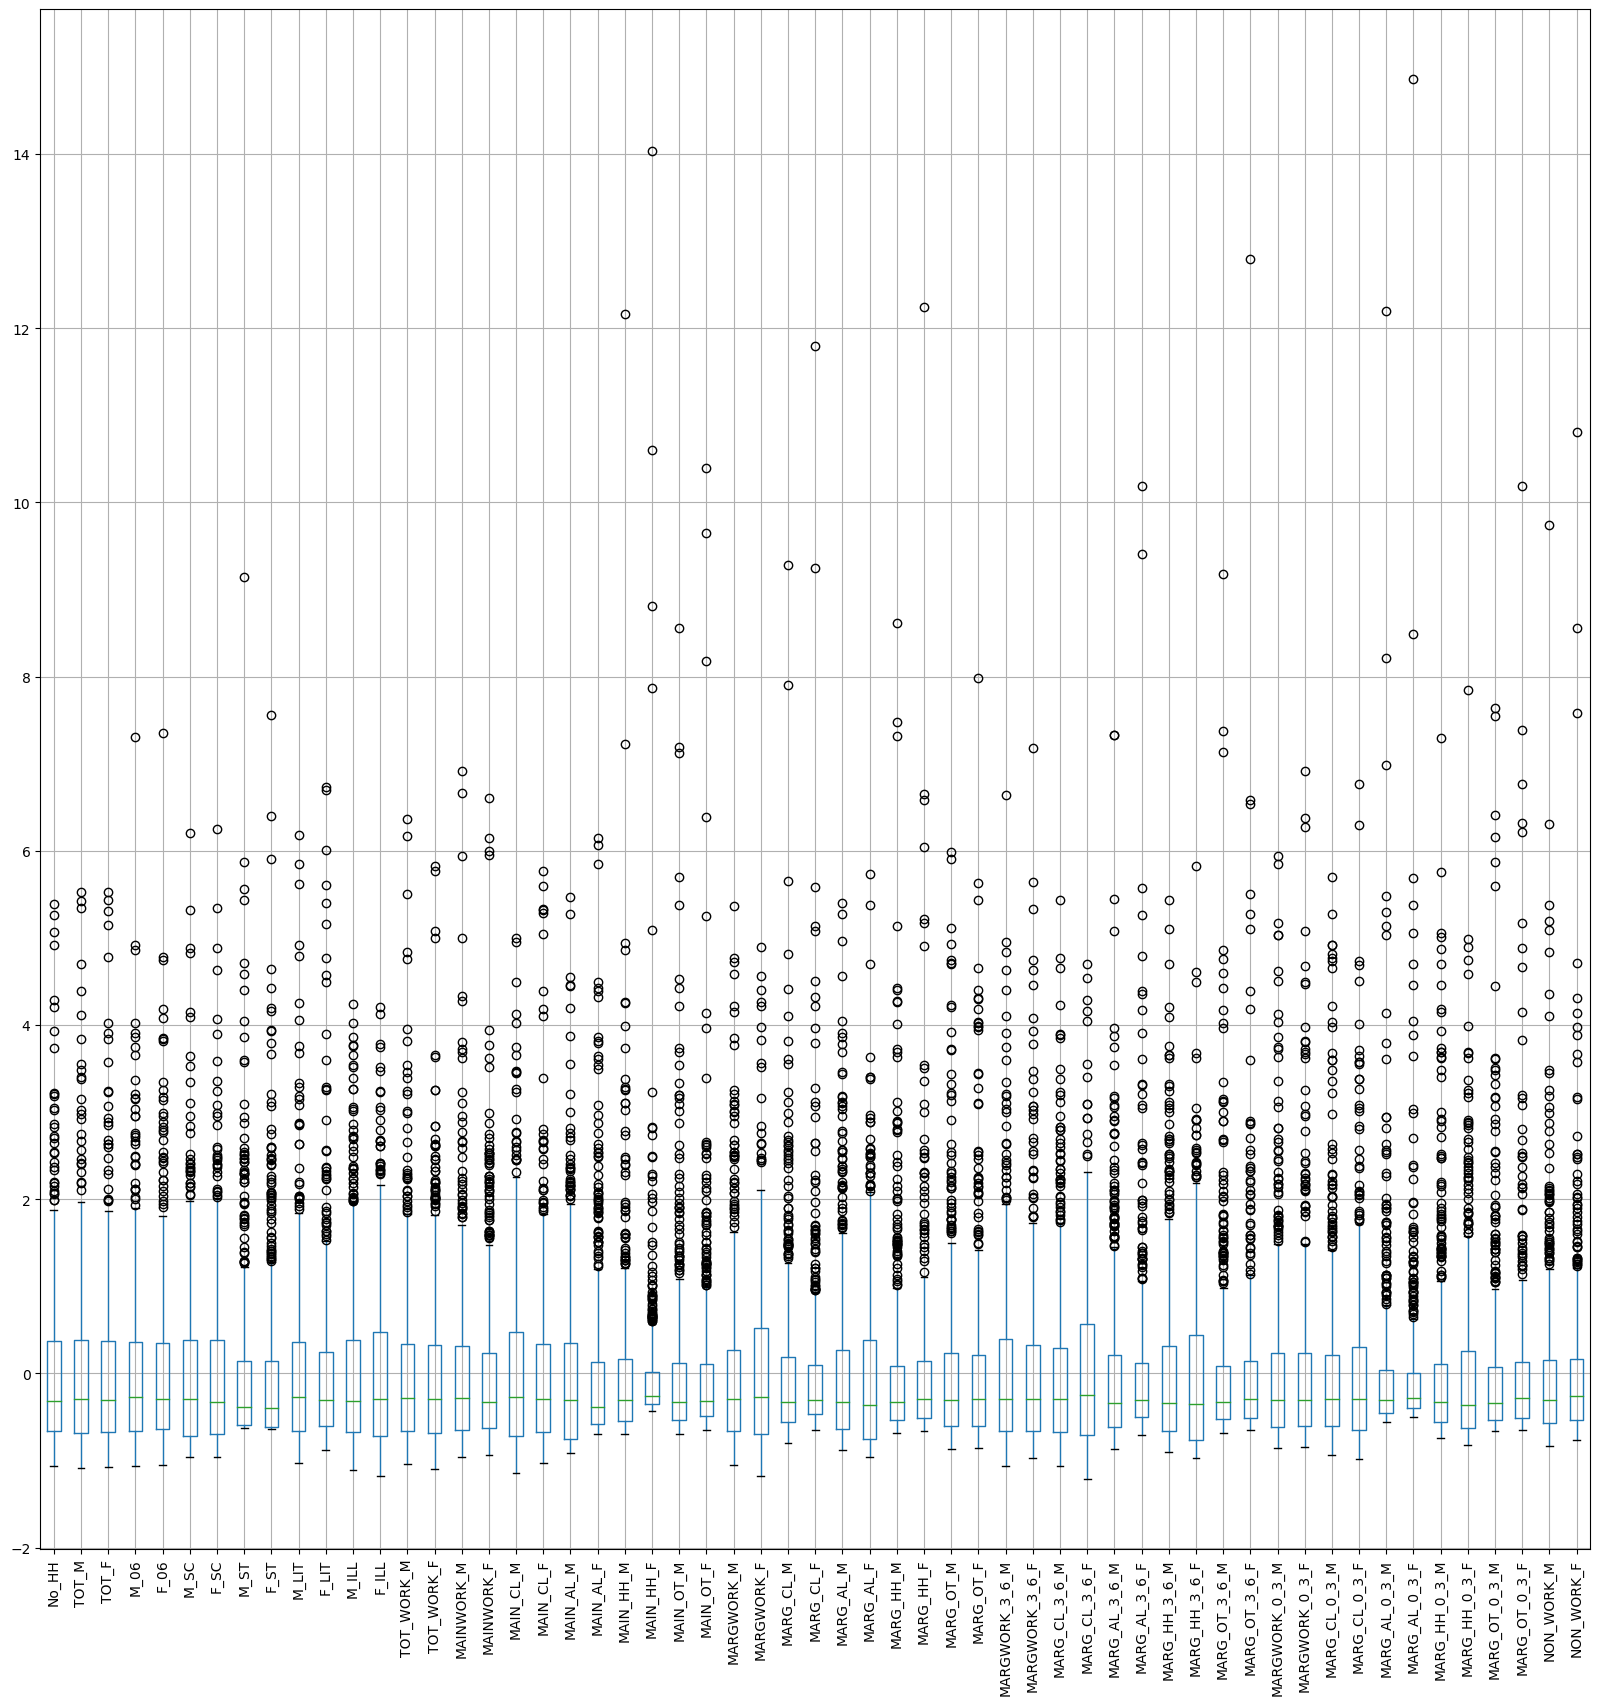

In [131]:
scaled_fh_data.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

Since Z scaling brings data in different ranges to same range almost 99.7% data lies within -3 and +3, this significantly reduces the data range.
## PCA
The main objective of this analysis is to reduce the dimensions of the dataset using PCA, however, for PCA to be effective data has fulfill conditions.
1. There should be significant correlation between different pair of variables
2. Sample size available should be adequate.

### Correlation significance test
We will do Bartlett Sphericity Test to confirm that there is significant correlation between the features.
#### Hypothesis
* Null Hypothesis (H0):
All variables in data are uncorrelated.
* Alternate Hypothesis (Ha):
Atleast one pair of variables are significantly correlated. 

If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is smaller than level of significance, then we can reject the null hypothesis and agree that there is atleast one pair of variables in the data which are correlated hence PCA is recommended.

* Level of significance (alpha): 0.05

In [132]:
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_fh_data)
print(f'p-value of test is {p_value}')

p-value of test is 0.0


Since p-value of 0.0 is significantly lower than the level of significance of 0.05, hence, with 95% confidence we can reject the null hypothesis (H0) that all variables in the data are uncorrelated and can continue with the PCA.

### Adequecy of sample size
To check that we have adequate samples to carry out PCA we will do KMO test which will provide us measure of sampling adequacy (MSA) which is used to examine how appropriate PCA is.

If MSA is less than 0.5, PCA is not recommended, since no significant reduction in dimensions is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [133]:
kmo_all, kmo_model = calculate_kmo(scaled_fh_data)
print(f'Measure of sampling adequacy is {round(kmo_model,3)}')

Measure of sampling adequacy is 0.804


Since MSA value of 0.804 is greater than 0.7, hence, we can continue with PCA.

### Applying PCA

In [134]:
pca = PCA(n_components=57, random_state= 43)
pca_transform = pca.fit_transform(scaled_fh_data)

In [135]:
pca_transform.transpose().round(2)

array([[-4.62, -4.77, -5.96, ..., -6.29, -6.22, -5.9 ],
       [ 0.14, -0.11, -0.29, ..., -0.64, -0.67, -0.94],
       [ 0.33,  0.24,  0.37, ...,  0.11,  0.27,  0.35],
       ...,
       [-0.  ,  0.  ,  0.  , ...,  0.  , -0.  , -0.  ],
       [ 0.  ,  0.  , -0.  , ...,  0.  , -0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ..., -0.  ,  0.  , -0.  ]])

In [136]:
# Obtaining the Eigen Vectors when the Principal Components are kept exactly as the number of features in the scaled data
print('Eigen Vectors \n ',pca.components_.round(2))

Eigen Vectors 
  [[ 0.16  0.17  0.17 ...  0.13  0.15  0.13]
 [-0.13 -0.09 -0.1  ...  0.05 -0.07 -0.07]
 [-0.    0.06  0.04 ... -0.08  0.11  0.1 ]
 ...
 [ 0.    0.21  0.25 ... -0.07  0.   -0.07]
 [ 0.    0.29 -0.21 ...  0.04 -0.03  0.01]
 [-0.    0.19  0.03 ... -0.03 -0.14 -0.02]]


In [137]:
eig_values = pca.explained_variance_

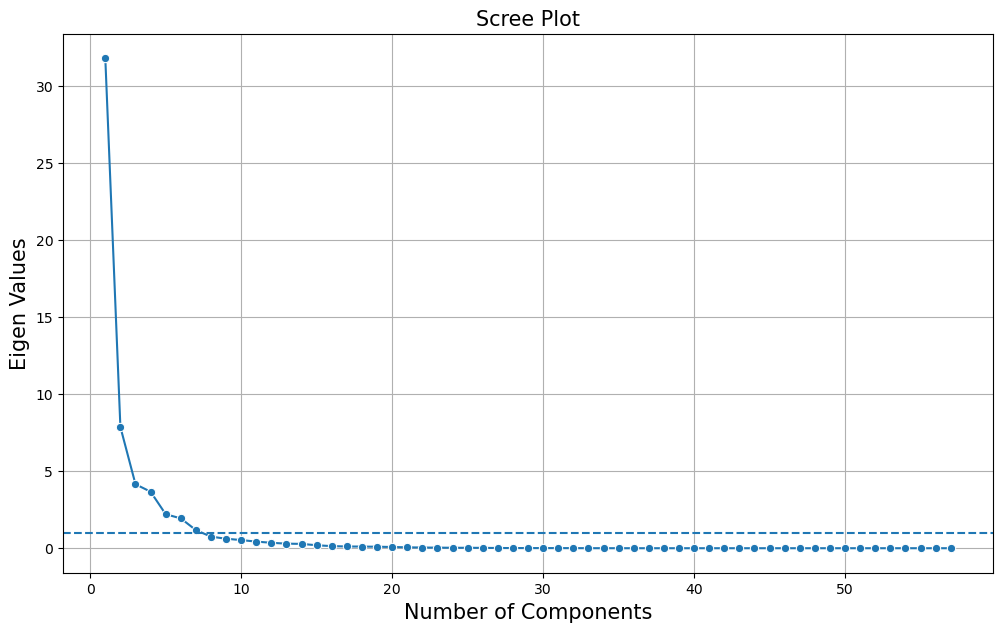

In [138]:
# scree plot for eigen values
plt.figure(figsize=(12,7))
sns.lineplot(y=eig_values, x=range(1,len(eig_values)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Eigen Values',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.axhline(y = 1, linestyle = "--")
plt.grid()
plt.show()

As per the scree plot based on eigen values the optimum number of PC's is taken as number of PC's whose value is greater than one, in the above plot eigen value one is marked with dotted line and there are 7 PC's who have their eigen value of greater than 1. However, for this PCA we have to ensure that PC's explain atleast 90% of the variance and to check how many PC's togeather explain 90% variance we will have to look at cumulative variance.

In [139]:
# % variance explained by each PC
var_expl = pca.explained_variance_ratio_

In [140]:
# cumulative variance for PC's
cum_var = np.cumsum(var_expl)

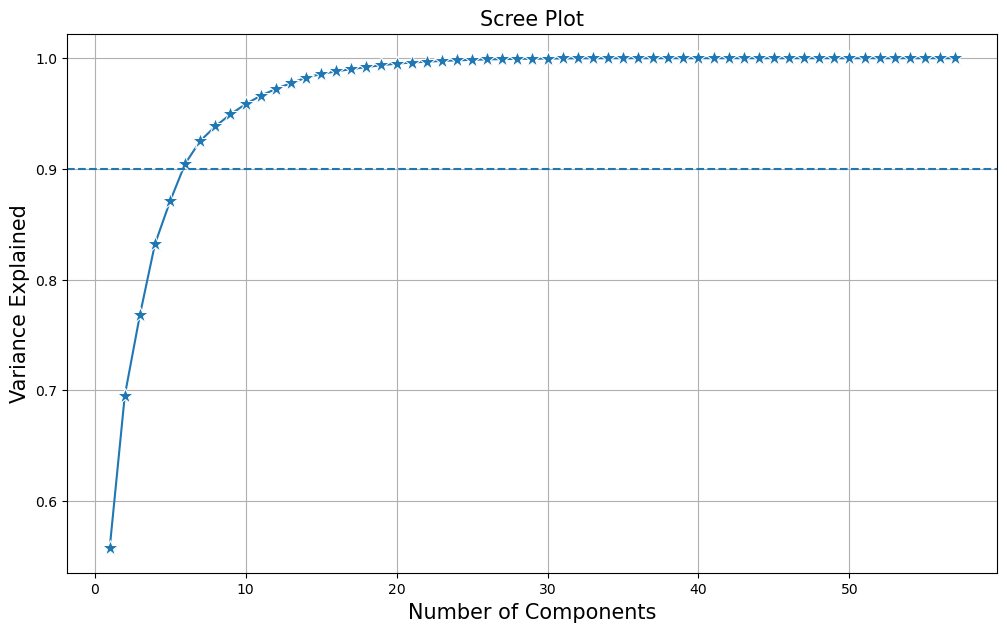

In [141]:
# scree plot for cumulative variance
plt.figure(figsize=(12,7))
sns.lineplot(y=cum_var, x=range(1,len(cum_var)+1),marker='*', markersize = 12)
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.axhline(y = 0.9, linestyle = "--")
plt.grid()
plt.show()

As per the scree plot above for cumulative variance, 6 PC's togeather can explain more than 90% variance where 90% mark is depicted by horizontal dashed line in the plot, so for this PCA we will take 6 as the optimum number of PC's.

In [142]:
# cumulative variance for first 6 PC's 
print('Cumulative variance for first six PCs ')
cum_var[0:6]

Cumulative variance for first six PCs 


array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 ])

In [143]:
# PCA for the number of decided components to get the loadings and component output
pca = PCA(n_components=6, random_state= 43)
pca_transform = pca.fit_transform(scaled_fh_data)
pca_transform.transpose().round(2)

array([[-4.62, -4.77, -5.96, ..., -6.29, -6.22, -5.9 ],
       [ 0.14, -0.11, -0.29, ..., -0.64, -0.67, -0.94],
       [ 0.33,  0.24,  0.37, ...,  0.11,  0.27,  0.35],
       [ 1.54,  1.96,  0.62, ...,  1.37,  1.14,  1.11],
       [ 0.35, -0.15,  0.48, ...,  0.15,  0.06,  0.15],
       [-0.42,  0.42,  0.28, ...,  0.14, -0.12, -0.15]])

In [144]:
pca_transform.shape

(640, 6)

In [145]:
# converting pca_transform to dataframe
pc_list = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
census_pca = pd.DataFrame(pca_transform.round(2), columns = pc_list)

In [146]:
# Loading of each feature on the components
pca.components_.round(2)

array([[ 0.16,  0.17,  0.17,  0.16,  0.16,  0.15,  0.15,  0.03,  0.03,
         0.16,  0.15,  0.16,  0.17,  0.16,  0.15,  0.15,  0.12,  0.1 ,
         0.07,  0.11,  0.07,  0.13,  0.08,  0.12,  0.11,  0.16,  0.16,
         0.08,  0.05,  0.13,  0.11,  0.14,  0.13,  0.16,  0.15,  0.16,
         0.16,  0.17,  0.16,  0.09,  0.05,  0.13,  0.11,  0.14,  0.12,
         0.15,  0.15,  0.15,  0.14,  0.05,  0.04,  0.12,  0.12,  0.14,
         0.13,  0.15,  0.13],
       [-0.13, -0.09, -0.1 , -0.02, -0.02, -0.05, -0.05,  0.03,  0.03,
        -0.12, -0.15, -0.01, -0.01, -0.13, -0.09, -0.18, -0.15,  0.06,
         0.09, -0.03, -0.06, -0.08, -0.08, -0.21, -0.21,  0.09,  0.13,
         0.27,  0.25,  0.17,  0.14,  0.07,  0.02, -0.09, -0.12, -0.04,
        -0.11,  0.08,  0.1 ,  0.26,  0.24,  0.16,  0.13,  0.06,  0.01,
        -0.09, -0.13,  0.15,  0.18,  0.25,  0.24,  0.19,  0.18,  0.08,
         0.05, -0.07, -0.07],
       [-0.  ,  0.06,  0.04,  0.06,  0.05,  0.  , -0.03, -0.12, -0.14,
         0.08,  0

In [147]:
# component loading for 6 Pcs
pca_fh_extracted = pd.DataFrame(pca.components_.T, columns= pc_list, index = scaled_fh_data.columns)
pca_fh_extracted.round(2)

PC1   PC2   PC3   PC4   PC5   PC6
No_HH           0.16 -0.13 -0.00 -0.13 -0.01  0.00
TOT_M           0.17 -0.09  0.06 -0.02 -0.03 -0.07
TOT_F           0.17 -0.10  0.04 -0.07 -0.01 -0.04
M_06            0.16 -0.02  0.06  0.01 -0.05 -0.16
F_06            0.16 -0.02  0.05  0.01 -0.04 -0.15
M_SC            0.15 -0.05  0.00  0.01 -0.17 -0.06
F_SC            0.15 -0.05 -0.03 -0.03 -0.16 -0.04
M_ST            0.03  0.03 -0.12 -0.22  0.43  0.22
F_ST            0.03  0.03 -0.14 -0.23  0.44  0.23
M_LIT           0.16 -0.12  0.08 -0.04 -0.01 -0.06
F_LIT           0.15 -0.15  0.12 -0.06  0.06 -0.05
M_ILL           0.16 -0.01 -0.02  0.03 -0.10 -0.12
F_ILL           0.17 -0.01 -0.09 -0.08 -0.12 -0.03
TOT_WORK_M      0.16 -0.13  0.05 -0.04 -0.02 -0.00
TOT_WORK_F      0.15 -0.09 -0.06 -0.23 -0.04  0.11
MAINWORK_M      0.15 -0.18  0.05 -0.07 -0.04  0.02
MAINWORK_F      0.12 -0.15 -0.06 -0.25 -0.08  0.12
MAIN_CL_M       0.10  0.06 -0.07 -0.09 -0.29 -0.01
MAIN_CL_F       0.07  0.09 -0.01 -0.29 -0.24  0.10
MAIN_AL_M       0.11 -0.03 -0.25 -0.14 -0.21 -0.03
MAIN_AL_F       0.07 -0.06 -0.25 -0.29 -0.18  0.02
MAIN_HH_M       0.13 -0.08  0.03  0.15 -0.13  0.17
MAIN_HH_F       0.08 -0.08 -0.06  0.05 -0.14  0.42
MAIN_OT_M       0.12 -0.21  0.14 -0.04  0.06  0.02
MAIN_OT_F       0.11 -0.21  0.10 -0.12  0.08  0.08
MARGWORK_M      0.16  0.09 -0.01  0.09  0.06 -0.09
MARGWORK_F      0.16  0.13 -0.05 -0.09  0.09  0.02
MARG_CL_M       0.08  0.27  0.20 -0.06 -0.02  0.03
MARG_CL_F       0.05  0.25  0.27 -0.17 -0.06  0.09
MARG_AL_M       0.13  0.17 -0.19  0.09  0.02 -0.14
MARG_AL_F       0.11  0.14 -0.27 -0.11  0.08 -0.09
MARG_HH_M       0.14  0.07 -0.02  0.24 -0.06  0.09
MARG_HH_F       0.13  0.02 -0.08  0.20 -0.03  0.37
MARG_OT_M       0.16 -0.09  0.11  0.09  0.12 -0.06
MARG_OT_F       0.15 -0.12  0.10  0.03  0.17  0.00
MARGWORK_3_6_M  0.16 -0.04  0.06 -0.00 -0.04 -0.14
MARGWORK_3_6_F  0.16 -0.11  0.08  0.00  0.00 -0.11
MARG_CL_3_6_M   0.17  0.08 -0.02  0.09  0.05 -0.10
MARG_CL_3_6_F   0.16  0.10 -0.07 -0.11  0.07  0.02
MARG_AL_3_6_M   0.09  0.26  0.15 -0.04 -0.01  0.01
MARG_AL_3_6_F   0.05  0.24  0.26 -0.18 -0.06  0.09
MARG_HH_3_6_M   0.13  0.16 -0.20  0.08  0.01 -0.14
MARG_HH_3_6_F   0.11  0.13 -0.28 -0.14  0.06 -0.08
MARG_OT_3_6_M   0.14  0.06 -0.02  0.24 -0.07  0.10
MARG_OT_3_6_F   0.12  0.01 -0.08  0.19 -0.04  0.38
MARGWORK_0_3_M  0.15 -0.09  0.11  0.09  0.11 -0.06
MARGWORK_0_3_F  0.15 -0.13  0.10  0.03  0.14  0.01
MARG_CL_0_3_M   0.15  0.15  0.05  0.09  0.08 -0.06
MARG_CL_0_3_F   0.14  0.18  0.02 -0.02  0.13 -0.00
MARG_AL_0_3_M   0.05  0.25  0.27 -0.10 -0.05  0.07
MARG_AL_0_3_F   0.04  0.24  0.28 -0.14 -0.05  0.08
MARG_HH_0_3_M   0.12  0.19 -0.14  0.13  0.06 -0.12
MARG_HH_0_3_F   0.12  0.18 -0.20  0.00  0.13 -0.11
MARG_OT_0_3_M   0.14  0.08 -0.02  0.23 -0.04  0.06
MARG_OT_0_3_F   0.13  0.05 -0.08  0.21  0.00  0.30
NON_WORK_M      0.15 -0.07  0.11  0.08  0.16 -0.05
NON_WORK_F      0.13 -0.07  0.10  0.02  0.24 -0.02

The above table shows component loading for each PC representing how much variance it explains for each feature, we can represent each PC as a linear combination of original features. For example, we can write the equation for PC1 in the following manner:

PC1 = 0.16*No_HH + 0.17*TOT_M + 0.17*TOT_F + 0.16*M_06 + 0.16*F_06 + 0.15*M_SC + 0.15*F_SC+.....+0.15*NON_WORK_M + 0.13*NON_WORK_F

now we will identify which PCs have maximum loading across features.
* We will plot the component loading table above as a heatmap
* We will highlight the features with rectangular red box representing the PC that explains most variance for that feature. These marked features decide the context that the component represents.

In [148]:
def highlight_max_pc_vector(df, column_names):
    from matplotlib.patches import Rectangle

    fig, ax = plt.subplots(figsize=(22, 30), facecolor='w', edgecolor='k')
    ax = sns.heatmap(pca_fh_extracted, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                     xticklabels=pca_fh_extracted.columns)

    max_column = pca_fh_extracted.abs().idxmax(axis=1)

    for row, variable in enumerate(pca_fh_extracted.index):
        position = pca_fh_extracted.columns.get_loc(max_column[variable])
        ax.add_patch(Rectangle((position, row), 1, 1, fill=False, edgecolor='red', lw=3))

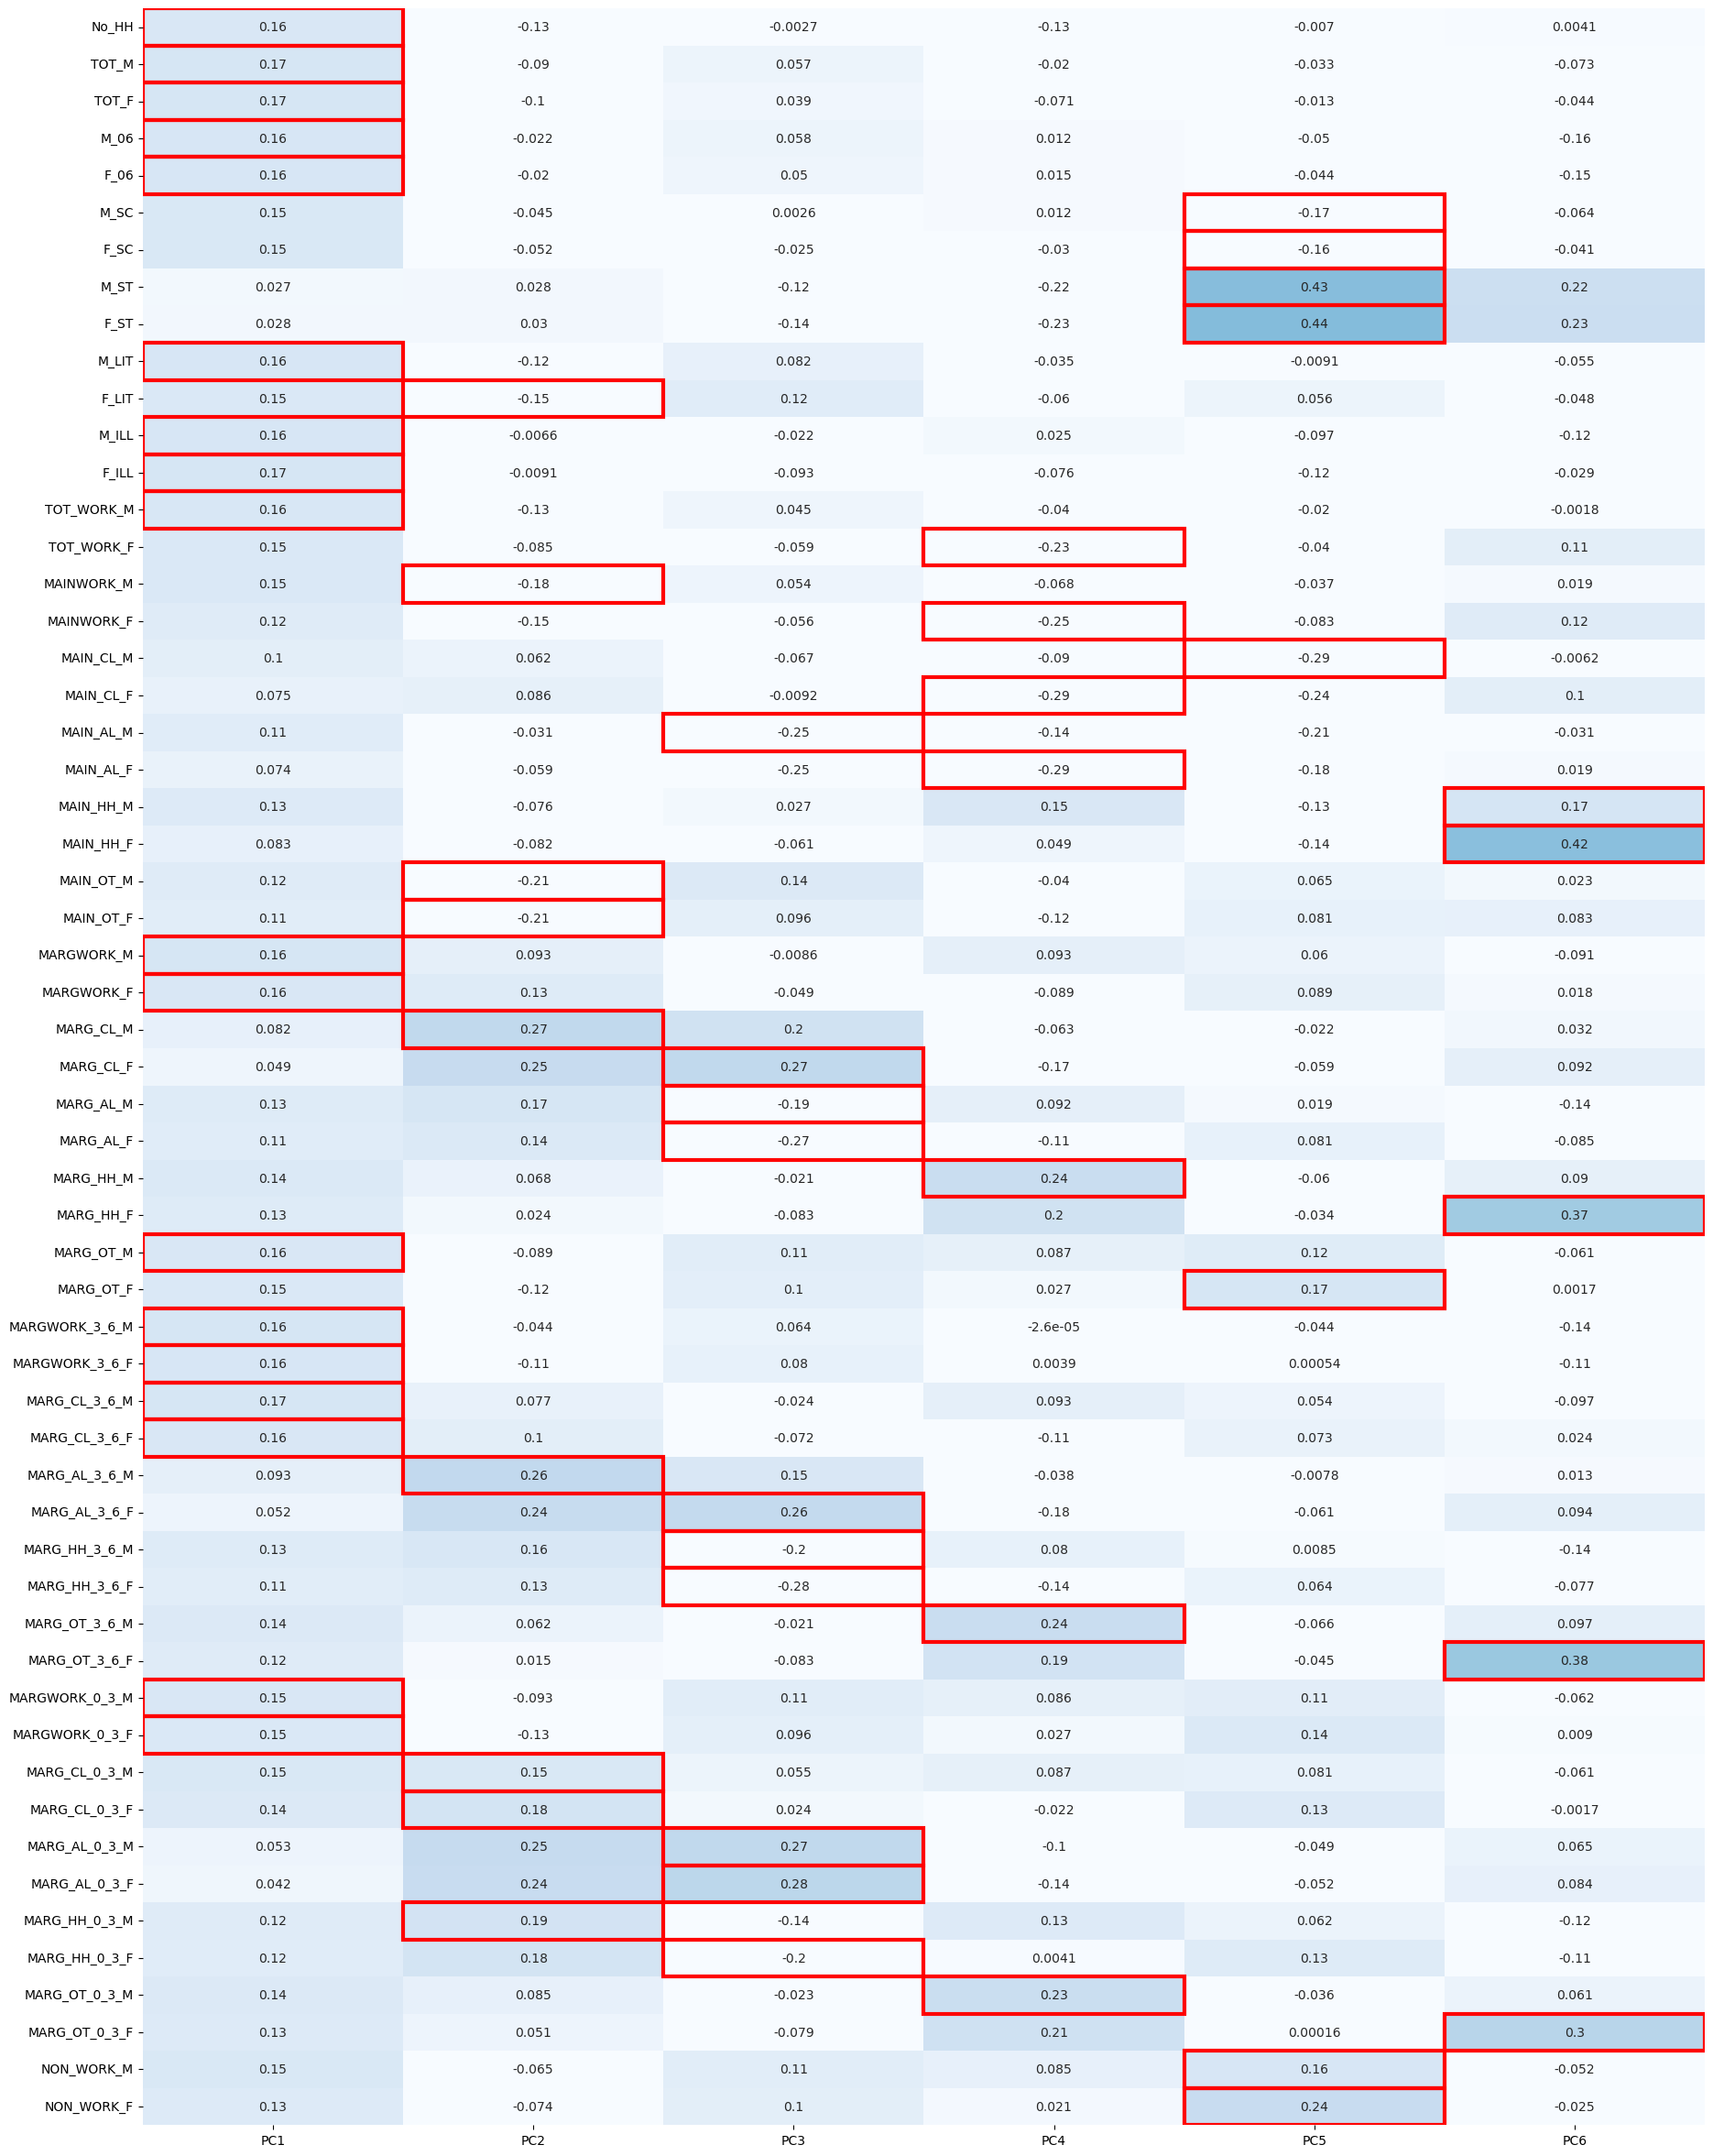

In [149]:
# identifying which features have maximum loading across the components
highlight_max_pc_vector(pca_fh_extracted, pca_fh_extracted.columns)

## Inference
1. Based on the above heatmap different PC's explain highest variance for different features which could be understood better from the table below 

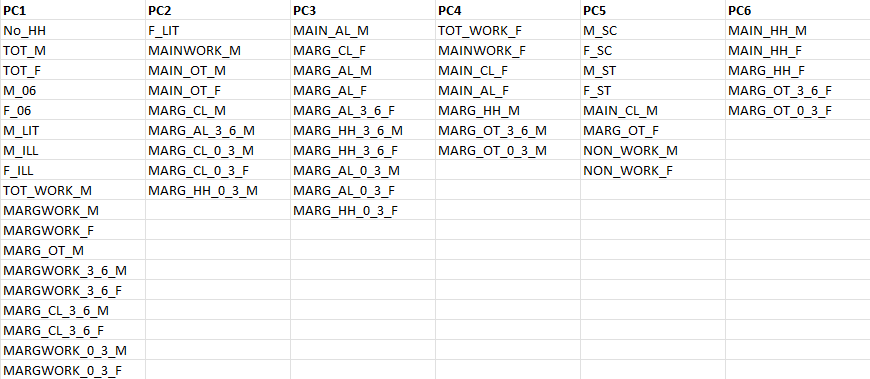

In [150]:
from PIL import Image
image = Image.open('D:/Kartik/GL MDS/Study_data/Assingnment_files/Module_3_ML1/Screenshot (154).png')
image

2. PC1 captures most variance for 19 features and most of these features are related to overall male and female population demographics like total number of households, total male and female population, total male and female population between 0 and 6 years and so on. We can name this as PC_Population_demography as it explains key population questions like total population, literacy and illetracy in population, sex ratio etc.
3. PC2 explains most variance for columns F_LIT, MAINWORK_M, MAIN_OT_M, MAIN_OT_F, MARG_CL_M, MARG_AL_3_6_M, MARG_CL_0_3_M, MARG_CL_0_3_F, MARG_HH_0_3_M, most of the features in this PC is related to working male population so we can name it as PC_Male_Workers.
4. PC3 has explain most variance for columns related to employement in farming sector providing information regarding main and marginal employement in farming sector, we can name it as PC_Farming_Workforce.
5. In PC4 most of the features are about female employement covering total working female, main working female etc so we can name it as PC_Female_Workers
6. PC5 captures variance for backward classes that is for SC and ST population so we can name it as PC_Backward_classes.
7. PC6 which captures the lowest variance in 6 PC's covers mostly columns related to workers in household industries so we can name it as PC_household_industries.